In [4801]:
import pandas as pd 

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from math import sqrt

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

import dash
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output
import plotly.express as px
import folium
from datetime import datetime, timedelta
import datetime
import warnings
warnings.filterwarnings('ignore')


# PAKISTAN

In [4802]:
#importing Data file
Pak_data_g = pd.read_csv('C:/Users/Muhammad Tousique/Final Year Project/Latest Data/pakistan.csv')
Pak_data = Pak_data_g

In [4803]:
#Calculating for New Positive Cases per day
confirmed=Pak_data["Confirmed"]
active_day=[0]*len(confirmed)
active_day[0]=confirmed[0]
for i in range(1,len(confirmed)):
    active_day[i]=confirmed[i]-confirmed[i-1]
new_cases= pd.DataFrame(data=active_day, index=None, columns=["Daily_Cases"])

In [4804]:
#Calculating for New Deaths Cases per day
deaths=Pak_data["Deaths"]
deaths_day=[0]*len(deaths)
deaths_day[0]=deaths[0]
for i in range(1,len(deaths)):
    deaths_day[i]=deaths[i]-deaths[i-1]
new_deaths= pd.DataFrame(data=deaths_day, index=None, columns=["Daily_Deaths"])

In [4805]:
#Calculating for New Recovered Cases per day
recovered=Pak_data["Recovered"]
recovered_day=[0]*len(recovered)
recovered_day[0]=recovered[0]
for i in range(1,len(recovered)):
    recovered_day[i]=recovered[i]-recovered[i-1]
new_recovered= pd.DataFrame(data=recovered_day, index=None, columns=["Daily_Recovered"])

In [4806]:
#Concat new columns to data frame
Pak_data = pd.concat([Pak_data,new_cases,new_deaths,new_recovered], axis=1)


In [4807]:
#Converting string Date to Date Format
Pak_data['Date'] = pd.to_datetime(Pak_data['Date'])
Pak_data.head()


,Country,Date,Confirmed,Recovered,Deaths,Active,Test_conducted,Lockdown,Daily_Cases,Daily_Deaths,Daily_Recovered
0,Pakistan,2020-02-25,2,0,0,2,2,0,2,0,0
1,Pakistan,2020-02-26,2,0,0,2,2,0,0,0,0
2,Pakistan,2020-02-27,2,0,0,2,2,0,0,0,0
3,Pakistan,2020-02-28,4,0,0,4,6,0,2,0,0
4,Pakistan,2020-02-29,4,0,0,4,8,0,0,0,0


In [4808]:
Pak_data.tail(5)

,Country,Date,Confirmed,Recovered,Deaths,Active,Test_conducted,Lockdown,Daily_Cases,Daily_Deaths,Daily_Recovered
447,Pakistan,2021-05-17,882928,795511,19752,67665,36725,0,2566,135,2989
448,Pakistan,2021-05-18,886184,799951,19856,66377,29801,0,3256,104,4440
449,Pakistan,2021-05-19,890391,804122,19987,66282,41771,0,4207,131,4171
450,Pakistan,2021-05-20,893461,810143,20089,63229,51130,0,3070,102,6021
451,Pakistan,2021-05-21,897468,813855,20177,63436,51528,0,4007,88,3712


In [4809]:
#Checking null values in dataframe
variables = Pak_data.columns 
Pak_data.isnull().sum().loc[variables]

Country            0
Date               0
Confirmed          0
Recovered          0
Deaths             0
Active             0
Test_conducted     0
Lockdown           0
Daily_Cases        0
Daily_Deaths       0
Daily_Recovered    0
dtype: int64

## PostiveRate

In [4810]:
#feb 2020 Pakistan
feb_pak_20=Pak_data[Pak_data["Date"].between('2020-02-25','2020-02-29')]
pak_deaths=feb_pak_20['Daily_Deaths']
pak_cases=feb_pak_20['Daily_Cases']
pak_test=feb_pak_20['Test_conducted']
pak_recovered=feb_pak_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in feb_pak_20.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_feb_20_positive_rate=((sum_cases/sum_test)*100)
pak_feb_20_recover_rate=((sum_recover/sum_cases)*100)
pak_feb_20_death_rate=((sum_deaths/sum_cases)*100)

#mar 2020 Pakistan
mar_pak_20=Pak_data[Pak_data["Date"].between('2020-03-01','2020-03-31')]
pak_deaths=mar_pak_20['Daily_Deaths']
pak_cases=mar_pak_20['Daily_Cases']
pak_test=mar_pak_20['Test_conducted']
pak_recovered=mar_pak_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_pak_20.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_mar_20_positive_rate=((sum_cases/sum_test)*100)
pak_mar_20_recover_rate=((sum_recover/sum_cases)*100)
pak_mar_20_death_rate=((sum_deaths/sum_cases)*100)



#april 2020 Pakistan
apr_pak_20=Pak_data[Pak_data["Date"].between('2020-04-01','2020-04-30')]
pak_deaths=apr_pak_20['Daily_Deaths']
pak_cases=apr_pak_20['Daily_Cases']
pak_test=apr_pak_20['Test_conducted']
pak_recovered=apr_pak_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_pak_20.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_apr_20_positive_rate=((sum_cases/sum_test)*100)
pak_apr_20_recover_rate=((sum_recover/sum_cases)*100)
pak_apr_20_death_rate=((sum_deaths/sum_cases)*100)


#may 2020 Pakistan
may_pak_20=Pak_data[Pak_data["Date"].between('2020-05-01','2020-05-31')]
pak_deaths=may_pak_20['Daily_Deaths']
pak_cases=may_pak_20['Daily_Cases']
pak_test=may_pak_20['Test_conducted']
pak_recovered=may_pak_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_pak_20.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_may_20_positive_rate=((sum_cases/sum_test)*100)
pak_may_20_recover_rate=((sum_recover/sum_cases)*100)
pak_may_20_death_rate=((sum_deaths/sum_cases)*100)


#june 2020 Pakistan
jun_pak_20=Pak_data[Pak_data["Date"].between('2020-06-01','2020-06-30')]
pak_deaths=jun_pak_20['Daily_Deaths']
pak_cases=jun_pak_20['Daily_Cases']
pak_test=jun_pak_20['Test_conducted']
pak_recovered=jun_pak_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jun_pak_20.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_jun_20_positive_rate=((sum_cases/sum_test)*100)
pak_jun_20_recover_rate=((sum_recover/sum_cases)*100)
pak_jun_20_death_rate=((sum_deaths/sum_cases)*100)

#july 2020 Pakistan
july_pak_20=Pak_data[Pak_data["Date"].between('2020-07-01','2020-07-31')]
pak_deaths=july_pak_20['Daily_Deaths']
pak_cases=july_pak_20['Daily_Cases']
pak_test=july_pak_20['Test_conducted']
pak_recovered=july_pak_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in july_pak_20.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_july_20_positive_rate=((sum_cases/sum_test)*100)
pak_july_20_recover_rate=((sum_recover/sum_cases)*100)
pak_july_20_death_rate=((sum_deaths/sum_cases)*100)

#August 2020 Pakistan
aug_pak_20=Pak_data[Pak_data["Date"].between('2020-08-01','2020-08-31')]
pak_deaths=aug_pak_20['Daily_Deaths']
pak_cases=aug_pak_20['Daily_Cases']
pak_test=aug_pak_20['Test_conducted']
pak_recovered=aug_pak_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in aug_pak_20.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_aug_20_positive_rate=((sum_cases/sum_test)*100)
pak_aug_20_recover_rate=((sum_recover/sum_cases)*100)
pak_aug_20_death_rate=((sum_deaths/sum_cases)*100)

#September 2020 Pakistan
sep_pak_20=Pak_data[Pak_data["Date"].between('2020-09-01','2020-09-30')]
pak_deaths=sep_pak_20['Daily_Deaths']
pak_cases=sep_pak_20['Daily_Cases']
pak_test=sep_pak_20['Test_conducted']
pak_recovered=sep_pak_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in sep_pak_20.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_sep_20_positive_rate=((sum_cases/sum_test)*100)
pak_sep_20_recover_rate=((sum_recover/sum_cases)*100)
pak_sep_20_death_rate=((sum_deaths/sum_cases)*100)

#October 2020 Pakistan
oct_pak_20=Pak_data[Pak_data["Date"].between('2020-10-01','2020-10-31')]
pak_deaths=oct_pak_20['Daily_Deaths']
pak_cases=oct_pak_20['Daily_Cases']
pak_test=oct_pak_20['Test_conducted']
pak_recovered=oct_pak_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in oct_pak_20.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_oct_20_positive_rate=((sum_cases/sum_test)*100)
pak_oct_20_recover_rate=((sum_recover/sum_cases)*100)
pak_oct_20_death_rate=((sum_deaths/sum_cases)*100)


#November 2020 Pakistan
nov_pak_20=Pak_data[Pak_data["Date"].between('2020-11-01','2020-11-30')]
pak_deaths=nov_pak_20['Daily_Deaths']
pak_cases=nov_pak_20['Daily_Cases']
pak_test=nov_pak_20['Test_conducted']
pak_recovered=nov_pak_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in nov_pak_20.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_nov_20_positive_rate=((sum_cases/sum_test)*100)
pak_nov_20_recover_rate=((sum_recover/sum_cases)*100)
pak_nov_20_death_rate=((sum_deaths/sum_cases)*100)


#December 2020 Pakistan
dec_pak_20=Pak_data[Pak_data["Date"].between('2020-12-01','2020-12-31')]
pak_deaths=dec_pak_20['Daily_Deaths']
pak_cases=dec_pak_20['Daily_Cases']
pak_test=dec_pak_20['Test_conducted']
pak_recovered=dec_pak_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in dec_pak_20.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_dec_20_positive_rate=((sum_cases/sum_test)*100)
pak_dec_20_recover_rate=((sum_recover/sum_cases)*100)
pak_dec_20_death_rate=((sum_deaths/sum_cases)*100)


#January 2021 Pakistan
jan_pak_21=Pak_data[Pak_data["Date"].between('2021-01-01','2021-01-31')]
pak_deaths=jan_pak_21['Daily_Deaths']
pak_cases=jan_pak_21['Daily_Cases']
pak_test=jan_pak_21['Test_conducted']
pak_recovered=jan_pak_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jan_pak_21.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_jan_21_positive_rate=((sum_cases/sum_test)*100)
pak_jan_21_recover_rate=((sum_recover/sum_cases)*100)
pak_jan_21_death_rate=((sum_deaths/sum_cases)*100)

#February 2021 Pakistan
feb_pak_21=Pak_data[Pak_data["Date"].between('2021-02-01','2021-02-28')]
pak_deaths=feb_pak_21['Daily_Deaths']
pak_cases=feb_pak_21['Daily_Cases']
pak_test=feb_pak_21['Test_conducted']
pak_recovered=feb_pak_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in feb_pak_21.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_feb_21_positive_rate=((sum_cases/sum_test)*100)
pak_feb_21_recover_rate=((sum_recover/sum_cases)*100)
pak_feb_21_death_rate=((sum_deaths/sum_cases)*100)

#March 2021 Pakistan
mar_pak_21=Pak_data[Pak_data["Date"].between('2021-03-01','2021-03-31')]
pak_deaths=mar_pak_21['Daily_Deaths']
pak_cases=mar_pak_21['Daily_Cases']
pak_test=mar_pak_21['Test_conducted']
pak_recovered=mar_pak_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_pak_21.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_mar_21_positive_rate=((sum_cases/sum_test)*100)
pak_mar_21_recover_rate=((sum_recover/sum_cases)*100)
pak_mar_21_death_rate=((sum_deaths/sum_cases)*100)

#April 2021 Pakistan
apr_pak_21=Pak_data[Pak_data["Date"].between('2021-04-01','2021-04-30')]
pak_deaths=apr_pak_21['Daily_Deaths']
pak_cases=apr_pak_21['Daily_Cases']
pak_test=apr_pak_21['Test_conducted']
pak_recovered=apr_pak_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_pak_21.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_apr_21_positive_rate=((sum_cases/sum_test)*100)
pak_apr_21_recover_rate=((sum_recover/sum_cases)*100)
pak_apr_21_death_rate=((sum_deaths/sum_cases)*100)

#May 2021 Pakistan
may_pak_21=Pak_data[Pak_data["Date"].between('2021-05-01','2021-05-21')]
pak_deaths=mar_pak_21['Daily_Deaths']
pak_cases=mar_pak_21['Daily_Cases']
pak_test=mar_pak_21['Test_conducted']
pak_recovered=mar_pak_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_pak_21.index:
    sum_deaths=sum_deaths+pak_deaths[ind]
    sum_cases=sum_cases+pak_cases[ind]
    sum_test=sum_test+pak_test[ind]
    sum_recover=sum_recover+pak_recovered[ind]
    

pak_may_21_positive_rate=((sum_cases/sum_test)*100)
pak_may_21_recover_rate=((sum_recover/sum_cases)*100)
pak_may_21_death_rate=((sum_deaths/sum_cases)*100)

In [4811]:
#postiveRate
months = ['Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
positive = [pak_feb_20_positive_rate,pak_mar_20_positive_rate,pak_apr_20_positive_rate,pak_may_20_positive_rate,pak_jun_20_positive_rate,pak_july_20_positive_rate,pak_aug_20_positive_rate,pak_sep_20_positive_rate,pak_oct_20_positive_rate,pak_nov_20_positive_rate,pak_dec_20_positive_rate,pak_jan_21_positive_rate,pak_feb_21_positive_rate,pak_mar_21_positive_rate,pak_apr_21_positive_rate,pak_may_21_positive_rate,]

In [4812]:
#recoverRate
months = ['Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
recover = [pak_feb_20_recover_rate,pak_mar_20_recover_rate,pak_apr_20_recover_rate,pak_may_20_recover_rate,pak_jun_20_recover_rate,pak_july_20_recover_rate,pak_aug_20_recover_rate,pak_sep_20_recover_rate,pak_oct_20_recover_rate,pak_nov_20_recover_rate,pak_dec_20_recover_rate,pak_jan_21_recover_rate,pak_feb_21_recover_rate,pak_mar_21_recover_rate,pak_apr_21_recover_rate,pak_may_21_recover_rate,]

In [4813]:
#deathRate
months = ['Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
death = [pak_feb_20_death_rate,pak_mar_20_death_rate,pak_apr_20_death_rate,pak_may_20_death_rate,pak_jun_20_death_rate,pak_july_20_death_rate,pak_aug_20_death_rate,pak_sep_20_death_rate,pak_oct_20_death_rate,pak_nov_20_death_rate,pak_dec_20_death_rate,pak_jan_21_death_rate,pak_feb_21_death_rate,pak_mar_21_death_rate,pak_apr_21_death_rate,pak_may_21_death_rate,]

In [4814]:
def pak_ratio_bar_p():
    x = months
    y = positive


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Positivity Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def pak_ratio_bar_r():
    x = months
    y = recover


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='lightslategray', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Recovery Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def pak_ratio_bar_d():
    x = months
    y = death


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='crimson', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Death Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_pak6= html.Div([
   
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_pppp1',figure=pak_ratio_bar_p())),
                    dbc.Col(dcc.Graph(id='graph_pppp1',figure=pak_ratio_bar_d())),
                    dbc.Col(dcc.Graph(id='graph_pppp1',figure=pak_ratio_bar_r())),
                ],   
            ),
    
     

])

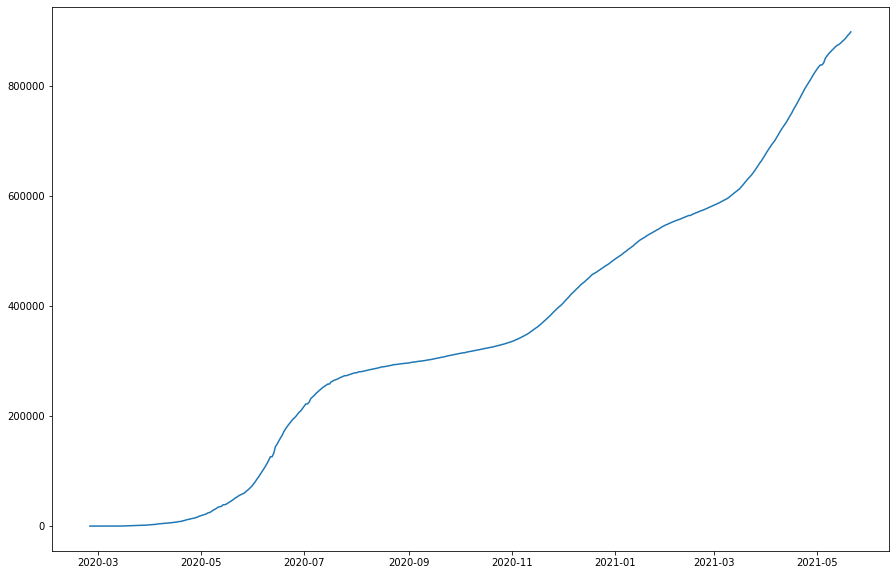

In [4815]:
plt.figure(figsize=(15,10))
plt.plot(Pak_data['Date'],Pak_data['Confirmed'])


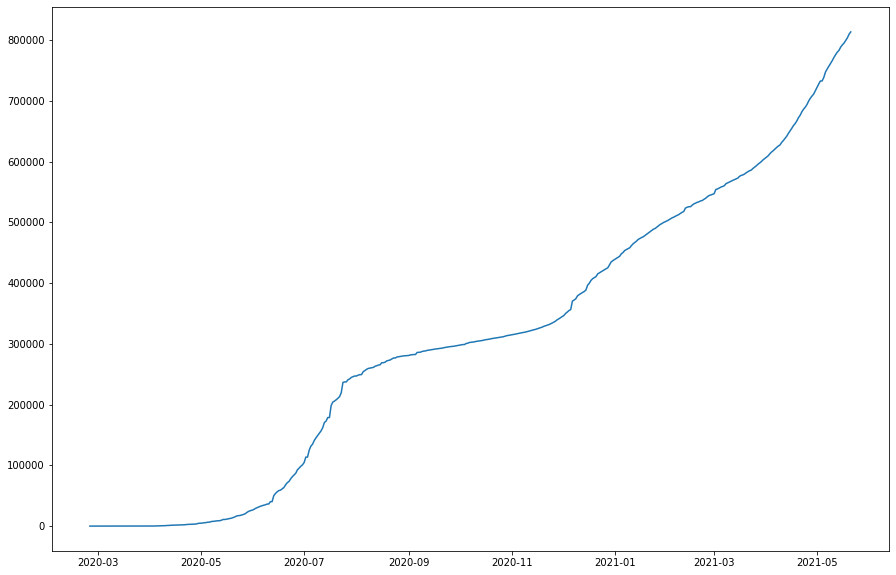

In [4816]:
plt.figure(figsize=(15,10))
plt.plot(Pak_data['Date'],Pak_data['Recovered'])

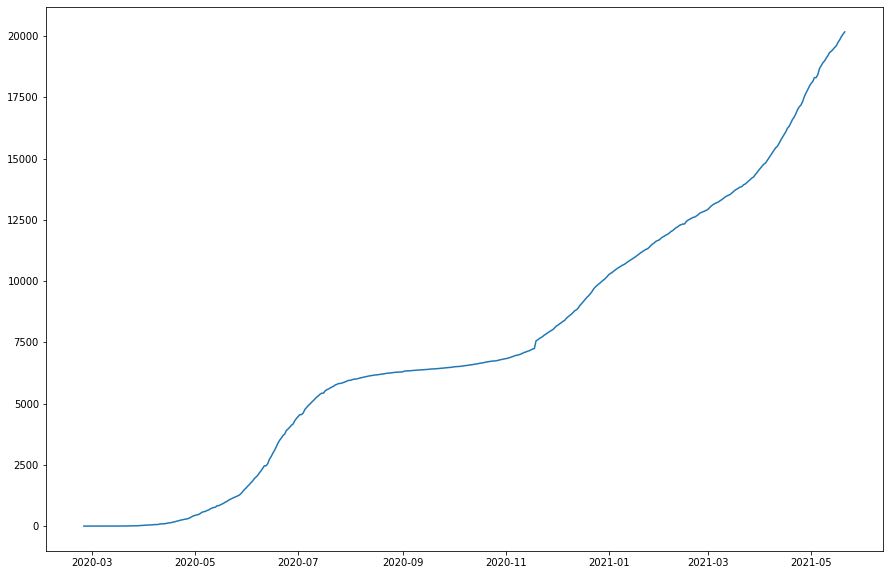

In [4817]:
plt.figure(figsize=(15,10))
plt.plot(Pak_data['Date'],Pak_data['Deaths'])

# Confirmed

In [4818]:
dates= Pak_data.Date.keys()
Pak_data['Date'] = np.array([i for i in range(len(dates))]).reshape(-1,1)

In [4819]:
pak_l=(len(Pak_data))-1
pak_t=(pak_l/100)*70

train = Pak_data[Pak_data.index <= pak_t]

test = Pak_data[Pak_data.index > pak_t]

x_train = train[["Date"]].values
 
y_train = train["Confirmed"].values

x_test = test[["Date"]].values

y_test = test["Confirmed"].values

In [4820]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [4821]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

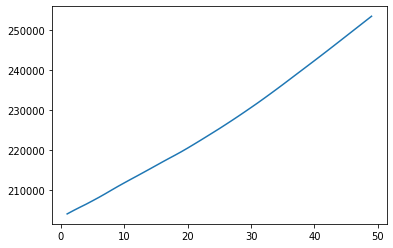

In [4822]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [4823]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [4824]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [4825]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_pak_c=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_pak_c)

In [4826]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_pak_c=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_pak_c)

In [4827]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_pak_c = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_pak_c)


In [4828]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_pak_c=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_pak_c)

<BarContainer object of 4 artists>

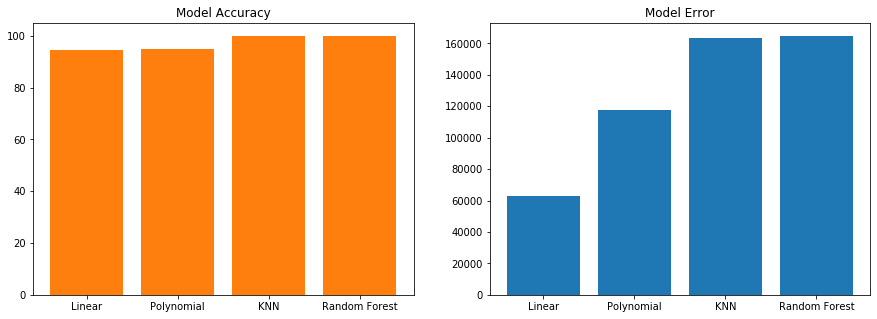

In [4829]:
import matplotlib.pyplot as plt 
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [4830]:
def pak_accuracy_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def pak_error_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[0] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_pak3= html.Div([
   dbc.Row([html.H1('Pakistan')],
           style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     'margin': '0px 564px'             
                    }),
     dbc.Row([html.H3('Model evaluation of Confirmed Cases')],
             style={'color':'#493e32',
                    "padding": "16px 16px",
                    'margin': '0px 386px',
                    
                                      
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_p1',figure=pak_accuracy_conf())),
                    dbc.Col(dcc.Graph(id='graph_p2',figure=pak_error_conf())),
                                             
                                            
                    
                    

                ],   
            ),
    
     
   
     
    
     

])



In [4831]:
predict_data_pak=[]
for i in range(1,31):
    pak_l=pak_l+1
    predict_data_pak.append(pak_l)
    
predict_data_pak=np.array(predict_data_pak).reshape(-1,1)

start2 = '5/22/2021'
start_date2 = datetime.datetime.strptime(start2,'%m/%d/%Y')
pred_d1 =[]
for i in range (30) :
    pred_d1.append((start_date2+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))



In [4832]:
x=Pak_data.loc[:,['Date']].values
y=Pak_data.loc[:,['Confirmed']].values


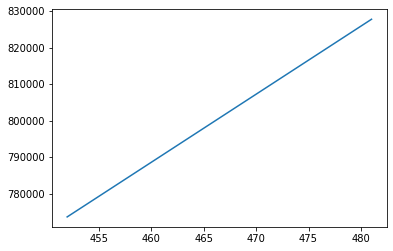

In [4833]:
regressor=LinearRegression()
regressor.fit(x,y)
pred_pak_c=regressor.predict(predict_data_pak)
plt.plot(predict_data_pak,pred_pak_c)


In [4834]:
#Pakistan Logistic Prediction
x_train = train[["Date","Confirmed"]].values

y_train = train["Lockdown"].values

x_test = test[["Date","Confirmed"]].values

y_test = test["Lockdown"].values


log=LogisticRegression()
log.fit(x_train,y_train)
pred_pak_lo=log.predict(x_test)

log_accu_pak=(accuracy_score(y_test,pred_pak_lo)*100)

x=Pak_data.loc[:,['Date','Confirmed']].values
y=Pak_data.loc[:,['Lockdown']].values
y=y.flatten()

pak_predict_log = np.concatenate((predict_data_pak,pred_pak_c),axis=1)


log=LogisticRegression()
log.fit(x,y)
pred_pak_log=log.predict(pak_predict_log)

pred_pak_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [4835]:
log_accu_pak

93.38235294117648

# Recovered

In [4836]:
x_train = train[["Date"]].values
 
y_train = train["Recovered"].values

x_test = test[["Date"]].values

y_test = test["Recovered"].values

In [4837]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [4838]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

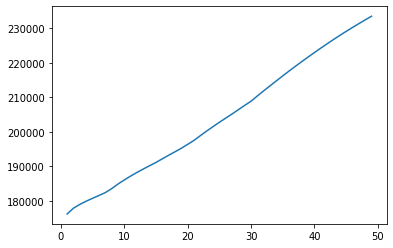

In [4839]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [4840]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [4841]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [4842]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_pak_r=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_pak_r)

In [4843]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_pak_r=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_pak_r)

In [4844]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_pak_r = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_pak_r)

In [4845]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_pak_r=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_pak_r)
random_e

147861.31058823533

<BarContainer object of 4 artists>

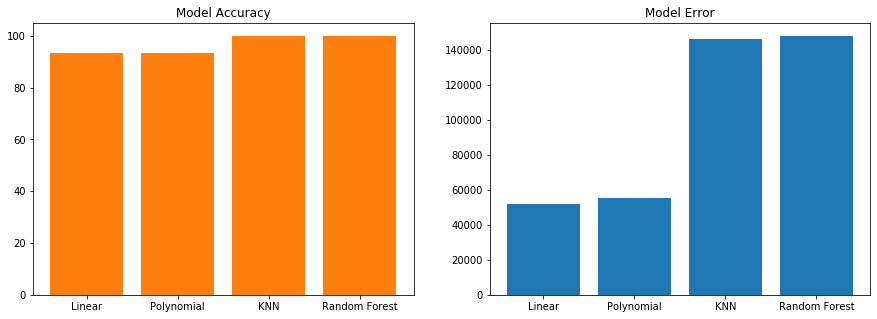

In [4846]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [4847]:
def pak_accuracy_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def pak_error_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[0] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_pak4= html.Div([
   
     dbc.Row([html.H3('Model evaluation of Recovered Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"               
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_pp1',figure=pak_accuracy_rec())),
                    dbc.Col(dcc.Graph(id='graph_pp2',figure=pak_error_rec())),
                                             
                                            
                    
                    

                ],   
            ),
    
])


In [4848]:
x=Pak_data.loc[:,['Date']].values
y=Pak_data.loc[:,['Recovered']].values
y= y.flatten()

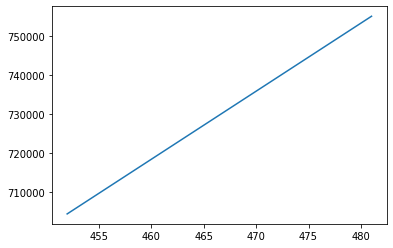

In [4849]:
regressor=LinearRegression()
regressor.fit(x,y)
pred_pak_r=regressor.predict(predict_data_pak)

plt.plot(predict_data_pak,pred_pak_r)


# Deaths

In [4850]:
x_train = train[["Date"]].values
 
y_train = train["Deaths"].values

x_test = test[["Date"]].values

y_test = test["Deaths"].values

In [4851]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [4852]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

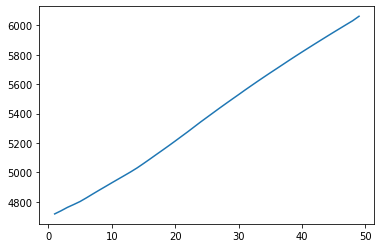

In [4853]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [4854]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [4855]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [4856]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_pak_d=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_pak_d)

In [4857]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_pak_d=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_pak_d)

In [4858]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_pak_d = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_pak_d)

In [4859]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_pak_d=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_pak_d)

<BarContainer object of 4 artists>

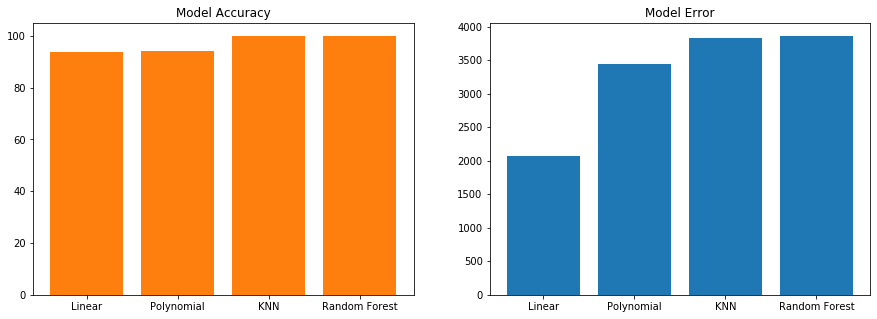

In [4860]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [4861]:
def pak_accuracy_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def pak_error_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[0] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_pak5= html.Div([
  
     dbc.Row([html.H3('Model evaluation of Death Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"              
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_ppp1',figure=pak_accuracy_d())),
                    dbc.Col(dcc.Graph(id='graph_ppp2',figure=pak_error_d())),
                                             
                                            
                    
                    

                ],   
            ),
    
])

In [4862]:
x=Pak_data.loc[:,['Date']].values
y=Pak_data.loc[:,['Deaths']].values
y= y.flatten()

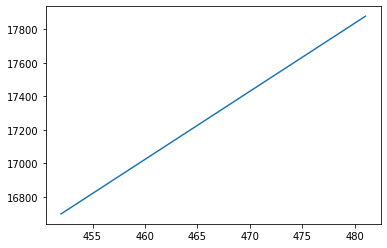

In [4863]:
regressor=LinearRegression()
regressor.fit(x,y)
pred_pak_d=regressor.predict(predict_data_pak)

plt.plot(predict_data_pak,pred_pak_d)

## Pakistan Webpage

In [4864]:
#daily cases
def graph_pak_c():
    

    
    fig = go.Figure([
       
    
            go.Scatter(x=Pak_data_g['Date'], y=Pak_data['Daily_Cases'], name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 confirmed cases",
            'y':0.9,
            'x':0.5,
            },
        
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

def graph_pak_r():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Pak_data_g['Date'], y=Pak_data['Daily_Recovered'], name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 recovered cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def graph_pak_d():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Pak_data_g['Date'], y=Pak_data['Daily_Deaths'], name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
    title={
            'text': "Visualization of covid-19 death cases",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


In [4865]:
pred_pak_c=pred_pak_c.flatten()
def new_graph_pak_c():

    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_pak_c, name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
     title={
            'text': "Next 30 days prediction of confirmed cases",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def new_graph_pak_r():
    
  
    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_pak_r, name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
         title={
            'text': "Next 30 days prediction of recovered cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig
def new_graph_pak_d():
    
   
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_pak_d, name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
         title={
            'text': "Next 30 days prediction of death cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig



### Graph output on the webpage

In [4866]:
child_pak1= html.Div([
    dbc.Row([html.H2('Pakistan')],
           style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     'margin': '0px 564'             
                    }),
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_p1',figure=graph_pak_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_p2',figure=graph_pak_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
     dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_p2',figure=graph_pak_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
           

])


In [4867]:
#model graph
child_pak2= html.Div([
  
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_p1',figure=new_graph_pak_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_p2',figure=new_graph_pak_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
     dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_p2',figure=new_graph_pak_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
           

])


# INDIA

In [4868]:
#Importing Dataset
Ind_data_g = pd.read_csv('C:/Users/Muhammad Tousique/Final Year Project/Latest Data/India.csv')
Ind_data= Ind_data_g

In [4869]:
#Calculating for New Positive Cases per day
confirmed=Ind_data["Confirmed"]
active_day=[0]*len(confirmed)
active_day[0]=confirmed[0]
for i in range(1,len(confirmed)):
    active_day[i]=confirmed[i]-confirmed[i-1]
new_cases= pd.DataFrame(data=active_day, index=None, columns=["Daily_Cases"])

In [4870]:
#Calculating for New Deaths Cases per day
deaths=Ind_data["Deaths"]
deaths_day=[0]*len(deaths)
deaths_day[0]=deaths[0]
for i in range(1,len(deaths)):
    deaths_day[i]=deaths[i]-deaths[i-1]
new_deaths= pd.DataFrame(data=deaths_day, index=None, columns=["Daily_Deaths"])

In [4871]:
#Calculating for New Recovered Cases per day
recovered=Ind_data["Recovered"]
recovered_day=[0]*len(recovered)
recovered_day[0]=recovered[0]
for i in range(1,len(recovered)):
    recovered_day[i]=recovered[i]-recovered[i-1]
new_recovered= pd.DataFrame(data=recovered_day, index=None, columns=["Daily_Recovered"])

In [4872]:
#Concat new columns in data frame
Ind_data = pd.concat([Ind_data,new_cases,new_deaths,new_recovered], axis=1)

In [4873]:
#Changing date string to date
Ind_data['Date'] = pd.to_datetime(Ind_data['Date'])
Ind_data.head()

,Country,Date,Confirmed,Recovered,Deaths,Active,Test_conducted,Lockdown,Daily_Cases,Daily_Deaths,Daily_Recovered
0,India,2020-01-30,1,0,0,1,1,0,1,0,0
1,India,2020-01-31,1,0,0,1,1,0,0,0,0
2,India,2020-02-01,1,0,0,1,1,0,0,0,0
3,India,2020-02-02,2,0,0,2,2,0,1,0,0
4,India,2020-02-03,3,0,0,3,3,0,1,0,0


In [4874]:
#Checking null values in dataframe
variables = Ind_data.columns 
Ind_data.isnull().sum().loc[variables]

Country            0
Date               0
Confirmed          0
Recovered          0
Deaths             0
Active             0
Test_conducted     0
Lockdown           0
Daily_Cases        0
Daily_Deaths       0
Daily_Recovered    0
dtype: int64

In [4875]:
#January 2020 India
jan_india_20=Ind_data[Ind_data["Date"].between('2020-01-30','2020-01-31')]
india_deaths=jan_india_20['Daily_Deaths']
india_cases=jan_india_20['Daily_Cases']
india_test=jan_india_20['Test_conducted']
india_recovered=jan_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jan_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_jan_20_positive_rate=((sum_cases/sum_test)*100)
india_jan_20_recover_rate=((sum_recover/sum_cases)*100)
india_jan_20_death_rate=((sum_deaths/sum_cases)*100)

#feb 2020 India
feb_india_20=Ind_data[Ind_data["Date"].between('2020-02-01','2020-02-29')]
india_deaths=feb_india_20['Daily_Deaths']
india_cases=feb_india_20['Daily_Cases']
india_test=feb_india_20['Test_conducted']
india_recovered=feb_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in feb_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_feb_20_positive_rate=((sum_cases/sum_test)*100)
india_feb_20_recover_rate=((sum_recover/sum_cases)*100)
india_feb_20_death_rate=((sum_deaths/sum_cases)*100)

#mar 2020 Pakistan
mar_india_20=Ind_data[Ind_data["Date"].between('2020-03-01','2020-03-31')]
india_deaths=mar_india_20['Daily_Deaths']
india_cases=mar_india_20['Daily_Cases']
india_test=mar_india_20['Test_conducted']
india_recovered=mar_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_mar_20_positive_rate=((sum_cases/sum_test)*100)
india_mar_20_recover_rate=((sum_recover/sum_cases)*100)
india_mar_20_death_rate=((sum_deaths/sum_cases)*100)



#april 2020 India
apr_india_20=Ind_data[Ind_data["Date"].between('2020-04-01','2020-04-30')]
india_deaths=apr_india_20['Daily_Deaths']
india_cases=apr_india_20['Daily_Cases']
india_test=apr_india_20['Test_conducted']
india_recovered=apr_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_apr_20_positive_rate=((sum_cases/sum_test)*100)
india_apr_20_recover_rate=((sum_recover/sum_cases)*100)
india_apr_20_death_rate=((sum_deaths/sum_cases)*100)



#may 2020 India
may_india_20=Ind_data[Ind_data["Date"].between('2020-05-01','2020-05-31')]
india_deaths=may_india_20['Daily_Deaths']
india_cases=may_india_20['Daily_Cases']
india_test=may_india_20['Test_conducted']
india_recovered=may_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_may_20_positive_rate=((sum_cases/sum_test)*100)
india_may_20_recover_rate=((sum_recover/sum_cases)*100)
india_may_20_death_rate=((sum_deaths/sum_cases)*100)


#june 2020 India
jun_india_20=Ind_data[Ind_data["Date"].between('2020-06-01','2020-06-30')]
india_deaths=jun_india_20['Daily_Deaths']
india_cases=jun_india_20['Daily_Cases']
india_test=jun_india_20['Test_conducted']
india_recovered=jun_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jun_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_jun_20_positive_rate=((sum_cases/sum_test)*100)
india_jun_20_recover_rate=((sum_recover/sum_cases)*100)
india_jun_20_death_rate=((sum_deaths/sum_cases)*100)

#july 2020 India
july_india_20=Ind_data[Ind_data["Date"].between('2020-07-01','2020-07-31')]
india_deaths=july_india_20['Daily_Deaths']
india_cases=july_india_20['Daily_Cases']
india_test=july_india_20['Test_conducted']
india_recovered=july_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in july_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_july_20_positive_rate=((sum_cases/sum_test)*100)
india_july_20_recover_rate=((sum_recover/sum_cases)*100)
india_july_20_death_rate=((sum_deaths/sum_cases)*100)

#August 2020 India
aug_india_20=Ind_data[Ind_data["Date"].between('2020-08-01','2020-08-31')]
india_deaths=aug_india_20['Daily_Deaths']
india_cases=aug_india_20['Daily_Cases']
india_test=aug_india_20['Test_conducted']
india_recovered=aug_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in aug_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_aug_20_positive_rate=((sum_cases/sum_test)*100)
india_aug_20_recover_rate=((sum_recover/sum_cases)*100)
india_aug_20_death_rate=((sum_deaths/sum_cases)*100)

#September 2020 India
sep_india_20=Ind_data[Ind_data["Date"].between('2020-09-01','2020-09-30')]
india_deaths=sep_india_20['Daily_Deaths']
india_cases=sep_india_20['Daily_Cases']
india_test=sep_india_20['Test_conducted']
india_recovered=sep_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in sep_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_sep_20_positive_rate=((sum_cases/sum_test)*100)
india_sep_20_recover_rate=((sum_recover/sum_cases)*100)
india_sep_20_death_rate=((sum_deaths/sum_cases)*100)

#October 2020 India
oct_india_20=Ind_data[Ind_data["Date"].between('2020-10-01','2020-10-31')]
india_deaths=oct_india_20['Daily_Deaths']
india_cases=oct_india_20['Daily_Cases']
india_test=oct_india_20['Test_conducted']
india_recovered=oct_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in oct_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_oct_20_positive_rate=((sum_cases/sum_test)*100)
india_oct_20_recover_rate=((sum_recover/sum_cases)*100)
india_oct_20_death_rate=((sum_deaths/sum_cases)*100)


#November 2020 India
nov_india_20=Ind_data[Ind_data["Date"].between('2020-11-01','2020-11-30')]
india_deaths=nov_india_20['Daily_Deaths']
india_cases=nov_india_20['Daily_Cases']
india_test=nov_india_20['Test_conducted']
india_recovered=nov_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in nov_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_nov_20_positive_rate=((sum_cases/sum_test)*100)
india_nov_20_recover_rate=((sum_recover/sum_cases)*100)
india_nov_20_death_rate=((sum_deaths/sum_cases)*100)


#December 2020 India
dec_india_20=Ind_data[Ind_data["Date"].between('2020-12-01','2020-12-31')]
india_deaths=dec_india_20['Daily_Deaths']
india_cases=dec_india_20['Daily_Cases']
india_test=dec_india_20['Test_conducted']
india_recovered=dec_india_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in dec_india_20.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_dec_20_positive_rate=((sum_cases/sum_test)*100)
india_dec_20_recover_rate=((sum_recover/sum_cases)*100)
india_dec_20_death_rate=((sum_deaths/sum_cases)*100)


#January 2021 India
jan_india_21=Ind_data[Ind_data["Date"].between('2021-01-01','2021-01-31')]
india_deaths=jan_india_21['Daily_Deaths']
india_cases=jan_india_21['Daily_Cases']
india_test=jan_india_21['Test_conducted']
india_recovered=jan_india_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jan_india_21.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_jan_21_positive_rate=((sum_cases/sum_test)*100)
india_jan_21_recover_rate=((sum_recover/sum_cases)*100)
india_jan_21_death_rate=((sum_deaths/sum_cases)*100)

#February 2021 India
feb_india_21=Ind_data[Ind_data["Date"].between('2021-02-01','2021-02-28')]
india_deaths=feb_india_21['Daily_Deaths']
india_cases=feb_india_21['Daily_Cases']
india_test=feb_india_21['Test_conducted']
india_recovered=feb_india_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in feb_india_21.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_feb_21_positive_rate=((sum_cases/sum_test)*100)
india_feb_21_recover_rate=((sum_recover/sum_cases)*100)
india_feb_21_death_rate=((sum_deaths/sum_cases)*100)

#March 2021 India
mar_india_21=Ind_data[Ind_data["Date"].between('2021-03-01','2021-03-31')]
india_deaths=mar_india_21['Daily_Deaths']
india_cases=mar_india_21['Daily_Cases']
india_test=mar_india_21['Test_conducted']
india_recovered=mar_india_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_india_21.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_mar_21_positive_rate=((sum_cases/sum_test)*100)
india_mar_21_recover_rate=((sum_recover/sum_cases)*100)
india_mar_21_death_rate=((sum_deaths/sum_cases)*100)

#April 2021 India
apr_india_21=Ind_data[Ind_data["Date"].between('2021-04-01','2021-04-30')]
india_deaths=apr_india_21['Daily_Deaths']
india_cases=apr_india_21['Daily_Cases']
india_test=apr_india_21['Test_conducted']
india_recovered=apr_india_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_india_21.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_apr_21_positive_rate=((sum_cases/sum_test)*100)
india_apr_21_recover_rate=((sum_recover/sum_cases)*100)
india_apr_21_death_rate=((sum_deaths/sum_cases)*100)

#May 2021 India
may_india_21=Ind_data[Ind_data["Date"].between('2021-05-01','2021-05-21')]
india_deaths=may_india_21['Daily_Deaths']
india_cases=may_india_21['Daily_Cases']
india_test=may_india_21['Test_conducted']
india_recovered=may_india_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_india_21.index:
    sum_deaths=sum_deaths+india_deaths[ind]
    sum_cases=sum_cases+india_cases[ind]
    sum_test=sum_test+india_test[ind]
    sum_recover=sum_recover+india_recovered[ind]
    

india_may_21_positive_rate=((sum_cases/sum_test)*100)
india_may_21_recover_rate=((sum_recover/sum_cases)*100)
india_may_21_death_rate=((sum_deaths/sum_cases)*100)

In [4876]:
months = ['Jan 20','Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
positive = [india_jan_20_positive_rate,india_feb_20_positive_rate,india_mar_20_positive_rate,india_apr_20_positive_rate,india_may_20_positive_rate,india_jun_20_positive_rate,india_july_20_positive_rate,india_aug_20_positive_rate,india_sep_20_positive_rate,india_oct_20_positive_rate,india_nov_20_positive_rate,india_dec_20_positive_rate,india_jan_21_positive_rate,india_feb_21_positive_rate,india_mar_21_positive_rate,india_apr_21_positive_rate,india_may_21_positive_rate,]

In [4877]:
months = ['Jan 20','Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
recover = [india_jan_20_recover_rate,india_feb_20_recover_rate,india_mar_20_recover_rate,india_apr_20_recover_rate,india_may_20_recover_rate,india_jun_20_recover_rate,india_july_20_recover_rate,india_aug_20_recover_rate,india_sep_20_recover_rate,india_oct_20_recover_rate,india_nov_20_recover_rate,india_dec_20_recover_rate,india_jan_21_recover_rate,india_feb_21_recover_rate,india_mar_21_recover_rate,india_apr_21_recover_rate,india_may_21_recover_rate,]

In [4878]:
months = ['Jan 20','Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
death = [india_jan_20_death_rate,india_feb_20_death_rate,india_mar_20_death_rate,india_apr_20_death_rate,india_may_20_death_rate,india_jun_20_death_rate,india_july_20_death_rate,india_aug_20_death_rate,india_sep_20_death_rate,india_oct_20_death_rate,india_nov_20_death_rate,india_dec_20_death_rate,india_jan_21_death_rate,india_feb_21_death_rate,india_mar_21_death_rate,india_apr_21_death_rate,india_may_21_death_rate,]

In [4879]:
def ind_ratio_bar_p():
    x = months
    y = positive


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Positivity Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def ind_ratio_bar_r():
    x = months
    y = recover


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='lightslategray', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Recovery Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def ind_ratio_bar_d():
    x = months
    y = death


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='crimson', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Death Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_ind6= html.Div([
     
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_iiii1',figure=ind_ratio_bar_p())),
                    dbc.Col(dcc.Graph(id='graph_iiii1',figure=ind_ratio_bar_d())),
                    dbc.Col(dcc.Graph(id='graph_iiii1',figure=ind_ratio_bar_r())),
                ],   
            ),
    
     

])

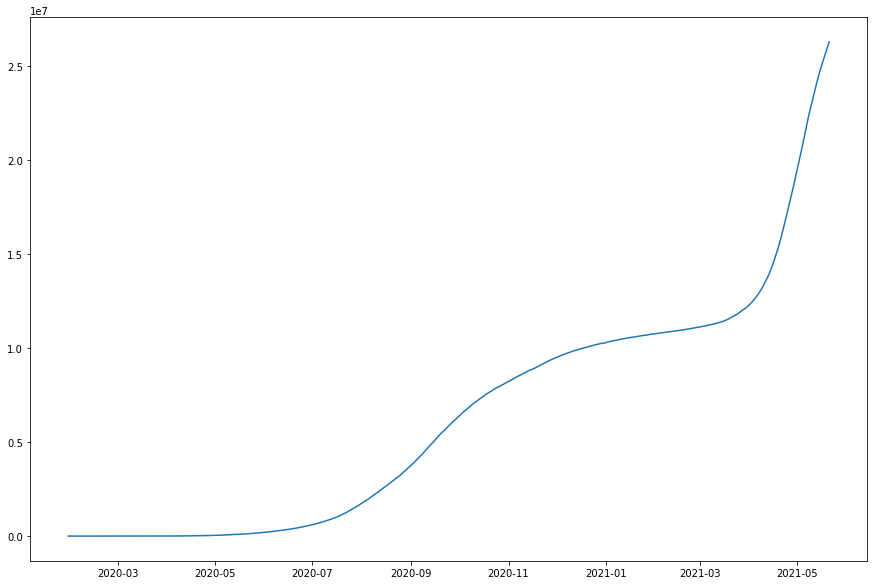

In [4880]:
plt.figure(figsize=(15,10))
plt.plot(Ind_data['Date'],Ind_data['Confirmed'])

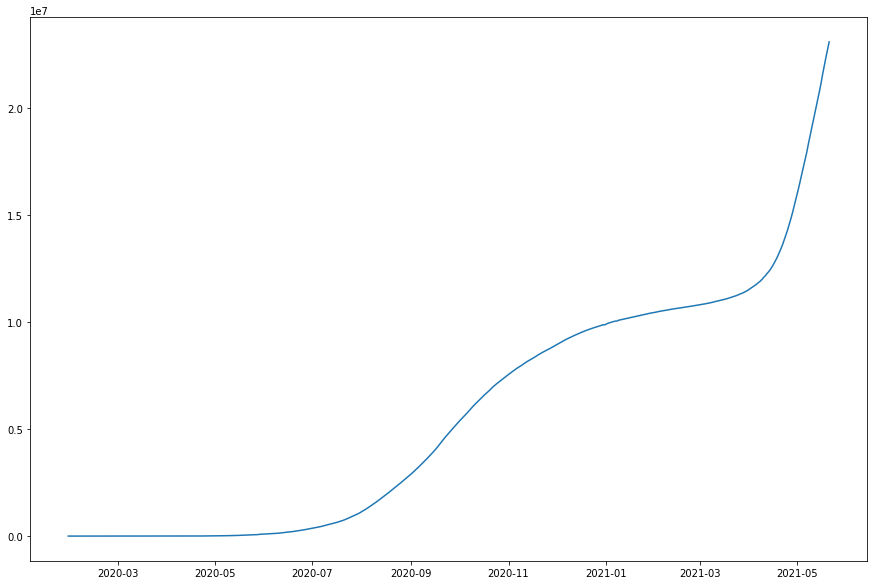

In [4881]:
plt.figure(figsize=(15,10))
plt.plot(Ind_data['Date'],Ind_data['Recovered'])

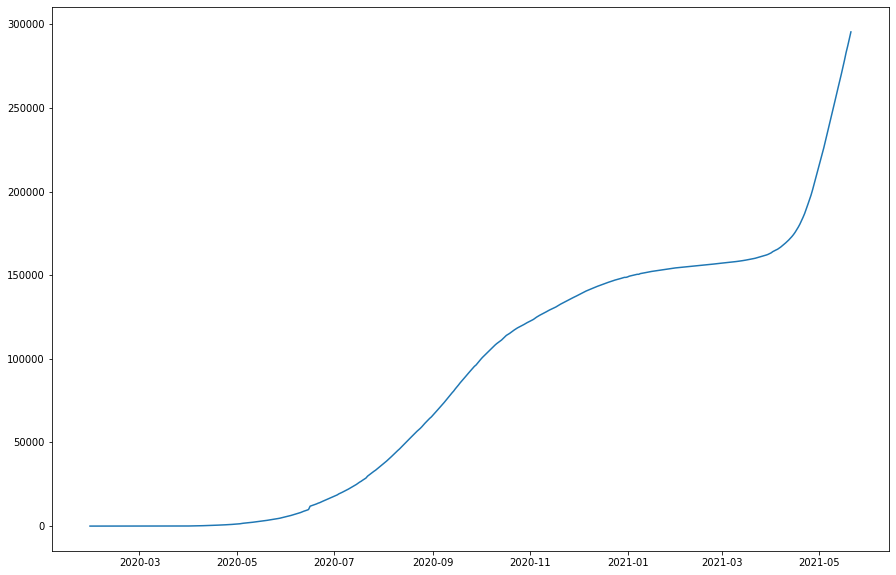

In [4882]:
plt.figure(figsize=(15,10))
plt.plot(Ind_data['Date'],Ind_data['Deaths'])

# Confirmed

In [4883]:
dates= Ind_data.Date.keys()
Ind_data['Date'] = np.array([i for i in range(len(dates))]).reshape(-1,1)

In [4884]:
ind_l=(len(Ind_data))-1
ind_t=(ind_l/100)*70

train = Ind_data[Ind_data.index <= ind_t]

test = Ind_data[Ind_data.index > ind_t]

In [4885]:
x_train = train[["Date"]].values
 
y_train = train["Confirmed"].values

x_test = test[["Date"]].values

y_test = test["Confirmed"].values

In [4886]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [4887]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

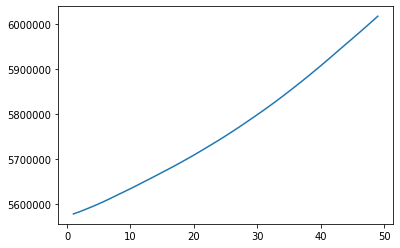

In [4888]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [4889]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [4890]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [4891]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_ind_c=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_ind_c)

In [4892]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_ind_c=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_ind_c)

In [4893]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_ind_c = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_ind_c)

In [4894]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_ind_c=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_ind_c)

<BarContainer object of 4 artists>

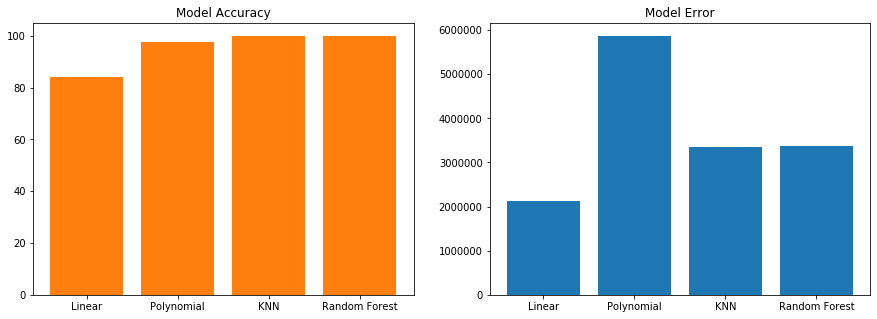

In [4895]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)

In [4896]:
def ind_accuracy_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def ind_error_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[0] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

child_ind3= html.Div([
   dbc.Row([html.H1('India')],style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     "margin": "0px 564px"                 
                    }),
     dbc.Row([html.H3('Model evaluation of Confirmed Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                 
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_i1',figure=ind_accuracy_conf())),
                    dbc.Col(dcc.Graph(id='graph_i2',figure=ind_error_conf())),
                                             
                                            
                    
                    

                ],   
            ),
   

])




In [4897]:
predict_data_ind=[]
for i in range(1,31):
    ind_l=ind_l+1
    predict_data_ind.append(ind_l)

predict_data_ind=np.array(predict_data_ind).reshape(-1,1)

In [4898]:
x=Ind_data.loc[:,['Date']].values
y=Ind_data.loc[:,['Confirmed']].values


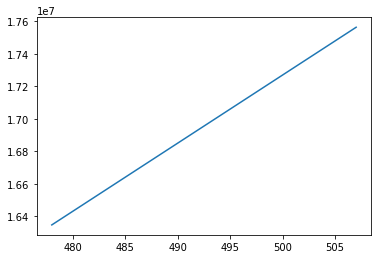

In [4899]:
regressor=LinearRegression()
regressor.fit(x,y)
pred_ind_c=regressor.predict(predict_data_ind)

plt.plot(predict_data_ind,pred_ind_c)

In [4900]:
#India Logistic Prediction
x_train = train[["Date","Confirmed"]].values

y_train = train["Lockdown"].values

x_test = test[["Date","Confirmed"]].values

y_test = test["Lockdown"].values


log=LogisticRegression()
log.fit(x_train,y_train)
pred_ind_lo=log.predict(x_test)

log_accu_ind=(accuracy_score(y_test,pred_ind_lo)*100)


x=Ind_data.loc[:,['Date','Confirmed']].values
y=Ind_data.loc[:,['Lockdown']].values
y=y.flatten()

ind_predict_log = np.concatenate((predict_data_ind,pred_ind_c),axis=1)


log=LogisticRegression()
log.fit(x,y)
pred_ind_log=log.predict(ind_predict_log)
pred_ind_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [4901]:
log_accu_ind

64.58333333333334

# Recovered

In [4902]:
x_train = train[["Date"]].values
 
y_train = train["Recovered"].values

x_test = test[["Date"]].values

y_test = test["Recovered"].values

In [4903]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [4904]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

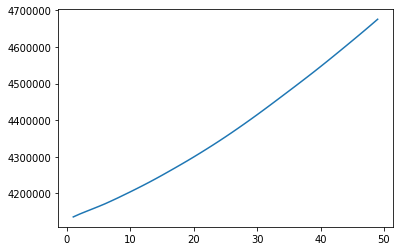

In [4905]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [4906]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [4907]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [4908]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_ind_r=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_ind_r)

In [4909]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_ind_r=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_ind_r)

In [4910]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_ind_r = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_ind_r)

In [4911]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_ind_r=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_ind_r)

<BarContainer object of 4 artists>

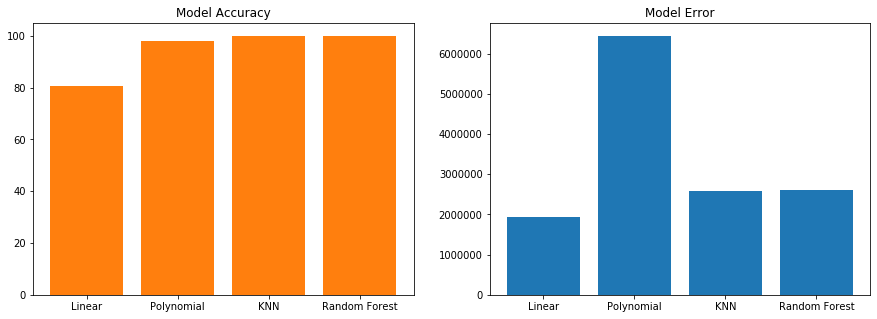

In [4912]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)

In [4913]:
def ind_accuracy_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def ind_error_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[2] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_ind4= html.Div([
   
     dbc.Row([html.H3('Model evaluation of Recovered Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                  
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_ii1',figure=ind_accuracy_rec())),
                    dbc.Col(dcc.Graph(id='graph_ii2',figure=ind_error_rec())),
                                             
                                            
                    
                    

                ],   
            ),
    
])


In [4914]:
x=Ind_data.loc[:,['Date']].values
y=Ind_data.loc[:,['Recovered']].values
y=y.flatten()  

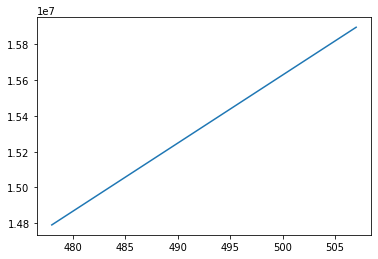

In [4915]:
regressor=LinearRegression()
regressor.fit(x,y)
pred_ind_r=regressor.predict(predict_data_ind)

plt.plot(predict_data_ind,pred_ind_r)

# Deaths

In [4916]:
x_train = train[["Date"]].values
 
y_train = train["Deaths"].values

x_test = test[["Date"]].values

y_test = test["Deaths"].values

In [4917]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [4918]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

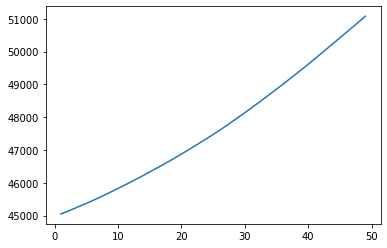

In [4919]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [4920]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [4921]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [4922]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_ind_d=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_ind_d)

In [4923]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_ind_d=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_ind_d)

In [4924]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_ind_d = knn.predict(x_test)
knn_e=mean_absolute_error(y_test,knn_pred_ind_d)

In [4925]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_ind_d=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_ind_d)

<BarContainer object of 4 artists>

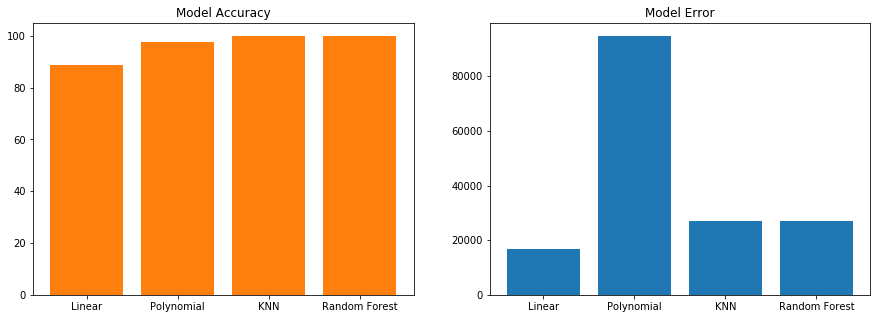

In [4926]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [4927]:
def ind_accuracy_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def ind_error_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[0] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_ind5= html.Div([
  
     dbc.Row([html.H3('Model evaluation of Death Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                 
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_iii1',figure=ind_accuracy_d())),
                    dbc.Col(dcc.Graph(id='graph_iii2',figure=ind_error_d())),
                                             
                                            
                    
                    

                ],   
            ),
    
])


In [4928]:
x=Ind_data.loc[:,['Date']].values
y=Ind_data.loc[:,['Deaths']].values
y=y.flatten()  

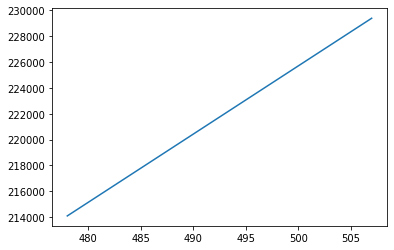

In [4929]:
regressor=LinearRegression()
regressor.fit(x,y)
pred_ind_d=regressor.predict(predict_data_ind)

plt.plot(predict_data_ind,pred_ind_d)

## India Webpage

In [4930]:
def graph_ind_c():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Ind_data_g['Date'], y=Ind_data['Daily_Cases'], name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 confirmed cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

def graph_ind_r():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Ind_data_g['Date'], y=Ind_data['Daily_Recovered'], name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
    title={
            'text': "Visualization of covid-19 recovered cases",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def graph_ind_d():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Ind_data_g['Date'], y=Ind_data['Daily_Deaths'], name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 death cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


In [4931]:
pred_ind_c=pred_ind_c.flatten()
def new_graph_ind_c():

    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_ind_c, name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
         title={
            'text': "Next 30 days prediction of confirmed cases'",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def new_graph_ind_r():
    
  
    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_ind_r, name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
         title={
            'text': "Next 30 days prediction of recovered cases'",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig
def new_graph_ind_d():
    
   
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_ind_d, name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
         title={
            'text': "Next 30 days prediction of death cases'",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

### Graph output on the webpage

In [4932]:
child_ind1= html.Div([
    dbc.Row([html.H2('India')],
           style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     'margin': '0px 564px'             
                    }),
                    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_i1',figure=graph_ind_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_i2',figure=graph_ind_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_i3',figure=graph_ind_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
           

])


In [4933]:
#model graph
child_ind2= html.Div([
                    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_i1',figure=new_graph_ind_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_i2',figure=new_graph_ind_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_i3',figure=new_graph_ind_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
           

])


# Nepal

In [4934]:
#importing Dataset
Nep_data_g = pd.read_csv("C:/Users/Muhammad Tousique/Final Year Project/Latest Data/Nepal.csv")
Nep_data = Nep_data_g  

In [4935]:
#Calculating for New Positive Cases per day
confirmed=Nep_data["Confirmed"]
active_day=[0]*len(confirmed)
active_day[0]=confirmed[0]
for i in range(1,len(confirmed)):
    active_day[i]=confirmed[i]-confirmed[i-1]
new_cases= pd.DataFrame(data=active_day, index=None, columns=["Daily_Cases"])

In [4936]:
#Calculating for New Deaths Cases per day
deaths=Nep_data["Deaths"]
deaths_day=[0]*len(deaths)
deaths_day[0]=deaths[0]
for i in range(1,len(deaths)):
    deaths_day[i]=deaths[i]-deaths[i-1]
new_deaths= pd.DataFrame(data=deaths_day, index=None, columns=["Daily_Deaths"])


In [4937]:
#Calculating for New Recovered Cases per day
recovered=Nep_data["Recovered"]
recovered_day=[0]*len(recovered)
recovered_day[0]=recovered[0]
for i in range(1,len(recovered)):
    recovered_day[i]=recovered[i]-recovered[i-1]
new_recovered= pd.DataFrame(data=recovered_day, index=None, columns=["Daily_Recovered"])

In [4938]:
#Concat new columns into dataframe  
Nep_data = pd.concat([Nep_data,new_cases,new_deaths,new_recovered], axis=1)

In [4939]:
#changing date string column to date
Nep_data['Date'] = pd.to_datetime(Nep_data['Date'])
Nep_data.head()

,Country,Date,Confirmed,Recovered,Deaths,Active,Test_conducted,Lockdown,Daily_Cases,Daily_Deaths,Daily_Recovered
0,Nepal,2020-01-25,1,0,0,1,1,0,1,0,0
1,Nepal,2020-01-26,1,0,0,1,1,0,0,0,0
2,Nepal,2020-01-27,1,0,0,1,1,0,0,0,0
3,Nepal,2020-01-28,1,0,0,1,1,0,0,0,0
4,Nepal,2020-01-29,1,0,0,1,1,0,0,0,0


In [4940]:
#Checking null values in dataframe
variables = Nep_data.columns 
Nep_data.isnull().sum().loc[variables]

Country            0
Date               0
Confirmed          0
Recovered          0
Deaths             0
Active             0
Test_conducted     0
Lockdown           0
Daily_Cases        0
Daily_Deaths       0
Daily_Recovered    0
dtype: int64

In [4941]:
#January 2020 Nepal
jan_nepal_20=Nep_data[Nep_data["Date"].between('2020-01-25','2020-01-31')]
nepal_deaths=jan_nepal_20['Daily_Deaths']
nepal_cases=jan_nepal_20['Daily_Cases']
nepal_test=jan_nepal_20['Test_conducted']
nepal_recovered=jan_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jan_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_jan_20_positive_rate=((sum_cases/sum_test)*100)
nepal_jan_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_jan_20_death_rate=((sum_deaths/sum_cases)*100)

#feb 2020 Nepal
feb_nepal_20=Nep_data[Nep_data["Date"].between('2020-02-01','2020-02-29')]
nepal_deaths=feb_nepal_20['Daily_Deaths']
nepal_cases=feb_nepal_20['Daily_Cases']
nepal_test=feb_nepal_20['Test_conducted']
nepal_recovered=feb_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in feb_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_feb_20_positive_rate=((sum_cases/sum_test)*100)
nepal_feb_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_feb_20_death_rate=((sum_deaths/sum_cases)*100)

#mar 2020 Nepal
mar_nepal_20=Nep_data[Nep_data["Date"].between('2020-03-01','2020-03-31')]
nepal_deaths=mar_nepal_20['Daily_Deaths']
nepal_cases=mar_nepal_20['Daily_Cases']
nepal_test=mar_nepal_20['Test_conducted']
nepal_recovered=mar_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_mar_20_positive_rate=((sum_cases/sum_test)*100)
nepal_mar_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_mar_20_death_rate=((sum_deaths/sum_cases)*100)



#april 2020 Nepal
apr_nepal_20=Nep_data[Nep_data["Date"].between('2020-04-01','2020-04-30')]
nepal_deaths=apr_nepal_20['Daily_Deaths']
nepal_cases=apr_nepal_20['Daily_Cases']
nepal_test=apr_nepal_20['Test_conducted']
nepal_recovered=apr_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_apr_20_positive_rate=((sum_cases/sum_test)*100)
nepal_apr_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_apr_20_death_rate=((sum_deaths/sum_cases)*100)



#may 2020 Nepal
may_nepal_20=Nep_data[Nep_data["Date"].between('2020-05-01','2020-05-31')]
nepal_deaths=may_nepal_20['Daily_Deaths']
nepal_cases=may_nepal_20['Daily_Cases']
nepal_test=may_nepal_20['Test_conducted']
nepal_recovered=may_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_may_20_positive_rate=((sum_cases/sum_test)*100)
nepal_may_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_may_20_death_rate=((sum_deaths/sum_cases)*100)


#june 2020 Nepal
jun_nepal_20=Nep_data[Nep_data["Date"].between('2020-06-01','2020-06-30')]
nepal_deaths=jun_nepal_20['Daily_Deaths']
nepal_cases=jun_nepal_20['Daily_Cases']
nepal_test=jun_nepal_20['Test_conducted']
nepal_recovered=jun_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jun_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_jun_20_positive_rate=((sum_cases/sum_test)*100)
nepal_jun_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_jun_20_death_rate=((sum_deaths/sum_cases)*100)

#july 2020 Nepal
july_nepal_20=Nep_data[Nep_data["Date"].between('2020-07-01','2020-07-31')]
nepal_deaths=july_nepal_20['Daily_Deaths']
nepal_cases=july_nepal_20['Daily_Cases']
nepal_test=july_nepal_20['Test_conducted']
nepal_recovered=july_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in july_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_july_20_positive_rate=((sum_cases/sum_test)*100)
nepal_july_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_july_20_death_rate=((sum_deaths/sum_cases)*100)

#August 2020 Nepal
aug_nepal_20=Nep_data[Nep_data["Date"].between('2020-08-01','2020-08-31')]
nepal_deaths=aug_nepal_20['Daily_Deaths']
nepal_cases=aug_nepal_20['Daily_Cases']
nepal_test=aug_nepal_20['Test_conducted']
nepal_recovered=aug_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in aug_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_aug_20_positive_rate=((sum_cases/sum_test)*100)
nepal_aug_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_aug_20_death_rate=((sum_deaths/sum_cases)*100)

#September 2020 Nepal
sep_nepal_20=Nep_data[Nep_data["Date"].between('2020-09-01','2020-09-30')]
nepal_deaths=sep_nepal_20['Daily_Deaths']
nepal_cases=sep_nepal_20['Daily_Cases']
nepal_test=sep_nepal_20['Test_conducted']
nepal_recovered=sep_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in sep_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_sep_20_positive_rate=((sum_cases/sum_test)*100)
nepal_sep_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_sep_20_death_rate=((sum_deaths/sum_cases)*100)

#October 2020 Nepal
oct_nepal_20=Nep_data[Nep_data["Date"].between('2020-10-01','2020-10-31')]
nepal_deaths=oct_nepal_20['Daily_Deaths']
nepal_cases=oct_nepal_20['Daily_Cases']
nepal_test=oct_nepal_20['Test_conducted']
nepal_recovered=oct_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in oct_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_oct_20_positive_rate=((sum_cases/sum_test)*100)
nepal_oct_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_oct_20_death_rate=((sum_deaths/sum_cases)*100)


#November 2020 Nepal
nov_nepal_20=Nep_data[Nep_data["Date"].between('2020-11-01','2020-11-30')]
nepal_deaths=nov_nepal_20['Daily_Deaths']
nepal_cases=nov_nepal_20['Daily_Cases']
nepal_test=nov_nepal_20['Test_conducted']
nepal_recovered=nov_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in nov_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_nov_20_positive_rate=((sum_cases/sum_test)*100)
nepal_nov_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_nov_20_death_rate=((sum_deaths/sum_cases)*100)


#December 2020 Nepal
dec_nepal_20=Nep_data[Nep_data["Date"].between('2020-12-01','2020-12-31')]
nepal_deaths=dec_nepal_20['Daily_Deaths']
nepal_cases=dec_nepal_20['Daily_Cases']
nepal_test=dec_nepal_20['Test_conducted']
nepal_recovered=dec_nepal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in dec_nepal_20.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_dec_20_positive_rate=((sum_cases/sum_test)*100)
nepal_dec_20_recover_rate=((sum_recover/sum_cases)*100)
nepal_dec_20_death_rate=((sum_deaths/sum_cases)*100)


#January 2021 Nepal
jan_nepal_21=Nep_data[Nep_data["Date"].between('2021-01-01','2021-01-31')]
nepal_deaths=jan_nepal_21['Daily_Deaths']
nepal_cases=jan_nepal_21['Daily_Cases']
nepal_test=jan_nepal_21['Test_conducted']
nepal_recovered=jan_nepal_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jan_nepal_21.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_jan_21_positive_rate=((sum_cases/sum_test)*100)
nepal_jan_21_recover_rate=((sum_recover/sum_cases)*100)
nepal_jan_21_death_rate=((sum_deaths/sum_cases)*100)

#February 2021 Nepal
feb_nepal_21=Nep_data[Nep_data["Date"].between('2021-02-01','2021-02-28')]
nepal_deaths=feb_nepal_21['Daily_Deaths']
nepal_cases=feb_nepal_21['Daily_Cases']
nepal_test=feb_nepal_21['Test_conducted']
nepal_recovered=feb_nepal_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in feb_nepal_21.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_feb_21_positive_rate=((sum_cases/sum_test)*100)
nepal_feb_21_recover_rate=((sum_recover/sum_cases)*100)
nepal_feb_21_death_rate=((sum_deaths/sum_cases)*100)

#March 2021 Nepal
mar_nepal_21=Nep_data[Nep_data["Date"].between('2021-03-01','2021-03-31')]
nepal_deaths=mar_nepal_21['Daily_Deaths']
nepal_cases=mar_nepal_21['Daily_Cases']
nepal_test=mar_nepal_21['Test_conducted']
nepal_recovered=mar_nepal_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_nepal_21.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_mar_21_positive_rate=((sum_cases/sum_test)*100)
nepal_mar_21_recover_rate=((sum_recover/sum_cases)*100)
nepal_mar_21_death_rate=((sum_deaths/sum_cases)*100)

#April 2021 Nepal
apr_nepal_21=Nep_data[Nep_data["Date"].between('2021-04-01','2021-04-30')]
nepal_deaths=apr_nepal_21['Daily_Deaths']
nepal_cases=apr_nepal_21['Daily_Cases']
nepal_test=apr_nepal_21['Test_conducted']
nepal_recovered=apr_nepal_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_nepal_21.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_apr_21_positive_rate=((sum_cases/sum_test)*100)
nepal_apr_21_recover_rate=((sum_recover/sum_cases)*100)
nepal_apr_21_death_rate=((sum_deaths/sum_cases)*100)

#May 2021 Nepal
may_nepal_21=Nep_data[Nep_data["Date"].between('2021-05-01','2021-05-21')]
nepal_deaths=may_nepal_21['Daily_Deaths']
nepal_cases=may_nepal_21['Daily_Cases']
nepal_test=may_nepal_21['Test_conducted']
nepal_recovered=may_nepal_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_nepal_21.index:
    sum_deaths=sum_deaths+nepal_deaths[ind]
    sum_cases=sum_cases+nepal_cases[ind]
    sum_test=sum_test+nepal_test[ind]
    sum_recover=sum_recover+nepal_recovered[ind]
    

nepal_may_21_positive_rate=((sum_cases/sum_test)*100)
nepal_may_21_recover_rate=((sum_recover/sum_cases)*100)
nepal_may_21_death_rate=((sum_deaths/sum_cases)*100)

In [4942]:
months = ['Jan 20','Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
positive = [nepal_jan_20_positive_rate,nepal_feb_20_positive_rate,nepal_mar_20_positive_rate,nepal_apr_20_positive_rate,nepal_may_20_positive_rate,nepal_jun_20_positive_rate,nepal_july_20_positive_rate,nepal_aug_20_positive_rate,nepal_sep_20_positive_rate,nepal_oct_20_positive_rate,nepal_nov_20_positive_rate,nepal_dec_20_positive_rate,nepal_jan_21_positive_rate,nepal_feb_21_positive_rate,nepal_mar_21_positive_rate,nepal_apr_21_positive_rate,nepal_may_21_positive_rate,]

In [4943]:
months = ['Jan 20','Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
recover = [nepal_jan_20_recover_rate,nepal_feb_20_recover_rate,nepal_mar_20_recover_rate,nepal_apr_20_recover_rate,nepal_may_20_recover_rate,nepal_jun_20_recover_rate,nepal_july_20_recover_rate,nepal_aug_20_recover_rate,nepal_sep_20_recover_rate,nepal_oct_20_recover_rate,nepal_nov_20_recover_rate,nepal_dec_20_recover_rate,nepal_jan_21_recover_rate,nepal_feb_21_recover_rate,nepal_mar_21_recover_rate,nepal_apr_21_recover_rate,nepal_may_21_recover_rate,]

In [4944]:
months = ['Jan 20','Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
death = [nepal_jan_20_death_rate,nepal_feb_20_death_rate,nepal_mar_20_death_rate,nepal_apr_20_death_rate,nepal_may_20_death_rate,nepal_jun_20_death_rate,nepal_july_20_death_rate,nepal_aug_20_death_rate,nepal_sep_20_death_rate,nepal_oct_20_death_rate,nepal_nov_20_death_rate,nepal_dec_20_death_rate,nepal_jan_21_death_rate,nepal_feb_21_death_rate,nepal_mar_21_death_rate,nepal_apr_21_death_rate,nepal_may_21_death_rate,]

In [4945]:
def nep_ratio_bar_p():
    x = months
    y = positive


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Positivity Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def nep_ratio_bar_r():
    x = months
    y = recover


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='lightslategray', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Recovery Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def nep_ratio_bar_d():
    x = months
    y = death


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='crimson', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Death Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_nep6= html.Div([
   
     
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_nnnn1',figure=nep_ratio_bar_p())),
                    dbc.Col(dcc.Graph(id='graph_nnnn1',figure=nep_ratio_bar_d())),
                    dbc.Col(dcc.Graph(id='graph_nnnn1',figure=nep_ratio_bar_r())),
                ],   
            ),
    
     

])

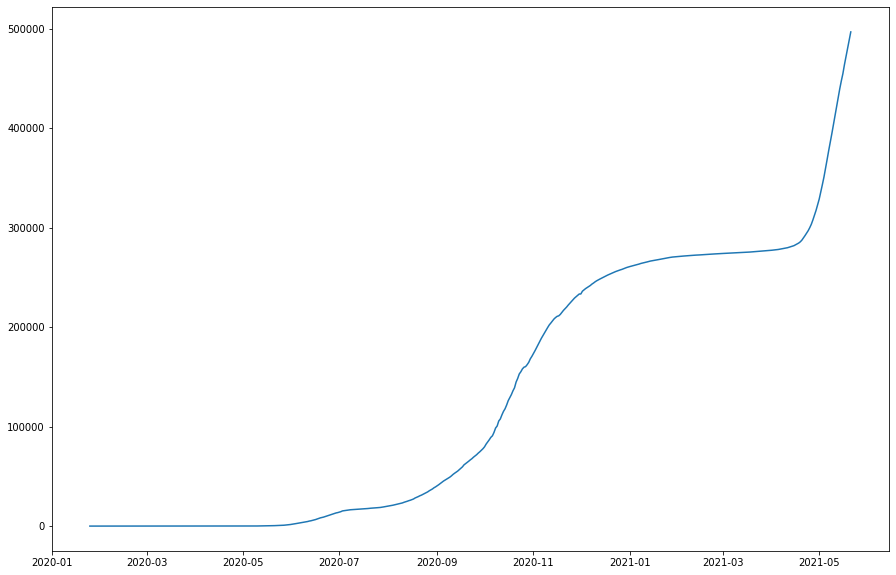

In [4946]:
plt.figure(figsize=(15,10))
plt.plot(Nep_data['Date'],Nep_data['Confirmed'])

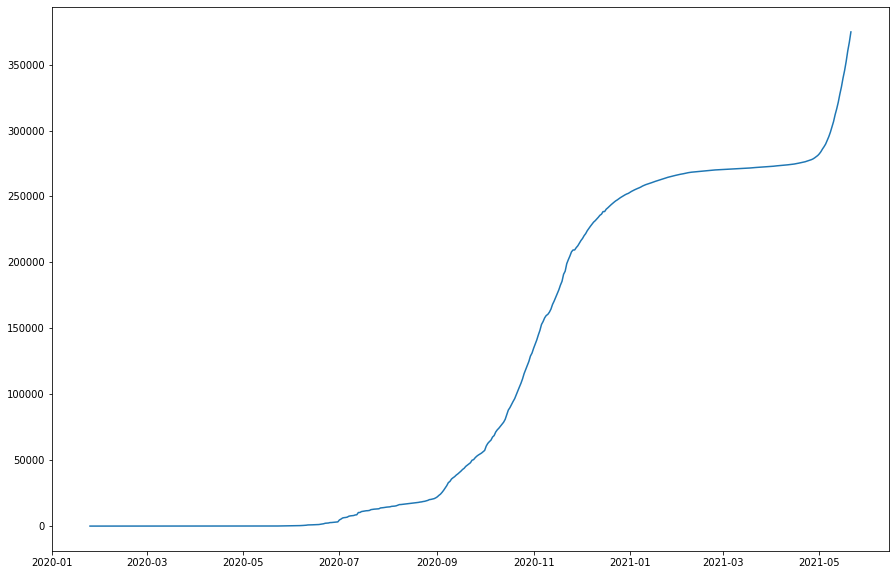

In [4947]:
plt.figure(figsize=(15,10))
plt.plot(Nep_data['Date'],Nep_data['Recovered'])

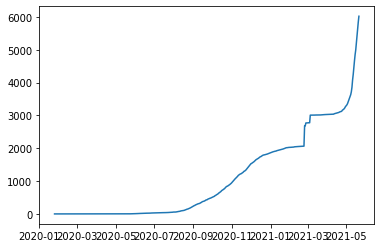

In [4948]:
plt.plot(Nep_data['Date'],Nep_data['Deaths'])

# Confirmed

In [4949]:
dates= Nep_data.Date.keys()
Nep_data['Date'] = np.array([i for i in range(len(dates))]).reshape(-1,1)

In [4950]:
nep_l=(len(Nep_data))-1
nep_t=(nep_l/100)*70

train = Nep_data[Nep_data.index <= nep_t]

test = Nep_data[Nep_data.index > nep_t]

In [4951]:
x_train = train[["Date"]].values
 
y_train = train["Confirmed"].values

x_test = test[["Date"]].values

y_test = test["Confirmed"].values

In [4952]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [4953]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

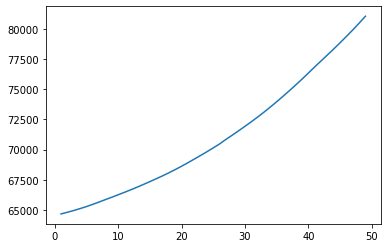

In [4954]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [4955]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [4956]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [4957]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_nep_c=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_nep_c)

In [4958]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_nep_c=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_nep_c)

In [4959]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_nep_c = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_nep_c)

In [4960]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_nep_c=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_nep_c)

<BarContainer object of 4 artists>

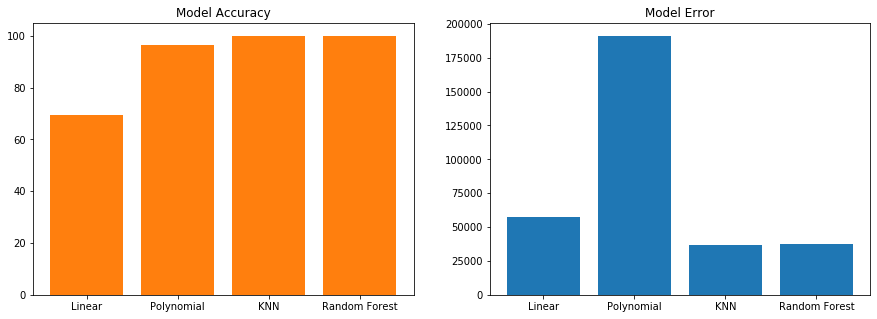

In [4961]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [4962]:
def nep_accuracy_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def nep_error_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[2] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

child_nep3= html.Div([
   dbc.Row([html.H1('Nepal')],style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     "margin": "0px 564px"                  
                    }),
     dbc.Row([html.H3('Model evaluation of Confirmed Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                 
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_n1',figure=nep_accuracy_conf())),
                    dbc.Col(dcc.Graph(id='graph_n2',figure=nep_error_conf())),
                                             
                                            
                    
                    

                ],   
            ),
   

])


In [4963]:
predict_data_nep=[]
for i in range(1,31):
    nep_l=nep_l+1
    predict_data_nep.append(nep_l)

predict_data_nep=np.array(predict_data_nep).reshape(-1,1)

In [4964]:
x=Nep_data.loc[:,['Date']].values
y=Nep_data.loc[:,['Confirmed']].values


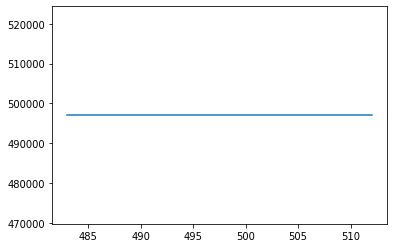

In [4965]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x,y)
pred_nep_c = knn.predict(predict_data_nep)

plt.plot(predict_data_nep,pred_nep_c)

In [4966]:
#Nepal Logistic Prediction
x_train = train[["Date","Confirmed"]].values

y_train = train["Lockdown"].values

x_test = test[["Date","Confirmed"]].values

y_test = test["Lockdown"].values

log=LogisticRegression()
log.fit(x_train,y_train)
pred_nep_lo=log.predict(x_test)

log_accu_nep=(accuracy_score(y_test,pred_nep_lo)*100)


x=Nep_data.loc[:,['Date','Confirmed']].values
y=Nep_data.loc[:,['Lockdown']].values
y=y.flatten()

nep_predict_log = np.concatenate((predict_data_nep,pred_nep_c),axis=1)


log=LogisticRegression()
log.fit(x,y)
pred_nep_log=log.predict(nep_predict_log)
pred_nep_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [4967]:
log_accu_nep

77.93103448275862

# Recovered

In [4968]:
x_train = train[["Date"]].values
 
y_train = train["Recovered"].values

x_test = test[["Date"]].values

y_test = test["Recovered"].values

In [4969]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [4970]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

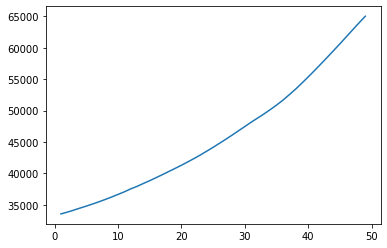

In [4971]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [4972]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [4973]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [4974]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_nep_r=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_nep_r)

In [4975]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_nep_r=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_nep_r)

In [4976]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_nep_r = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_nep_r)

In [4977]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_nep_r=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_nep_r)

<BarContainer object of 4 artists>

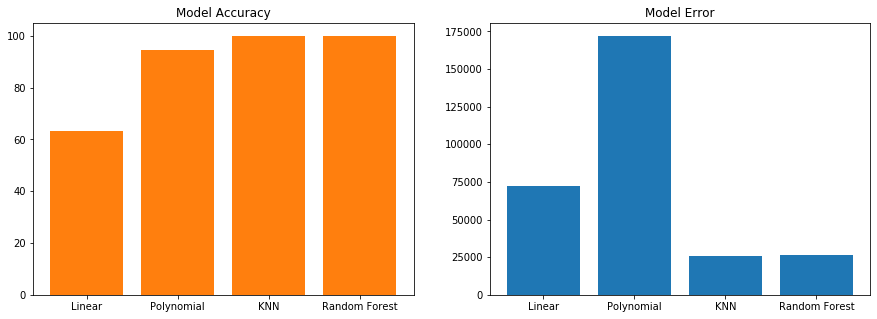

In [4978]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [4979]:
def nep_accuracy_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def nep_error_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[2] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

child_nep4= html.Div([
   
     dbc.Row([html.H3('Model evaluation of Recovered Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                  
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_nn1',figure=nep_accuracy_rec())),
                    dbc.Col(dcc.Graph(id='graph_nn2',figure=nep_error_rec())),
                                             
                                            
                    
                    

                ],   
            ),
    
])



In [4980]:
x=Nep_data.loc[:,['Date']].values
y=Nep_data.loc[:,['Recovered']].values
y=y.flatten()

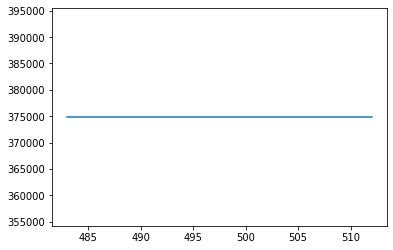

In [4981]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x,y)
pred_nep_r = knn.predict(predict_data_nep)

plt.plot(predict_data_nep,pred_nep_r)

# Deaths

In [4982]:
x_train = train[["Date"]].values
 
y_train = train["Deaths"].values

x_test = test[["Date"]].values

y_test = test["Deaths"].values

In [4983]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [4984]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

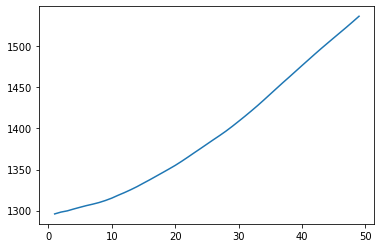

In [4985]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [4986]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [4987]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [4988]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_nep_d=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_nep_d)

In [4989]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_nep_d=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_nep_d)

In [4990]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_nep_d = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_nep_d)

In [4991]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_nep_d=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_nep_d)

<BarContainer object of 4 artists>

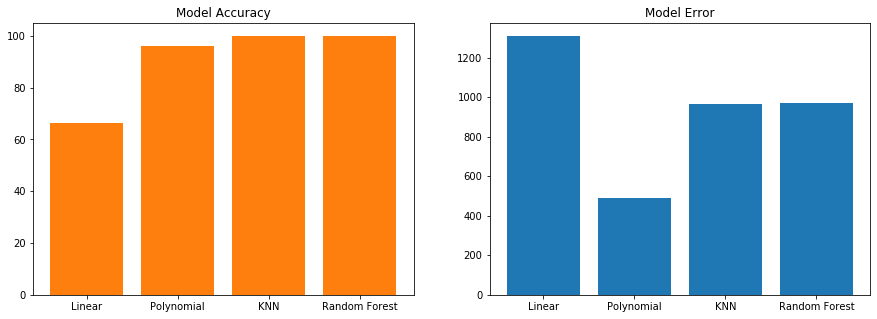

In [4992]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [4993]:
def nep_accuracy_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def nep_error_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[1] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_nep5= html.Div([
  
     dbc.Row([html.H3('Model evaluation of Death Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                  
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_nnn1',figure=nep_accuracy_d())),
                    dbc.Col(dcc.Graph(id='graph_nnn2',figure=nep_error_d())),
                                             
                                            
                    
                    

                ],   
            ),
    
])



In [4994]:
x=Nep_data.loc[:,['Date']].values
y=Nep_data.loc[:,['Deaths']].values
y=y.flatten()

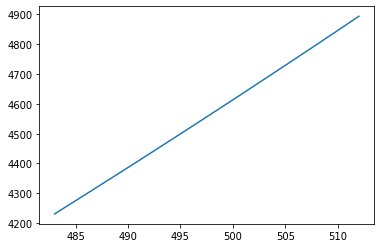

In [4995]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
reg=LinearRegression()
reg.fit(x_poly,y)
pred_nep_d=reg.predict(poly.fit_transform(predict_data_nep))

plt.plot(predict_data_nep,pred_nep_d)

## Nepal Webpage

In [4996]:
def graph_nep_c():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Nep_data_g['Date'], y=Nep_data['Daily_Cases'], name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
    title={
            'text': "Visualization of covid-19 confirmed cases",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

def graph_nep_r():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Nep_data_g['Date'], y=Nep_data['Daily_Recovered'], name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
    title={
            'text': "Visualization of covid-19 recovered cases",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def graph_nep_d():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Nep_data_g['Date'], y=Nep_data['Daily_Deaths'], name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 death cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


In [4997]:
pred_nep_c=pred_nep_c.flatten()
def new_graph_nep_c():

    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_nep_c, name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
         title={
            'text': "Next 30 days prediction of confirmed cases'",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def new_graph_nep_r():
    
  
    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_nep_r, name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
     title={
            'text': "Next 30 days prediction of recovered cases'",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig
def new_graph_nep_d():
    
   
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_nep_d, name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
         title={
            'text': "Next 30 days prediction of death cases'",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

### Graph output on the webpage

In [4998]:
child_nep1= html.Div([
    dbc.Row([html.H2('Nepal')],
           style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     'margin': '0px 564px'             
                    }),
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_n1',figure=graph_nep_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_n2',figure=graph_nep_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_n3',figure=graph_nep_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
           

])

In [4999]:
#model graph
child_nep2= html.Div([
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw1',figure=new_graph_nep_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw1',figure=new_graph_nep_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw1',figure=new_graph_nep_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
           

])

# SRI LANKA

In [5000]:
#importing Dataset
Sri_data_g = pd.read_csv("C:/Users/Muhammad Tousique/Final Year Project/Latest Data/Srilanka.csv")
Sri_data = Sri_data_g 

In [5001]:
#Calculating for New Positive Cases per day
confirmed=Sri_data["Confirmed"]
active_day=[0]*len(confirmed)
active_day[0]=confirmed[0]
for i in range(1,len(confirmed)):
    active_day[i]=confirmed[i]-confirmed[i-1]
new_cases= pd.DataFrame(data=active_day, index=None, columns=["Daily_Cases"])

In [5002]:
#Calculating for New Deaths Cases per day
deaths=Sri_data["Deaths"]
deaths_day=[0]*len(deaths)
deaths_day[0]=deaths[0]
for i in range(1,len(deaths)):
    deaths_day[i]=deaths[i]-deaths[i-1]
new_deaths= pd.DataFrame(data=deaths_day, index=None, columns=["Daily_Deaths"])

In [5003]:
#Calculating for New Recovered Cases per day
recovered=Sri_data["Recovered"]
recovered_day=[0]*len(recovered)
recovered_day[0]=recovered[0]
for i in range(1,len(recovered)):
    recovered_day[i]=recovered[i]-recovered[i-1]
new_recovered= pd.DataFrame(data=recovered_day, index=None, columns=["Daily_Recovered"])

In [5004]:
#Concat new columns into data frame
Sri_data = pd.concat([Sri_data,new_cases,new_deaths,new_recovered], axis=1)

In [5005]:
#changing string date column to date
Sri_data['Date'] = pd.to_datetime(Sri_data['Date'])
Sri_data.head()


,Country,Date,Confirmed,Recovered,Deaths,Active,Test_conducted,Lockdown,Daily_Cases,Daily_Deaths,Daily_Recovered
0,Sri Lanka,2020-01-27,1,0,0,1,1,0,1,0,0
1,Sri Lanka,2020-01-28,1,0,0,1,1,0,0,0,0
2,Sri Lanka,2020-01-29,1,0,0,1,1,0,0,0,0
3,Sri Lanka,2020-01-30,1,0,0,1,1,0,0,0,0
4,Sri Lanka,2020-01-31,1,0,0,1,1,0,0,0,0


In [5006]:
#checking null values in dataframe
variables = Sri_data.columns 
Sri_data.isnull().sum().loc[variables]

Country            0
Date               0
Confirmed          0
Recovered          0
Deaths             0
Active             0
Test_conducted     0
Lockdown           0
Daily_Cases        0
Daily_Deaths       0
Daily_Recovered    0
dtype: int64

In [5007]:
#January 2020 Sri Lanka
jan_sri_20=Sri_data[Sri_data["Date"].between('2020-01-27','2020-01-31')]
sri_deaths=jan_sri_20['Daily_Deaths']
sri_cases=jan_sri_20['Daily_Cases']
sri_test=jan_sri_20['Test_conducted']
sri_recovered=jan_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jan_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_jan_20_positive_rate=((sum_cases/sum_test)*100)
sri_jan_20_recover_rate=((sum_recover/sum_cases)*100)
sri_jan_20_death_rate=((sum_deaths/sum_cases)*100)

#feb 2020 Sri Lanka
feb_sri_20=Sri_data[Sri_data["Date"].between('2020-02-01','2020-02-29')]
sri_deaths=feb_sri_20['Daily_Deaths']
sri_cases=feb_sri_20['Daily_Cases']
sri_test=feb_sri_20['Test_conducted']
sri_recovered=feb_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in feb_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_feb_20_positive_rate=((sum_cases/sum_test)*100)
sri_feb_20_recover_rate=((sum_recover/sum_cases)*100)
sri_feb_20_death_rate=((sum_deaths/sum_cases)*100)

#mar 2020 Sri Lanka
mar_sri_20=Sri_data[Sri_data["Date"].between('2020-03-01','2020-03-31')]
sri_deaths=mar_sri_20['Daily_Deaths']
sri_cases=mar_sri_20['Daily_Cases']
sri_test=mar_sri_20['Test_conducted']
sri_recovered=mar_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_mar_20_positive_rate=((sum_cases/sum_test)*100)
sri_mar_20_recover_rate=((sum_recover/sum_cases)*100)
sri_mar_20_death_rate=((sum_deaths/sum_cases)*100)



#april 2020 Sri Lanka
apr_sri_20=Sri_data[Sri_data["Date"].between('2020-04-01','2020-04-30')]
sri_deaths=apr_sri_20['Daily_Deaths']
sri_cases=apr_sri_20['Daily_Cases']
sri_test=apr_sri_20['Test_conducted']
sri_recovered=apr_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_apr_20_positive_rate=((sum_cases/sum_test)*100)
sri_apr_20_recover_rate=((sum_recover/sum_cases)*100)
sri_apr_20_death_rate=((sum_deaths/sum_cases)*100)



#may 2020 Sri Lanka
may_sri_20=Sri_data[Sri_data["Date"].between('2020-05-01','2020-05-31')]
sri_deaths=may_sri_20['Daily_Deaths']
sri_cases=may_sri_20['Daily_Cases']
sri_test=may_sri_20['Test_conducted']
sri_recovered=may_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_may_20_positive_rate=((sum_cases/sum_test)*100)
sri_may_20_recover_rate=((sum_recover/sum_cases)*100)
sri_may_20_death_rate=((sum_deaths/sum_cases)*100)


#june 2020 Sri Lanka
jun_sri_20=Sri_data[Sri_data["Date"].between('2020-06-01','2020-06-30')]
sri_deaths=jun_sri_20['Daily_Deaths']
sri_cases=jun_sri_20['Daily_Cases']
sri_test=jun_sri_20['Test_conducted']
sri_recovered=jun_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jun_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_jun_20_positive_rate=((sum_cases/sum_test)*100)
sri_jun_20_recover_rate=((sum_recover/sum_cases)*100)
sri_jun_20_death_rate=((sum_deaths/sum_cases)*100)

#july 2020 Sri Lanka
july_sri_20=Sri_data[Sri_data["Date"].between('2020-07-01','2020-07-31')]
sri_deaths=july_sri_20['Daily_Deaths']
sri_cases=july_sri_20['Daily_Cases']
sri_test=july_sri_20['Test_conducted']
sri_recovered=july_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in july_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_july_20_positive_rate=((sum_cases/sum_test)*100)
sri_july_20_recover_rate=((sum_recover/sum_cases)*100)
sri_july_20_death_rate=((sum_deaths/sum_cases)*100)

#August 2020 Sri Lanka
aug_sri_20=Sri_data[Sri_data["Date"].between('2020-08-01','2020-08-31')]
sri_deaths=aug_sri_20['Daily_Deaths']
sri_cases=aug_sri_20['Daily_Cases']
sri_test=aug_sri_20['Test_conducted']
sri_recovered=aug_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in aug_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_aug_20_positive_rate=((sum_cases/sum_test)*100)
sri_aug_20_recover_rate=((sum_recover/sum_cases)*100)
sri_aug_20_death_rate=((sum_deaths/sum_cases)*100)

#September 2020 Sri Lanka
sep_sri_20=Sri_data[Sri_data["Date"].between('2020-09-01','2020-09-30')]
sri_deaths=sep_sri_20['Daily_Deaths']
sri_cases=sep_sri_20['Daily_Cases']
sri_test=sep_sri_20['Test_conducted']
sri_recovered=sep_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in sep_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_sep_20_positive_rate=((sum_cases/sum_test)*100)
sri_sep_20_recover_rate=((sum_recover/sum_cases)*100)
sri_sep_20_death_rate=((sum_deaths/sum_cases)*100)

#October 2020 Sri Lanka
oct_sri_20=Sri_data[Sri_data["Date"].between('2020-10-01','2020-10-31')]
sri_deaths=oct_sri_20['Daily_Deaths']
sri_cases=oct_sri_20['Daily_Cases']
sri_test=oct_sri_20['Test_conducted']
sri_recovered=oct_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in oct_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_oct_20_positive_rate=((sum_cases/sum_test)*100)
sri_oct_20_recover_rate=((sum_recover/sum_cases)*100)
sri_oct_20_death_rate=((sum_deaths/sum_cases)*100)


#November 2020 Sri Lanka
nov_sri_20=Sri_data[Sri_data["Date"].between('2020-11-01','2020-11-30')]
sri_deaths=nov_sri_20['Daily_Deaths']
sri_cases=nov_sri_20['Daily_Cases']
sri_test=nov_sri_20['Test_conducted']
sri_recovered=nov_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in nov_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_nov_20_positive_rate=((sum_cases/sum_test)*100)
sri_nov_20_recover_rate=((sum_recover/sum_cases)*100)
sri_nov_20_death_rate=((sum_deaths/sum_cases)*100)


#December 2020 Sri Lanka
dec_sri_20=Sri_data[Sri_data["Date"].between('2020-12-01','2020-12-31')]
sri_deaths=dec_sri_20['Daily_Deaths']
sri_cases=dec_sri_20['Daily_Cases']
sri_test=dec_sri_20['Test_conducted']
sri_recovered=dec_sri_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in dec_sri_20.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_dec_20_positive_rate=((sum_cases/sum_test)*100)
sri_dec_20_recover_rate=((sum_recover/sum_cases)*100)
sri_dec_20_death_rate=((sum_deaths/sum_cases)*100)


#January 2021 Sri Lanka
jan_sri_21=Sri_data[Sri_data["Date"].between('2021-01-01','2021-01-31')]
sri_deaths=jan_sri_21['Daily_Deaths']
sri_cases=jan_sri_21['Daily_Cases']
sri_test=jan_sri_21['Test_conducted']
sri_recovered=jan_sri_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jan_sri_21.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_jan_21_positive_rate=((sum_cases/sum_test)*100)
sri_jan_21_recover_rate=((sum_recover/sum_cases)*100)
sri_jan_21_death_rate=((sum_deaths/sum_cases)*100)

#February 2021 Sri Lanka
feb_sri_21=Sri_data[Sri_data["Date"].between('2021-02-01','2021-02-28')]
sri_deaths=feb_sri_21['Daily_Deaths']
sri_cases=feb_sri_21['Daily_Cases']
sri_test=feb_sri_21['Test_conducted']
sri_recovered=feb_sri_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in feb_sri_21.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_feb_21_positive_rate=((sum_cases/sum_test)*100)
sri_feb_21_recover_rate=((sum_recover/sum_cases)*100)
sri_feb_21_death_rate=((sum_deaths/sum_cases)*100)

#March 2021 Sri Lanka
mar_sri_21=Sri_data[Sri_data["Date"].between('2021-03-01','2021-03-31')]
sri_deaths=mar_sri_21['Daily_Deaths']
sri_cases=mar_sri_21['Daily_Cases']
sri_test=mar_sri_21['Test_conducted']
sri_recovered=mar_sri_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_sri_21.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_mar_21_positive_rate=((sum_cases/sum_test)*100)
sri_mar_21_recover_rate=((sum_recover/sum_cases)*100)
sri_mar_21_death_rate=((sum_deaths/sum_cases)*100)

#April 2021 Sri Lanka
apr_sri_21=Sri_data[Sri_data["Date"].between('2021-04-01','2021-04-30')]
sri_deaths=apr_sri_21['Daily_Deaths']
sri_cases=apr_sri_21['Daily_Cases']
sri_test=apr_sri_21['Test_conducted']
sri_recovered=apr_sri_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_sri_21.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_apr_21_positive_rate=((sum_cases/sum_test)*100)
sri_apr_21_recover_rate=((sum_recover/sum_cases)*100)
sri_apr_21_death_rate=((sum_deaths/sum_cases)*100)

#May 2021 Sri Lanka
may_sri_21=Sri_data[Sri_data["Date"].between('2021-05-01','2021-05-21')]
sri_deaths=may_sri_21['Daily_Deaths']
sri_cases=may_sri_21['Daily_Cases']
sri_test=may_sri_21['Test_conducted']
sri_recovered=may_sri_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_sri_21.index:
    sum_deaths=sum_deaths+sri_deaths[ind]
    sum_cases=sum_cases+sri_cases[ind]
    sum_test=sum_test+sri_test[ind]
    sum_recover=sum_recover+sri_recovered[ind]
    

sri_may_21_positive_rate=((sum_cases/sum_test)*100)
sri_may_21_recover_rate=((sum_recover/sum_cases)*100)
sri_may_21_death_rate=((sum_deaths/sum_cases)*100)

In [5008]:
months = ['Jan 20','Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
positive = [sri_jan_20_positive_rate,sri_feb_20_positive_rate,sri_mar_20_positive_rate,sri_apr_20_positive_rate,sri_may_20_positive_rate,sri_jun_20_positive_rate,sri_july_20_positive_rate,sri_aug_20_positive_rate,sri_sep_20_positive_rate,sri_oct_20_positive_rate,sri_nov_20_positive_rate,sri_dec_20_positive_rate,sri_jan_21_positive_rate,sri_feb_21_positive_rate,sri_mar_21_positive_rate,sri_apr_21_positive_rate,sri_may_21_positive_rate,]

In [5009]:
months = ['Jan 20','Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
recover = [sri_jan_20_recover_rate,sri_feb_20_recover_rate,sri_mar_20_recover_rate,sri_apr_20_recover_rate,sri_may_20_recover_rate,sri_jun_20_recover_rate,sri_july_20_recover_rate,sri_aug_20_recover_rate,sri_sep_20_recover_rate,sri_oct_20_recover_rate,sri_nov_20_recover_rate,sri_dec_20_recover_rate,sri_jan_21_recover_rate,sri_feb_21_recover_rate,sri_mar_21_recover_rate,sri_apr_21_recover_rate,sri_may_21_recover_rate,]

In [5010]:
months = ['Jan 20','Feb 20', 'Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
death = [sri_jan_20_death_rate,sri_feb_20_death_rate,sri_mar_20_death_rate,sri_apr_20_death_rate,sri_may_20_death_rate,sri_jun_20_death_rate,sri_july_20_death_rate,sri_aug_20_death_rate,sri_sep_20_death_rate,sri_oct_20_death_rate,sri_nov_20_death_rate,sri_dec_20_death_rate,sri_jan_21_death_rate,sri_feb_21_death_rate,sri_mar_21_death_rate,sri_apr_21_death_rate,sri_may_21_death_rate,]

In [5011]:
def sri_ratio_bar_p():
    x = months
    y = positive


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Positivity Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def sri_ratio_bar_r():
    x = months
    y = recover


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='lightslategray', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Recovery Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def sri_ratio_bar_d():
    x = months
    y = death


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='crimson', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Death Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_sri6= html.Div([
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_ssss1',figure=sri_ratio_bar_p())),
                    dbc.Col(dcc.Graph(id='graph_ssss1',figure=sri_ratio_bar_d())),
                    dbc.Col(dcc.Graph(id='graph_ssss1',figure=sri_ratio_bar_r())),
                ],   
            ),
    
     

])

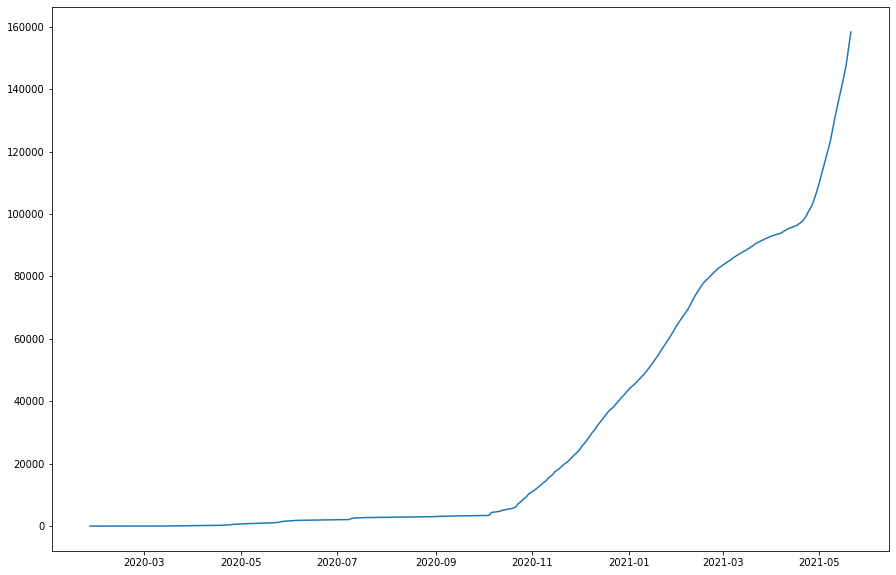

In [5012]:
plt.figure(figsize=(15,10))
plt.plot(Sri_data['Date'],Sri_data['Confirmed'])

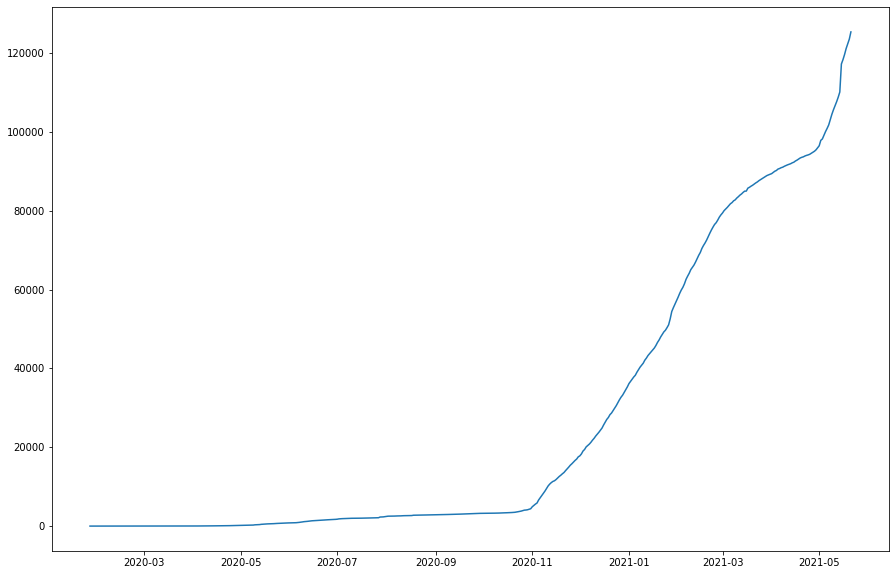

In [5013]:
plt.figure(figsize=(15,10))
plt.plot(Sri_data['Date'],Sri_data['Recovered'])

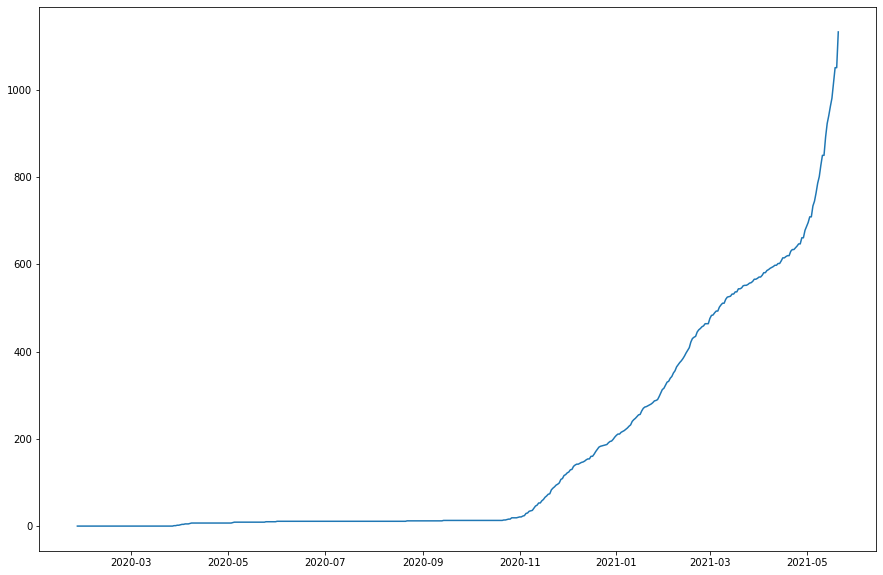

In [5014]:
plt.figure(figsize=(15,10))
plt.plot(Sri_data['Date'],Sri_data['Deaths'])

# Confirmed

In [5015]:
dates= Sri_data.Date.keys()
Sri_data['Date'] = np.array([i for i in range(len(dates))]).reshape(-1,1)

In [5016]:
sri_l=(len(Sri_data))-1
sri_t=(sri_l/100)*70

train = Sri_data[Sri_data.index <= sri_t]

test = Sri_data[Sri_data.index >= sri_t]

In [5017]:
x_train = train[["Date"]].values
 
y_train = train["Confirmed"].values

x_test = test[["Date"]].values

y_test = test["Confirmed"].values

In [5018]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5019]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

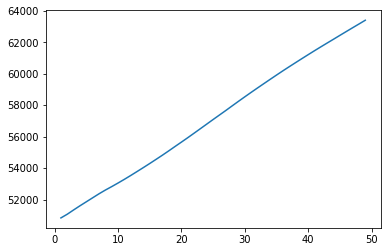

In [5020]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5021]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5022]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5023]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_sri_c=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_sri_c)

In [5024]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_sri_c=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_sri_c)

In [5025]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_sri_c = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_sri_c)

In [5026]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_sri_c=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_sri_c)

<BarContainer object of 4 artists>

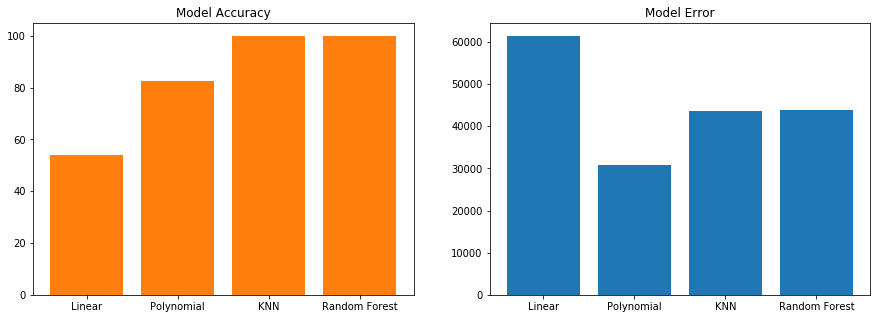

In [5027]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [5028]:
def sri_accuracy_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def sri_error_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[1] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig


child_sri3= html.Div([
   dbc.Row([html.H1('Sri Lanka')],style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     "margin": "0px 450px"               
                    }),
     dbc.Row([html.H3('Model evaluation of Confirmed Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                  
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_s1',figure=sri_accuracy_conf())),
                    dbc.Col(dcc.Graph(id='graph_s2',figure=sri_error_conf())),
                                             
                                            
                    
                    

                ],   
            ),
   

])



In [5029]:
predict_data_sri=[]
for i in range(1,31):
    sri_l=sri_l+1
    predict_data_sri.append(sri_l)
    

predict_data_sri=np.array(predict_data_sri).reshape(-1,1)

In [5030]:
x=Sri_data.loc[:,['Date']].values
y=Sri_data.loc[:,['Confirmed']].values

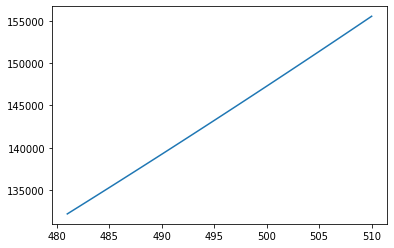

In [5031]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
reg=LinearRegression()
reg.fit(x_poly,y)
pred_sri_c=reg.predict(poly.fit_transform(predict_data_sri))

plt.plot(predict_data_sri,pred_sri_c)

In [5032]:
#Sri Lanka Logistic Prediction
x_train = train[["Date","Confirmed"]].values

y_train = train["Lockdown"].values

x_test = test[["Date","Confirmed"]].values

y_test = test["Lockdown"].values

log=LogisticRegression()
log.fit(x_train,y_train)
pred_sri_lo=log.predict(x_test)

log_accu_sri=(accuracy_score(y_test,pred_sri_lo)*100)

x=Sri_data.loc[:,['Date','Confirmed']].values
y=Sri_data.loc[:,['Lockdown']].values
y=y.flatten()

sri_predict_log = np.concatenate((predict_data_sri,pred_sri_c),axis=1)


log=LogisticRegression()
log.fit(x,y)
pred_sri_log=log.predict(sri_predict_log)
pred_sri_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [5033]:
log_accu_sri

53.79310344827586

# Recovered

In [5034]:
x_train = train[["Date"]].values
 
y_train = train["Recovered"].values

x_test = test[["Date"]].values

y_test = test["Recovered"].values

In [5035]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5036]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

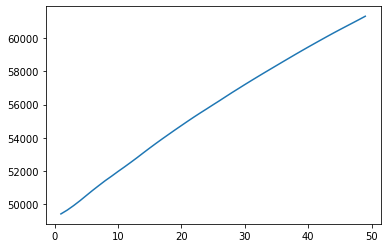

In [5037]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5038]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5039]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5040]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_sri_r=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_sri_r)

In [5041]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_sri_r=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_sri_r)

In [5042]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_sri_r = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_sri_r)

In [5043]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_sri_r=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_sri_r)

<BarContainer object of 4 artists>

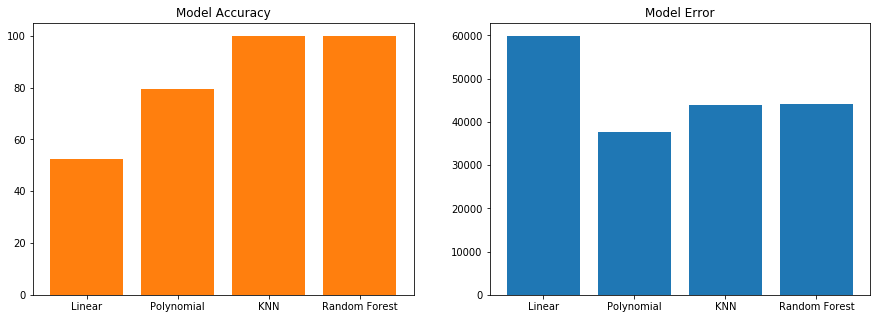

In [5044]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)

In [5045]:
def sri_accuracy_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def sri_error_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[1] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_sri4= html.Div([
   
     dbc.Row([html.H3('Model evaluation of Recovered Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                 
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_ss1',figure=sri_accuracy_rec())),
                    dbc.Col(dcc.Graph(id='graph_ss2',figure=sri_error_rec())),
                                             
                                            
                    
                    

                ],   
            ),
    
])




In [5046]:
x=Sri_data.loc[:,['Date']].values
y=Sri_data.loc[:,['Recovered']].values
y=y.flatten()  

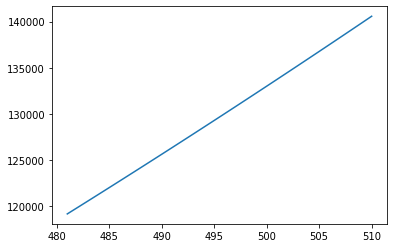

In [5047]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
reg=LinearRegression()
reg.fit(x_poly,y)
pred_sri_r=reg.predict(poly.fit_transform(predict_data_sri))

plt.plot(predict_data_sri,pred_sri_r)

# Death

In [5048]:
x_train = train[["Date"]].values
 
y_train = train["Deaths"].values

x_test = test[["Date"]].values

y_test = test["Deaths"].values

In [5049]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5050]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

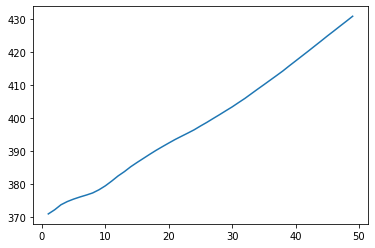

In [5051]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5052]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5053]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5054]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_sri_d=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_sri_d)


In [5055]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_sri_d=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_sri_d)

In [5056]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_sri_d = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_sri_d)

In [5057]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_sri_d=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_sri_d)

<BarContainer object of 4 artists>

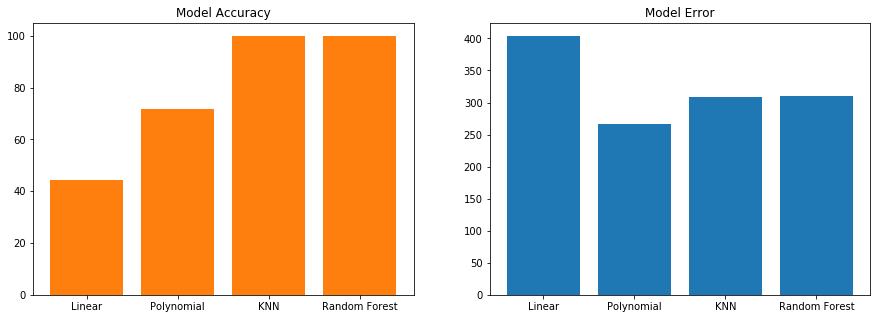

In [5058]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)

In [5059]:
def sri_accuracy_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def sri_error_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[2] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_sri5= html.Div([
  
     dbc.Row([html.H3('Model evaluation of Death Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                 
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_sss1',figure=sri_accuracy_d())),
                    dbc.Col(dcc.Graph(id='graph_sss2',figure=sri_error_d())),
                                             
                                            
                    
                    

                ],   
            ),
    
])


In [5060]:
x=Sri_data.loc[:,['Date']].values
y=Sri_data.loc[:,['Deaths']].values
y=y.flatten()

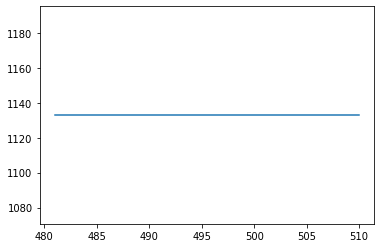

In [5061]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x,y)
pred_sri_d = knn.predict(predict_data_sri)

plt.plot(predict_data_sri,pred_sri_d)

## Sri lanka Webpage

In [5062]:
def graph_sri_c():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Sri_data_g['Date'], y=Sri_data['Daily_Cases'], name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
    title={
            'text': "Visualization of covid-19 confirmed cases",
            'y':0.9,
            'x':0.5,
            },
        
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

def graph_sri_r():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Sri_data_g['Date'], y=Sri_data['Daily_Recovered'], name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 recovered cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def graph_sri_d():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Sri_data_g['Date'], y=Sri_data['Daily_Deaths'], name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 death cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


In [5063]:
pred_sri_c=pred_sri_c.flatten()
def new_graph_sri_c():

    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_sri_c, name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
    title={
            'text': "Next 30 days prediction of confirmed cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def new_graph_sri_r():
    
  
    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_sri_r, name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Next 30 days prediction of recovered cases",
            'y':0.9,
            'x':0.5,
            },
    
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig
def new_graph_sri_d():
    
   
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_sri_d, name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Next 30 days prediction of death cases",
            'y':0.9,
            'x':0.5,
            },
    
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

### Graph output on the webpage

In [5064]:
child_sri1= html.Div([
    dbc.Row([html.H2('Sri Lanka')],
           style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     'margin': '0px 564px'             
                    }),
  
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_s1',figure=graph_sri_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_s2',figure=graph_sri_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_s3',figure=graph_sri_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
           

])

In [5065]:
#model graph
child_sri2= html.Div([
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_s1',figure=new_graph_sri_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_s2',figure=new_graph_sri_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_s3',figure=new_graph_sri_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
           

])

# MALDIVES

In [5066]:
#importing dataset
Mal_data_g = pd.read_csv("C:/Users/Muhammad Tousique/Final Year Project/Latest Data/Maldives.csv")
Mal_data = Mal_data_g

In [5067]:
#Calculating for New Positive Cases per day
confirmed=Mal_data["Confirmed"]
active_day=[0]*len(confirmed)
active_day[0]=confirmed[0]
for i in range(1,len(confirmed)):
    active_day[i]=confirmed[i]-confirmed[i-1]
new_cases= pd.DataFrame(data=active_day, index=None, columns=["Daily_Cases"])

In [5068]:
#Calculating for New Deaths Cases per day
deaths=Mal_data["Deaths"]
deaths_day=[0]*len(deaths)
deaths_day[0]=deaths[0]
for i in range(1,len(deaths)):
    deaths_day[i]=deaths[i]-deaths[i-1]
new_deaths= pd.DataFrame(data=deaths_day, index=None, columns=["Daily_Deaths"])

In [5069]:
#Calculating for New Recovered Cases per day
recovered=Mal_data["Recovered"]
recovered_day=[0]*len(recovered)
recovered_day[0]=recovered[0]
for i in range(1,len(recovered)):
    recovered_day[i]=recovered[i]-recovered[i-1]
new_recovered= pd.DataFrame(data=recovered_day, index=None, columns=["Daily_Recovered"])

In [5070]:
#concat new columns into dataframe
Mal_data = pd.concat([Mal_data,new_cases,new_deaths,new_recovered], axis=1)

In [5071]:
#changing string date column to date
Mal_data['Date'] = pd.to_datetime(Mal_data['Date'])
Mal_data.head()

,Country,Date,Confirmed,Recovered,Deaths,Active,Test_conducted,Lockdown,Daily_Cases,Daily_Deaths,Daily_Recovered
0,Maldives,2020-03-08,4,0,0,4,4,0,4,0,0
1,Maldives,2020-03-09,4,0,0,4,4,0,0,0,0
2,Maldives,2020-03-10,6,0,0,6,8,0,2,0,0
3,Maldives,2020-03-11,8,0,0,8,8,0,2,0,0
4,Maldives,2020-03-12,8,0,0,8,8,0,0,0,0


In [5072]:
#checking for null values in dataframe
variables = Mal_data.columns 
Mal_data.isnull().sum().loc[variables]

Country            0
Date               0
Confirmed          0
Recovered          0
Deaths             0
Active             0
Test_conducted     0
Lockdown           0
Daily_Cases        0
Daily_Deaths       0
Daily_Recovered    0
dtype: int64

In [5073]:
#mar 2020 Mal
mar_mal_20=Mal_data[Mal_data["Date"].between('2020-03-08','2020-03-31')]
mal_deaths=mar_mal_20['Daily_Deaths']
mal_cases=mar_mal_20['Daily_Cases']
mal_test=mar_mal_20['Test_conducted']
mal_recovered=mar_mal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_mal_20.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_mar_20_positive_rate=((sum_cases/sum_test)*100)
mal_mar_20_recover_rate=((sum_recover/sum_cases)*100)
mal_mar_20_death_rate=((sum_deaths/sum_cases)*100)



#april 2020 Mal
apr_mal_20=Mal_data[Mal_data["Date"].between('2020-04-01','2020-04-30')]
mal_deaths=apr_mal_20['Daily_Deaths']
mal_cases=apr_mal_20['Daily_Cases']
mal_test=apr_mal_20['Test_conducted']
mal_recovered=apr_mal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_mal_20.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_apr_20_positive_rate=((sum_cases/sum_test)*100)
mal_apr_20_recover_rate=((sum_recover/sum_cases)*100)
mal_apr_20_death_rate=((sum_deaths/sum_cases)*100)



#may 2020 Mal
may_mal_20=Mal_data[Mal_data["Date"].between('2020-05-01','2020-05-31')]
mal_deaths=may_mal_20['Daily_Deaths']
mal_cases=may_mal_20['Daily_Cases']
mal_test=may_mal_20['Test_conducted']
mal_recovered=may_mal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_mal_20.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_may_20_positive_rate=((sum_cases/sum_test)*100)
mal_may_20_recover_rate=((sum_recover/sum_cases)*100)
mal_may_20_death_rate=((sum_deaths/sum_cases)*100)


#june 2020 Mal
jun_mal_20=Mal_data[Mal_data["Date"].between('2020-06-01','2020-06-30')]
mal_deaths=jun_mal_20['Daily_Deaths']
mal_cases=jun_mal_20['Daily_Cases']
mal_test=jun_mal_20['Test_conducted']
mal_recovered=jun_mal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jun_mal_20.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_jun_20_positive_rate=((sum_cases/sum_test)*100)
mal_jun_20_recover_rate=((sum_recover/sum_cases)*100)
mal_jun_20_death_rate=((sum_deaths/sum_cases)*100)

#july 2020 Mal
july_mal_20=Mal_data[Mal_data["Date"].between('2020-07-01','2020-07-31')]
mal_deaths=july_mal_20['Daily_Deaths']
mal_cases=july_mal_20['Daily_Cases']
mal_test=july_mal_20['Test_conducted']
mal_recovered=july_mal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in july_mal_20.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_july_20_positive_rate=((sum_cases/sum_test)*100)
mal_july_20_recover_rate=((sum_recover/sum_cases)*100)
mal_july_20_death_rate=((sum_deaths/sum_cases)*100)

#August 2020 Mal
aug_mal_20=Mal_data[Mal_data["Date"].between('2020-08-01','2020-08-31')]
mal_deaths=aug_mal_20['Daily_Deaths']
mal_cases=aug_mal_20['Daily_Cases']
mal_test=aug_mal_20['Test_conducted']
mal_recovered=aug_mal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in aug_mal_20.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_aug_20_positive_rate=((sum_cases/sum_test)*100)
mal_aug_20_recover_rate=((sum_recover/sum_cases)*100)
mal_aug_20_death_rate=((sum_deaths/sum_cases)*100)

#September 2020 Mal
sep_mal_20=Mal_data[Mal_data["Date"].between('2020-09-01','2020-09-30')]
mal_deaths=sep_mal_20['Daily_Deaths']
mal_cases=sep_mal_20['Daily_Cases']
mal_test=sep_mal_20['Test_conducted']
mal_recovered=sep_mal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in sep_mal_20.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_sep_20_positive_rate=((sum_cases/sum_test)*100)
mal_sep_20_recover_rate=((sum_recover/sum_cases)*100)
mal_sep_20_death_rate=((sum_deaths/sum_cases)*100)

#October 2020 Mal
oct_mal_20=Mal_data[Mal_data["Date"].between('2020-10-01','2020-10-31')]
mal_deaths=oct_mal_20['Daily_Deaths']
mal_cases=oct_mal_20['Daily_Cases']
mal_test=oct_mal_20['Test_conducted']
mal_recovered=oct_mal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in oct_mal_20.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_oct_20_positive_rate=((sum_cases/sum_test)*100)
mal_oct_20_recover_rate=((sum_recover/sum_cases)*100)
mal_oct_20_death_rate=((sum_deaths/sum_cases)*100)


#November 2020 Mal
nov_mal_20=Mal_data[Mal_data["Date"].between('2020-11-01','2020-11-30')]
mal_deaths=nov_mal_20['Daily_Deaths']
mal_cases=nov_mal_20['Daily_Cases']
mal_test=nov_mal_20['Test_conducted']
mal_recovered=nov_mal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in nov_mal_20.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_nov_20_positive_rate=((sum_cases/sum_test)*100)
mal_nov_20_recover_rate=((sum_recover/sum_cases)*100)
mal_nov_20_death_rate=((sum_deaths/sum_cases)*100)


#December 2020 Mal
dec_mal_20=Mal_data[Mal_data["Date"].between('2020-12-01','2020-12-31')]
mal_deaths=dec_mal_20['Daily_Deaths']
mal_cases=dec_mal_20['Daily_Cases']
mal_test=dec_mal_20['Test_conducted']
mal_recovered=dec_mal_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in dec_mal_20.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_dec_20_positive_rate=((sum_cases/sum_test)*100)
mal_dec_20_recover_rate=((sum_recover/sum_cases)*100)
mal_dec_20_death_rate=((sum_deaths/sum_cases)*100)


#January 2021 Mal
jan_mal_21=Mal_data[Mal_data["Date"].between('2021-01-01','2021-01-31')]
mal_deaths=jan_mal_21['Daily_Deaths']
mal_cases=jan_mal_21['Daily_Cases']
mal_test=jan_mal_21['Test_conducted']
mal_recovered=jan_mal_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jan_mal_21.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_jan_21_positive_rate=((sum_cases/sum_test)*100)
mal_jan_21_recover_rate=((sum_recover/sum_cases)*100)
mal_jan_21_death_rate=((sum_deaths/sum_cases)*100)

#February 2021 Mal
feb_mal_21=Mal_data[Mal_data["Date"].between('2021-02-01','2021-02-28')]
mal_deaths=feb_mal_21['Daily_Deaths']
mal_cases=feb_mal_21['Daily_Cases']
mal_test=feb_mal_21['Test_conducted']
mal_recovered=feb_mal_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in feb_mal_21.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_feb_21_positive_rate=((sum_cases/sum_test)*100)
mal_feb_21_recover_rate=((sum_recover/sum_cases)*100)
mal_feb_21_death_rate=((sum_deaths/sum_cases)*100)

#March 2021 Mal
mar_mal_21=Mal_data[Mal_data["Date"].between('2021-03-01','2021-03-31')]
mal_deaths=mar_mal_21['Daily_Deaths']
mal_cases=mar_mal_21['Daily_Cases']
mal_test=mar_mal_21['Test_conducted']
mal_recovered=mar_mal_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_mal_21.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_mar_21_positive_rate=((sum_cases/sum_test)*100)
mal_mar_21_recover_rate=((sum_recover/sum_cases)*100)
mal_mar_21_death_rate=((sum_deaths/sum_cases)*100)

#April 2021 Mal
apr_mal_21=Mal_data[Mal_data["Date"].between('2021-04-01','2021-04-30')]
mal_deaths=apr_mal_21['Daily_Deaths']
mal_cases=apr_mal_21['Daily_Cases']
mal_test=apr_mal_21['Test_conducted']
mal_recovered=apr_mal_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_mal_21.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_apr_21_positive_rate=((sum_cases/sum_test)*100)
mal_apr_21_recover_rate=((sum_recover/sum_cases)*100)
mal_apr_21_death_rate=((sum_deaths/sum_cases)*100)

#May 2021 Mal
may_mal_21=Mal_data[Mal_data["Date"].between('2021-05-01','2021-05-21')]
mal_deaths=may_mal_21['Daily_Deaths']
mal_cases=may_mal_21['Daily_Cases']
mal_test=may_mal_21['Test_conducted']
mal_recovered=may_mal_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_mal_21.index:
    sum_deaths=sum_deaths+mal_deaths[ind]
    sum_cases=sum_cases+mal_cases[ind]
    sum_test=sum_test+mal_test[ind]
    sum_recover=sum_recover+mal_recovered[ind]
    

mal_may_21_positive_rate=((sum_cases/sum_test)*100)
mal_may_21_recover_rate=((sum_recover/sum_cases)*100)
mal_may_21_death_rate=((sum_deaths/sum_cases)*100)

In [5074]:
months = ['Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
positive = [mal_mar_20_positive_rate,mal_apr_20_positive_rate,mal_may_20_positive_rate,mal_jun_20_positive_rate,mal_july_20_positive_rate,mal_aug_20_positive_rate,mal_sep_20_positive_rate,mal_oct_20_positive_rate,mal_nov_20_positive_rate,mal_dec_20_positive_rate,mal_jan_21_positive_rate,mal_feb_21_positive_rate,mal_mar_21_positive_rate,mal_apr_21_positive_rate,mal_may_21_positive_rate,]

In [5075]:
months = ['Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
recover = [mal_mar_20_recover_rate,mal_apr_20_recover_rate,mal_may_20_recover_rate,mal_jun_20_recover_rate,mal_july_20_recover_rate,mal_aug_20_recover_rate,mal_sep_20_recover_rate,mal_oct_20_recover_rate,mal_nov_20_recover_rate,mal_dec_20_recover_rate,mal_jan_21_recover_rate,mal_feb_21_recover_rate,mal_mar_21_recover_rate,mal_apr_21_recover_rate,mal_may_21_recover_rate,]

In [5076]:
months = ['Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
death = [mal_mar_20_death_rate,mal_apr_20_death_rate,mal_may_20_death_rate,mal_jun_20_death_rate,mal_july_20_death_rate,mal_aug_20_death_rate,mal_sep_20_death_rate,mal_oct_20_death_rate,mal_nov_20_death_rate,mal_dec_20_death_rate,mal_jan_21_death_rate,mal_feb_21_death_rate,mal_mar_21_death_rate,mal_apr_21_death_rate,mal_may_21_death_rate,]

In [5077]:
def mal_ratio_bar_p():
    x = months
    y = positive


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Positivity Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def mal_ratio_bar_r():
    x = months
    y = recover


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='lightslategray', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Recovery Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def mal_ratio_bar_d():
    x = months
    y = death


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='crimson', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Death Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_mal6= html.Div([
   
     
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_mmmm1',figure=mal_ratio_bar_p())),
                    dbc.Col(dcc.Graph(id='graph_mmmm1',figure=mal_ratio_bar_d())),
                    dbc.Col(dcc.Graph(id='graph_mmm1',figure=mal_ratio_bar_r())),
                ],   
            ),
    
     

])

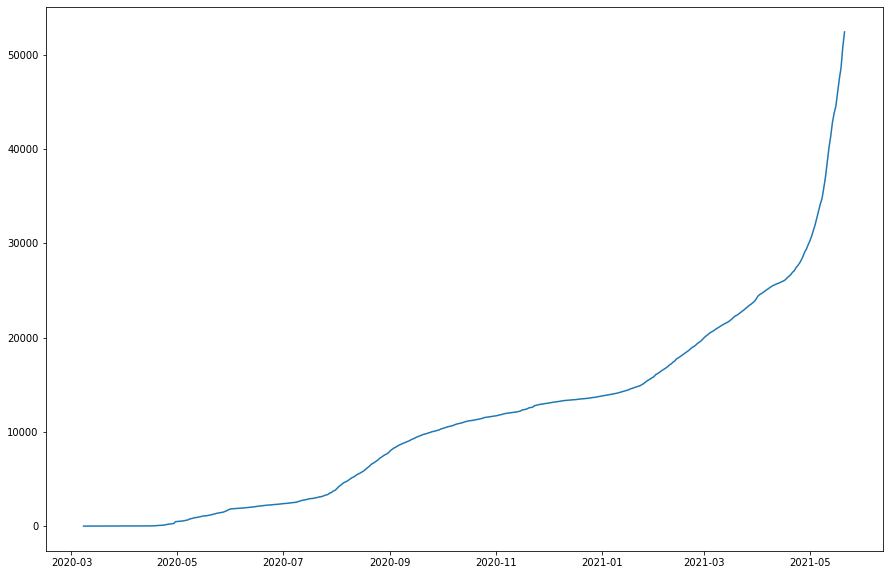

In [5078]:
plt.figure(figsize=(15,10))
plt.plot(Mal_data['Date'],Mal_data['Confirmed'])

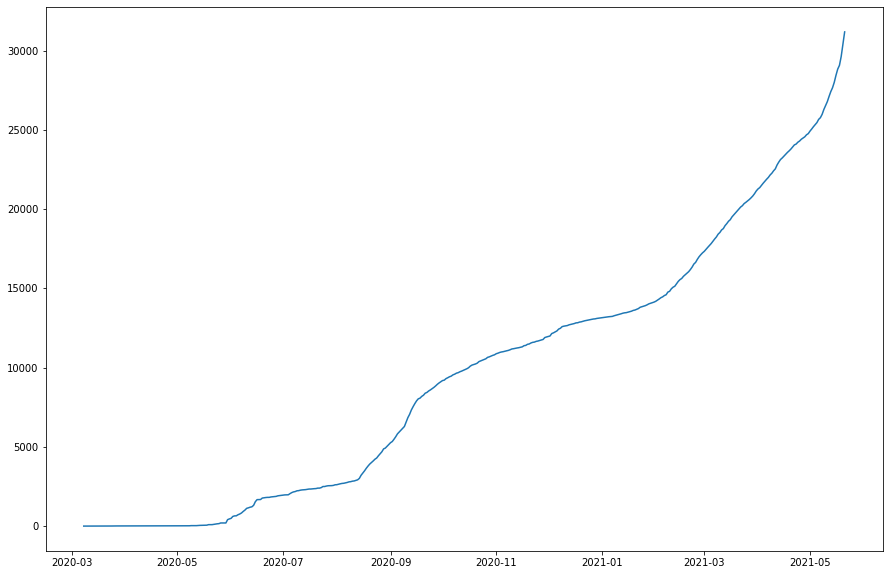

In [5079]:
plt.figure(figsize=(15,10))
plt.plot(Mal_data['Date'],Mal_data['Recovered'])

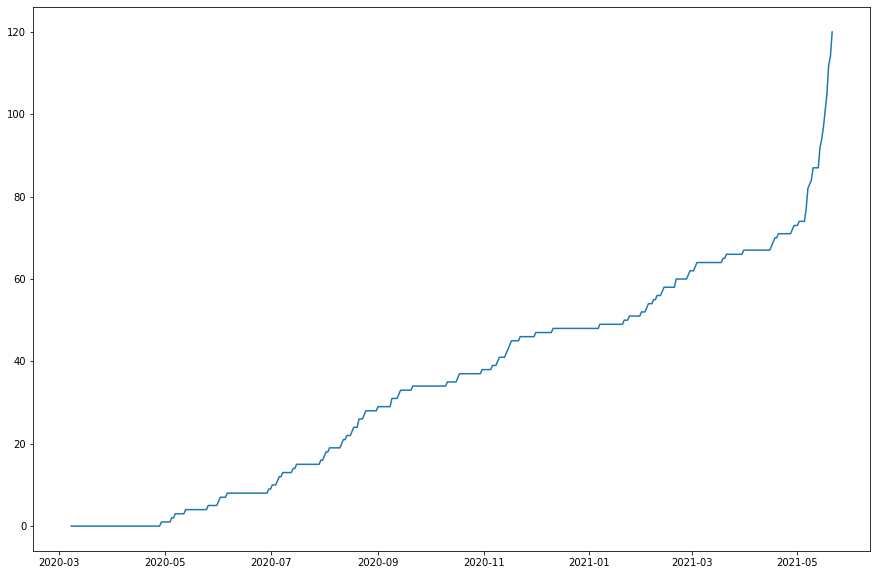

In [5080]:
plt.figure(figsize=(15,10))
plt.plot(Mal_data['Date'],Mal_data['Deaths'])

# Confirmed

In [5081]:
dates= Mal_data.Date.keys()
Mal_data['Date'] = np.array([i for i in range(len(dates))]).reshape(-1,1)

In [5082]:
mal_l=(len(Mal_data))-1
mal_t=(mal_l/100)*70

train = Mal_data[Mal_data.index <= mal_t]

test = Mal_data[Mal_data.index > mal_t]

In [5083]:
x_train = train[["Date"]].values
 
y_train = train["Confirmed"].values

x_test = test[["Date"]].values

y_test = test["Confirmed"].values

In [5084]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5085]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

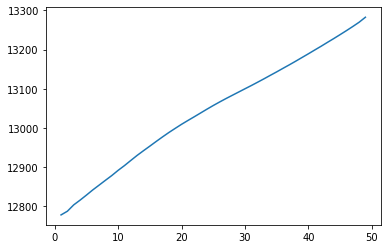

In [5086]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5087]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5088]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5089]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_mal_c=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_mal_c)

In [5090]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_mal_c=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_mal_c)

In [5091]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_mal_c = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_mal_c)

In [5092]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_mal_c=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_mal_c)

<BarContainer object of 4 artists>

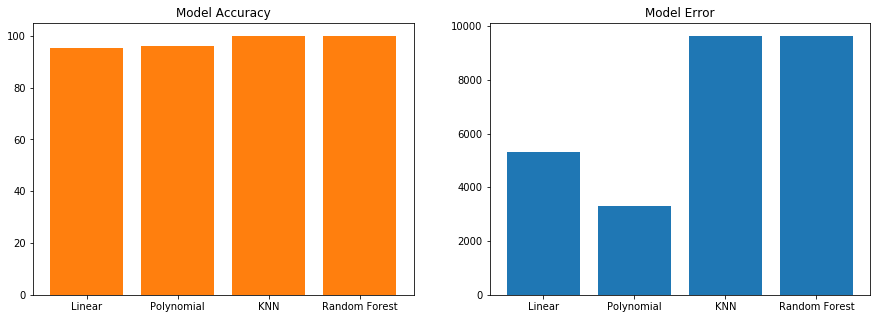

In [5093]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [5094]:
def mal_accuracy_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def mal_error_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[1] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_mal3= html.Div([
   dbc.Row([html.H1('Maldives')],style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     "margin": "0px 564px"                  
                    }),
     dbc.Row([html.H3('Model evaluation of Confirmed Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                 
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_m1',figure=mal_accuracy_conf())),
                    dbc.Col(dcc.Graph(id='graph_m2',figure=mal_error_conf())),
                                             
                                            
                    
                    

                ],   
            ),
   

])


In [5095]:
predict_data_mal=[]
for i in range(1,31):
    mal_l=mal_l+1
    predict_data_mal.append(mal_l)
    
predict_data_mal=np.array(predict_data_mal).reshape(-1,1)

In [5096]:
x=Mal_data.loc[:,['Date']].values
y=Mal_data.loc[:,['Confirmed']].values


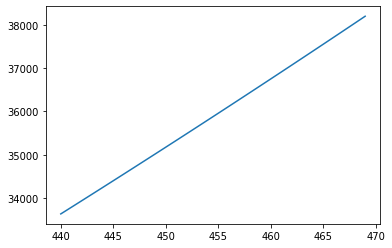

In [5097]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
reg=LinearRegression()
reg.fit(x_poly,y)
pred_mal_c=reg.predict(poly.fit_transform(predict_data_mal))

plt.plot(predict_data_mal,pred_mal_c)

In [5098]:
#Maldives Logistic Prediction
x_train = train[["Date","Confirmed"]].values

y_train = train["Lockdown"].values

x_test = test[["Date","Confirmed"]].values

y_test = test["Lockdown"].values

log=LogisticRegression()
log.fit(x_train,y_train)
pred_mal_lo=log.predict(x_test)

log_accu_mal=(accuracy_score(y_test,pred_mal_lo)*100)

x=Mal_data.loc[:,['Date','Confirmed']].values
y=Mal_data.loc[:,['Lockdown']].values
y=y.flatten()

mal_predict_log = np.concatenate((predict_data_mal,pred_mal_c),axis=1)


log=LogisticRegression()
log.fit(x,y)
pred_mal_log=log.predict(mal_predict_log)
pred_mal_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [5099]:
log_accu_mal

90.9090909090909

# Recovered

In [5100]:
x_train = train[["Date"]].values
 
y_train = train["Recovered"].values

x_test = test[["Date"]].values

y_test = test["Recovered"].values

In [5101]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5102]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

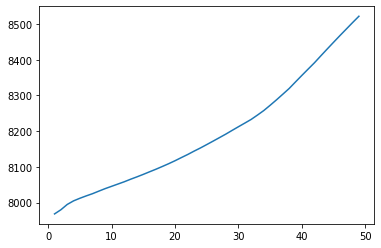

In [5103]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5104]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5105]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5106]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_mal_r=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_mal_r)

In [5107]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_mal_r=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_mal_r)

In [5108]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_mal_r = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_mal_r)

In [5109]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_mal_r=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_mal_r)

<BarContainer object of 4 artists>

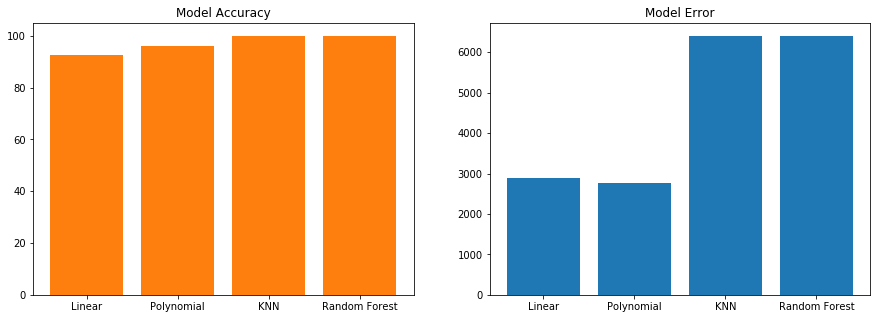

In [5110]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)

In [5111]:
def mal_accuracy_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def mal_error_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[1] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_mal4= html.Div([
   
     dbc.Row([html.H3('Model evaluation of Recovered Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                 
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_mm1',figure=mal_accuracy_rec())),
                    dbc.Col(dcc.Graph(id='graph_mm2',figure=mal_error_rec())),
                                             
                                            
                    
                    

                ],   
            ),
    
])



In [5112]:
x=Mal_data.loc[:,['Date']].values
y=Mal_data.loc[:,['Recovered']].values
y=y.flatten()

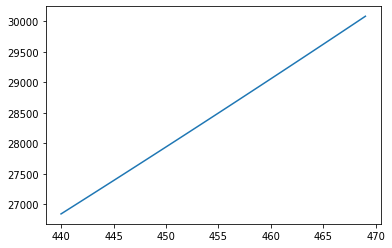

In [5113]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
reg=LinearRegression()
reg.fit(x_poly,y)
pred_mal_r=reg.predict(poly.fit_transform(predict_data_mal))

plt.plot(predict_data_mal,pred_mal_r)

# Death

In [5114]:
x_train = train[["Date"]].values
 
y_train = train["Deaths"].values

x_test = test[["Date"]].values

y_test = test["Deaths"].values

In [5115]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5116]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

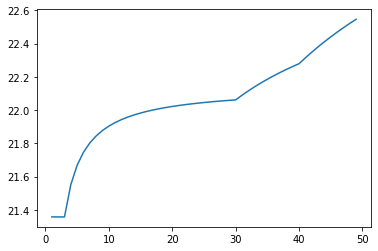

In [5117]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5118]:
model_skfold=KNeighborsRegressor(n_neighbors=8)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5119]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5120]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_mal_d=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_mal_d)

In [5121]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_mal_d=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_mal_d)

In [5122]:
knn= KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train,y_train)
knn_pred_mal_d = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_mal_d)

In [5123]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_mal_d=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_mal_d)

<BarContainer object of 4 artists>

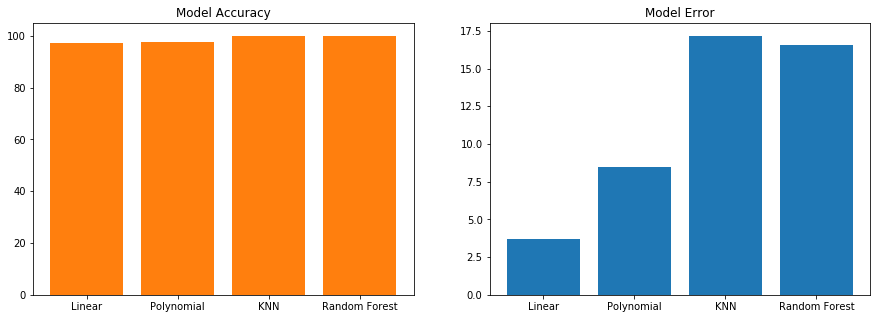

In [5124]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [5125]:
def mal_accuracy_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def mal_error_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[0] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_mal5= html.Div([
  
     dbc.Row([html.H3('Model evaluation of Death Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                 
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_mmm1',figure=mal_accuracy_d())),
                    dbc.Col(dcc.Graph(id='graph_mmm2',figure=mal_error_d())),
                                             
                                            
                    
                    

                ],   
            ),
    
])



In [5126]:
x=Mal_data.loc[:,['Date']].values
y=Mal_data.loc[:,['Deaths']].values
y=y.flatten()

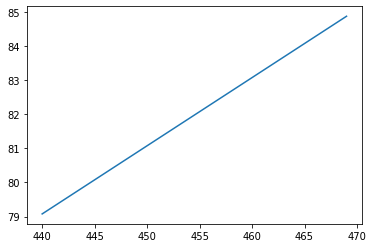

In [5127]:
regressor=LinearRegression()
regressor.fit(x,y)
pred_mal_d=regressor.predict(predict_data_mal)

plt.plot(predict_data_mal,pred_mal_d)

## Maldives Webpage

In [5128]:
def graph_mal_c():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Mal_data_g['Date'], y=Mal_data['Daily_Cases'], name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 confirmed cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

def graph_mal_r():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Mal_data_g['Date'], y=Mal_data['Daily_Recovered'], name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 recovered cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def graph_mal_d():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Mal_data_g['Date'], y=Mal_data['Daily_Deaths'], name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 death cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


In [5129]:
pred_mal_c=pred_mal_c.flatten()
def new_graph_mal_c():

    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_mal_c, name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
     title={
            'text': "Next 30 days prediction of confirmed cases'",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def new_graph_mal_r():
    
  
    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_mal_r, name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
     title={
            'text': "Next 30 days prediction of recovered cases'",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig
def new_graph_mal_d():
    
   
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_mal_d, name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
     title={
            'text': "Next 30 days prediction of death cases'",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

### Graph output on the webpage

In [5130]:
child_mal1= html.Div([
    dbc.Row([html.H2('Maldives')],
           style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     'margin': '0px 564px'             
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_m1',figure=graph_mal_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_m2',figure=graph_mal_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_m3',figure=graph_mal_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
           

])

In [5131]:
#model graph
child_mal2= html.Div([
  
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_m1',figure=new_graph_mal_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_m2',figure=new_graph_mal_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_m3',figure=new_graph_mal_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
           

])

# BHUTAN

In [5132]:
#importing dataframe
Bhu_data_g =pd.read_csv("C:/Users/Muhammad Tousique/Final Year Project/Latest Data/Bhutan.csv")
Bhu_data = Bhu_data_g

In [5133]:
#Calculating for New Positive Cases per day
confirmed=Bhu_data["Confirmed"]
active_day=[0]*len(confirmed)
active_day[0]=confirmed[0]
for i in range(1,len(confirmed)):
    active_day[i]=confirmed[i]-confirmed[i-1]
new_cases= pd.DataFrame(data=active_day, index=None, columns=["Daily_Cases"])

In [5134]:
#Calculating for New Deaths Cases per day
deaths=Bhu_data["Deaths"]
deaths_day=[0]*len(deaths)
deaths_day[0]=deaths[0]
for i in range(1,len(deaths)):
    deaths_day[i]=deaths[i]-deaths[i-1]
new_deaths= pd.DataFrame(data=deaths_day, index=None, columns=["Daily_Deaths"])

In [5135]:
#Calculating for New Recovered Cases per day
recovered=Bhu_data["Recovered"]
recovered_day=[0]*len(recovered)
recovered_day[0]=recovered[0]
for i in range(1,len(recovered)):
    recovered_day[i]=recovered[i]-recovered[i-1]
new_recovered= pd.DataFrame(data=recovered_day, index=None, columns=["Daily_Recovered"])

In [5136]:
#Concat new columns into dataframe
Bhu_data = pd.concat([Bhu_data,new_cases,new_deaths,new_recovered], axis=1)

In [5137]:
#convering string date column into date
Bhu_data['Date'] = pd.to_datetime(Bhu_data['Date'])
Bhu_data.head()


,Country,Date,Confirmed,Recovered,Deaths,Active,Test_conducted,Lockdown,Daily_Cases,Daily_Deaths,Daily_Recovered
0,Bhutan,2020-03-06,1,0,0,1,1,0,1,0,0
1,Bhutan,2020-03-07,1,0,0,1,1,0,0,0,0
2,Bhutan,2020-03-08,1,0,0,1,1,0,0,0,0
3,Bhutan,2020-03-09,1,0,0,1,1,0,0,0,0
4,Bhutan,2020-03-10,1,0,0,1,1,0,0,0,0


In [5138]:
#checking null values in dataframe
variables = Bhu_data.columns 
Bhu_data.isnull().sum().loc[variables]

Country            0
Date               0
Confirmed          0
Recovered          0
Deaths             0
Active             0
Test_conducted     0
Lockdown           0
Daily_Cases        0
Daily_Deaths       0
Daily_Recovered    0
dtype: int64

In [5139]:
#mar 2020 Bhu
mar_bhu_20=Bhu_data[Bhu_data["Date"].between('2020-03-06','2020-03-31')]
bhu_deaths=mar_bhu_20['Daily_Deaths']
bhu_cases=mar_bhu_20['Daily_Cases']
bhu_test=mar_bhu_20['Test_conducted']
bhu_recovered=mar_bhu_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_bhu_20.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_mar_20_positive_rate=((sum_cases/sum_test)*100)
bhu_mar_20_recover_rate=((sum_recover/sum_cases)*100)
bhu_mar_20_death_rate=((sum_deaths/sum_cases)*100)



#april 2020 Bhu
apr_bhu_20=Bhu_data[Bhu_data["Date"].between('2020-04-01','2020-04-30')]
bhu_deaths=apr_bhu_20['Daily_Deaths']
bhu_cases=apr_bhu_20['Daily_Cases']
bhu_test=apr_bhu_20['Test_conducted']
bhu_recovered=apr_bhu_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_bhu_20.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_apr_20_positive_rate=((sum_cases/sum_test)*100)
bhu_apr_20_recover_rate=((sum_recover/sum_cases)*100)
bhu_apr_20_death_rate=((sum_deaths/sum_cases)*100)



#may 2020 Bhu
may_bhu_20=Bhu_data[Bhu_data["Date"].between('2020-05-01','2020-05-31')]
bhu_deaths=may_bhu_20['Daily_Deaths']
bhu_cases=may_bhu_20['Daily_Cases']
bhu_test=may_bhu_20['Test_conducted']
bhu_recovered=may_bhu_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_bhu_20.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_may_20_positive_rate=((sum_cases/sum_test)*100)
bhu_may_20_recover_rate=((sum_recover/sum_cases)*100)
bhu_may_20_death_rate=((sum_deaths/sum_cases)*100)


#june 2020 Bhu
jun_bhu_20=Bhu_data[Bhu_data["Date"].between('2020-06-01','2020-06-30')]
bhu_deaths=jun_bhu_20['Daily_Deaths']
bhu_cases=jun_bhu_20['Daily_Cases']
bhu_test=jun_bhu_20['Test_conducted']
bhu_recovered=jun_bhu_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jun_bhu_20.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_jun_20_positive_rate=((sum_cases/sum_test)*100)
bhu_jun_20_recover_rate=((sum_recover/sum_cases)*100)
bhu_jun_20_death_rate=((sum_deaths/sum_cases)*100)

#july 2020 Bhu
july_bhu_20=Bhu_data[Bhu_data["Date"].between('2020-07-01','2020-07-31')]
bhu_deaths=july_bhu_20['Daily_Deaths']
bhu_cases=july_bhu_20['Daily_Cases']
bhu_test=july_bhu_20['Test_conducted']
bhu_recovered=july_bhu_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in july_bhu_20.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_july_20_positive_rate=((sum_cases/sum_test)*100)
bhu_july_20_recover_rate=((sum_recover/sum_cases)*100)
bhu_july_20_death_rate=((sum_deaths/sum_cases)*100)

#August 2020 Bhu
aug_bhu_20=Bhu_data[Bhu_data["Date"].between('2020-08-01','2020-08-31')]
bhu_deaths=aug_bhu_20['Daily_Deaths']
bhu_cases=aug_bhu_20['Daily_Cases']
bhu_test=aug_bhu_20['Test_conducted']
bhu_recovered=aug_bhu_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in aug_bhu_20.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_aug_20_positive_rate=((sum_cases/sum_test)*100)
bhu_aug_20_recover_rate=((sum_recover/sum_cases)*100)
bhu_aug_20_death_rate=((sum_deaths/sum_cases)*100)

#September 2020 Bhu
sep_bhu_20=Bhu_data[Bhu_data["Date"].between('2020-09-01','2020-09-30')]
bhu_deaths=sep_bhu_20['Daily_Deaths']
bhu_cases=sep_bhu_20['Daily_Cases']
bhu_test=sep_bhu_20['Test_conducted']
bhu_recovered=sep_bhu_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in sep_bhu_20.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_sep_20_positive_rate=((sum_cases/sum_test)*100)
bhu_sep_20_recover_rate=((sum_recover/sum_cases)*100)
bhu_sep_20_death_rate=((sum_deaths/sum_cases)*100)

#October 2020 Bhu
oct_bhu_20=Bhu_data[Bhu_data["Date"].between('2020-10-01','2020-10-31')]
bhu_deaths=oct_bhu_20['Daily_Deaths']
bhu_cases=oct_bhu_20['Daily_Cases']
bhu_test=oct_bhu_20['Test_conducted']
bhu_recovered=oct_bhu_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in oct_bhu_20.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_oct_20_positive_rate=((sum_cases/sum_test)*100)
bhu_oct_20_recover_rate=((sum_recover/sum_cases)*100)
bhu_oct_20_death_rate=((sum_deaths/sum_cases)*100)


#November 2020 Bhu
nov_bhu_20=Bhu_data[Bhu_data["Date"].between('2020-11-01','2020-11-30')]
bhu_deaths=nov_bhu_20['Daily_Deaths']
bhu_cases=nov_bhu_20['Daily_Cases']
bhu_test=nov_bhu_20['Test_conducted']
bhu_recovered=nov_bhu_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in nov_bhu_20.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_nov_20_positive_rate=((sum_cases/sum_test)*100)
bhu_nov_20_recover_rate=((sum_recover/sum_cases)*100)
bhu_nov_20_death_rate=((sum_deaths/sum_cases)*100)


#December 2020 Bhu
dec_bhu_20=Bhu_data[Bhu_data["Date"].between('2020-12-01','2020-12-31')]
bhu_deaths=dec_bhu_20['Daily_Deaths']
bhu_cases=dec_bhu_20['Daily_Cases']
bhu_test=dec_bhu_20['Test_conducted']
bhu_recovered=dec_bhu_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in dec_bhu_20.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_dec_20_positive_rate=((sum_cases/sum_test)*100)
bhu_dec_20_recover_rate=((sum_recover/sum_cases)*100)
bhu_dec_20_death_rate=((sum_deaths/sum_cases)*100)


#January 2021 Bhu
jan_bhu_21=Bhu_data[Bhu_data["Date"].between('2021-01-01','2021-01-31')]
bhu_deaths=jan_bhu_21['Daily_Deaths']
bhu_cases=jan_bhu_21['Daily_Cases']
bhu_test=jan_bhu_21['Test_conducted']
bhu_recovered=jan_bhu_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jan_bhu_21.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_jan_21_positive_rate=((sum_cases/sum_test)*100)
bhu_jan_21_recover_rate=((sum_recover/sum_cases)*100)
bhu_jan_21_death_rate=((sum_deaths/sum_cases)*100)

#February 2021 Bhu
feb_bhu_21=Bhu_data[Bhu_data["Date"].between('2021-02-01','2021-02-28')]
bhu_deaths=feb_bhu_21['Daily_Deaths']
bhu_cases=feb_bhu_21['Daily_Cases']
bhu_test=feb_bhu_21['Test_conducted']
bhu_recovered=feb_bhu_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in feb_bhu_21.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_feb_21_positive_rate=((sum_cases/sum_test)*100)
bhu_feb_21_recover_rate=((sum_recover/sum_cases)*100)
bhu_feb_21_death_rate=((sum_deaths/sum_cases)*100)

#March 2021 Bhu
mar_bhu_21=Bhu_data[Bhu_data["Date"].between('2021-03-01','2021-03-31')]
bhu_deaths=mar_bhu_21['Daily_Deaths']
bhu_cases=mar_bhu_21['Daily_Cases']
bhu_test=mar_bhu_21['Test_conducted']
bhu_recovered=mar_bhu_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_bhu_21.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_mar_21_positive_rate=((sum_cases/sum_test)*100)
bhu_mar_21_recover_rate=((sum_recover/sum_cases)*100)
bhu_mar_21_death_rate=((sum_deaths/sum_cases)*100)

#April 2021 Bhu
apr_bhu_21=Bhu_data[Bhu_data["Date"].between('2021-04-01','2021-04-30')]
bhu_deaths=apr_bhu_21['Daily_Deaths']
bhu_cases=apr_bhu_21['Daily_Cases']
bhu_test=apr_bhu_21['Test_conducted']
bhu_recovered=apr_bhu_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_bhu_21.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_apr_21_positive_rate=((sum_cases/sum_test)*100)
bhu_apr_21_recover_rate=((sum_recover/sum_cases)*100)
bhu_apr_21_death_rate=((sum_deaths/sum_cases)*100)

#May 2021 Bhu
may_bhu_21=Bhu_data[Bhu_data["Date"].between('2021-05-01','2021-05-21')]
bhu_deaths=may_bhu_21['Daily_Deaths']
bhu_cases=may_bhu_21['Daily_Cases']
bhu_test=may_bhu_21['Test_conducted']
bhu_recovered=may_bhu_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_bhu_21.index:
    sum_deaths=sum_deaths+bhu_deaths[ind]
    sum_cases=sum_cases+bhu_cases[ind]
    sum_test=sum_test+bhu_test[ind]
    sum_recover=sum_recover+bhu_recovered[ind]
    

bhu_may_21_positive_rate=((sum_cases/sum_test)*100)
bhu_may_21_recover_rate=((sum_recover/sum_cases)*100)
bhu_may_21_death_rate=((sum_deaths/sum_cases)*100)

In [5140]:
months = ['Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
positive = [bhu_mar_20_positive_rate,bhu_apr_20_positive_rate,bhu_may_20_positive_rate,bhu_jun_20_positive_rate,bhu_july_20_positive_rate,bhu_aug_20_positive_rate,bhu_sep_20_positive_rate,bhu_oct_20_positive_rate,bhu_nov_20_positive_rate,bhu_dec_20_positive_rate,bhu_jan_21_positive_rate,bhu_feb_21_positive_rate,bhu_mar_21_positive_rate,bhu_apr_21_positive_rate,bhu_may_21_positive_rate,]

In [5141]:
months = ['Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
recover = [bhu_mar_20_recover_rate,bhu_apr_20_recover_rate,bhu_may_20_recover_rate,bhu_jun_20_recover_rate,bhu_july_20_recover_rate,bhu_aug_20_recover_rate,bhu_sep_20_recover_rate,bhu_oct_20_recover_rate,bhu_nov_20_recover_rate,bhu_dec_20_recover_rate,bhu_jan_21_recover_rate,bhu_feb_21_recover_rate,bhu_mar_21_recover_rate,bhu_apr_21_recover_rate,bhu_may_21_recover_rate,]

In [5142]:
months = ['Mar 20','Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
death = [bhu_mar_20_death_rate,bhu_apr_20_death_rate,bhu_may_20_death_rate,bhu_jun_20_death_rate,bhu_july_20_death_rate,bhu_aug_20_death_rate,bhu_sep_20_death_rate,bhu_oct_20_death_rate,bhu_nov_20_death_rate,bhu_dec_20_death_rate,bhu_jan_21_death_rate,bhu_feb_21_death_rate,bhu_mar_21_death_rate,bhu_apr_21_death_rate,bhu_may_21_death_rate,]

In [5143]:
def bhu_ratio_bar_p():
    x = months
    y = positive


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Positivity Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def bhu_ratio_bar_r():
    x = months
    y = recover


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='lightslategray', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Recovery Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def bhu_ratio_bar_d():
    x = months
    y = death


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='crimson', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Death Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_bhu6= html.Div([
   
     
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_bbbb1',figure=bhu_ratio_bar_p())),
                    dbc.Col(dcc.Graph(id='graph_bbbb1',figure=bhu_ratio_bar_d())),
                    dbc.Col(dcc.Graph(id='graph_bbbb1',figure=bhu_ratio_bar_r())),
                ],   
            ),
    
     

])

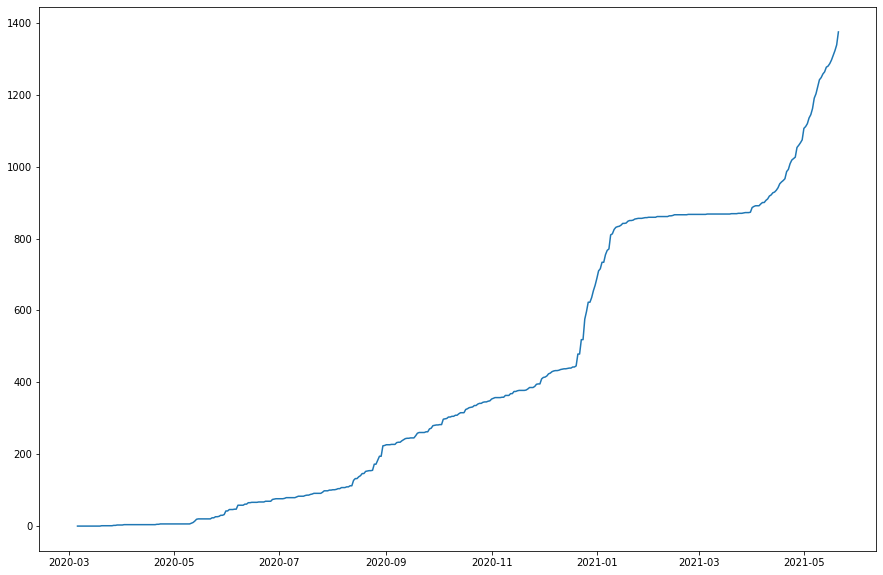

In [5144]:
plt.figure(figsize=(15,10))
plt.plot(Bhu_data['Date'],Bhu_data['Confirmed'])

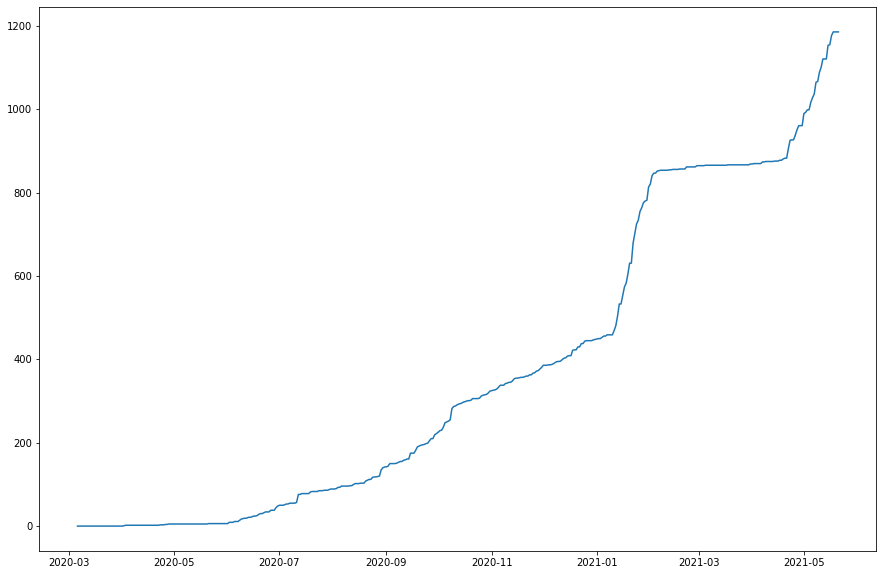

In [5145]:
plt.figure(figsize=(15,10))
plt.plot(Bhu_data['Date'],Bhu_data['Recovered'])

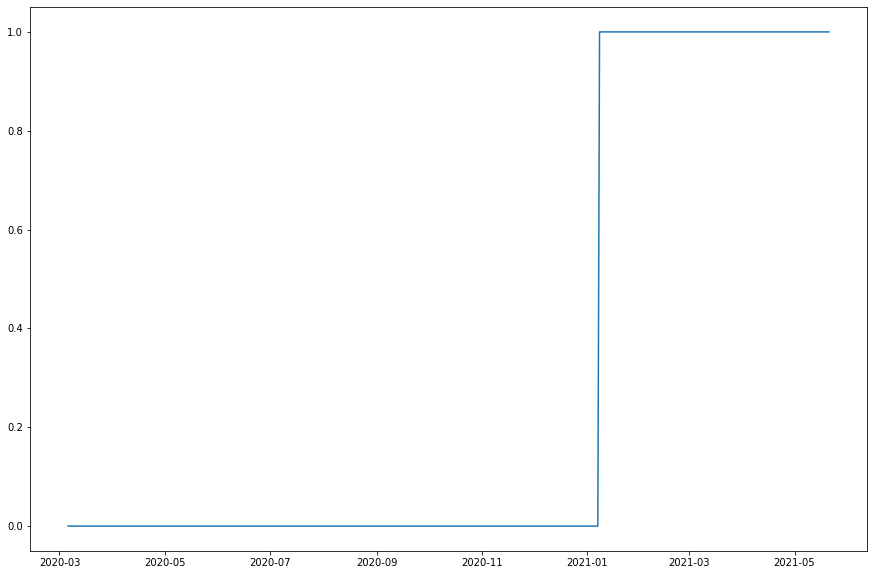

In [5146]:
plt.figure(figsize=(15,10))
plt.plot(Bhu_data['Date'],Bhu_data['Deaths'])

# Confirmed

In [5147]:
dates= Bhu_data.Date.keys()
Bhu_data['Date'] = np.array([i for i in range(len(dates))]).reshape(-1,1)

In [5148]:
bhu_l=(len(Bhu_data))-1
bhu_t=(bhu_l/100)*70

train = Bhu_data[Bhu_data.index <= bhu_t]

test = Bhu_data[Bhu_data.index > bhu_t]

In [5149]:
x_train = train[["Date"]].values
 
y_train = train["Confirmed"].values

x_test = test[["Date"]].values

y_test = test["Confirmed"].values

In [5150]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5151]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

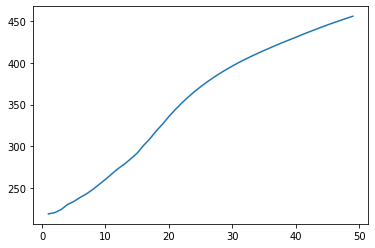

In [5152]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5153]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5154]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5155]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_bhu_c=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_bhu_c)

In [5156]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_bhu_c=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_bhu_c)

In [5157]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_bhu_c = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_bhu_c)

In [5158]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_bhu_c=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_bhu_c)

<BarContainer object of 4 artists>

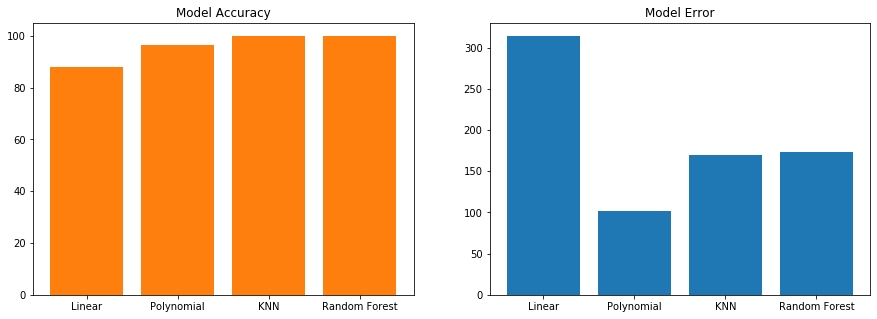

In [5159]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [5160]:
def bhu_accuracy_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def bhu_error_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[1] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_bhu3= html.Div([
   dbc.Row([html.H1('Bhutan')],style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     "margin": "0px 564px"                  
                    }),
     dbc.Row([html.H3('Model evaluation of Confirmed Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                 
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b1',figure=bhu_accuracy_conf())),
                    dbc.Col(dcc.Graph(id='graph_b2',figure=bhu_error_conf())),
                                             
                                            
                    
                    

                ],   
            ),
   

])

In [5161]:
predict_data_bhu=[]
for i in range(1,31):
    bhu_l=bhu_l+1
    predict_data_bhu.append(bhu_l)
    
predict_data_bhu=np.array(predict_data_bhu).reshape(-1,1)

In [5162]:
x=Bhu_data.loc[:,['Date']].values
y=Bhu_data.loc[:,['Confirmed']].values


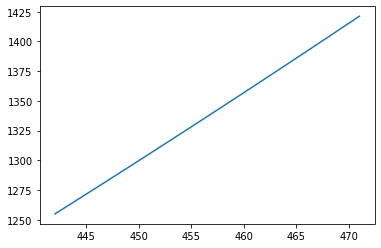

In [5163]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
reg=LinearRegression()
reg.fit(x_poly,y)
pred_bhu_c=reg.predict(poly.fit_transform(predict_data_bhu))

plt.plot(predict_data_bhu,pred_bhu_c)

In [5164]:
#Bhutan Logistic Prediction
x_train = train[["Date","Confirmed"]].values

y_train = train["Lockdown"].values

x_test = test[["Date","Confirmed"]].values

y_test = test["Lockdown"].values

log=LogisticRegression()
log.fit(x_train,y_train)
pred_bhu_lo=log.predict(x_test)

log_accu_bhu=(accuracy_score(y_test,pred_bhu_lo)*100)


x=Bhu_data.loc[:,['Date','Confirmed']].values
y=Bhu_data.loc[:,['Lockdown']].values
y=y.flatten()

bhu_predict_log = np.concatenate((predict_data_bhu,pred_bhu_c),axis=1)


log=LogisticRegression()
log.fit(x,y)
pred_bhu_log=log.predict(bhu_predict_log)
pred_bhu_log


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [5165]:
log_accu_bhu

100.0

# Recovered

In [5166]:
x_train = train[["Date"]].values
 
y_train = train["Recovered"].values

x_test = test[["Date"]].values

y_test = test["Recovered"].values

In [5167]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5168]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

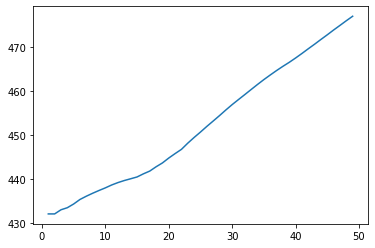

In [5169]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5170]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5171]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5172]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_bhu_r=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_bhu_r)

In [5173]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_bhu_r=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_bhu_r)

In [5174]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_bhu_r = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_bhu_r)

In [5175]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_bhu_r=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_bhu_r)

<BarContainer object of 4 artists>

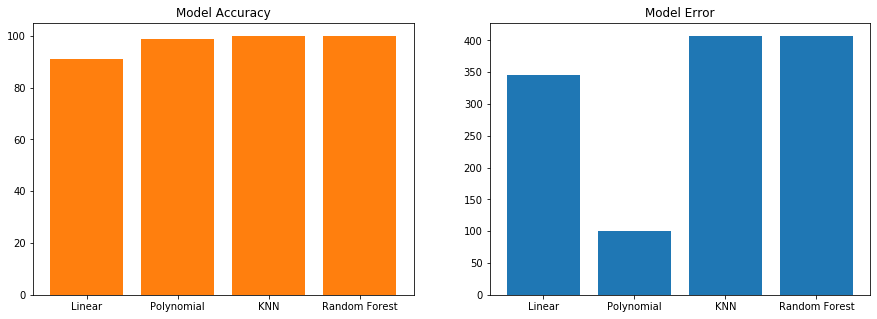

In [5176]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [5177]:
def bhu_accuracy_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def bhu_error_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[1] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_bhu4= html.Div([
   
     dbc.Row([html.H3('Model evaluation of Recovered Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"               
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_bb1',figure=bhu_accuracy_rec())),
                    dbc.Col(dcc.Graph(id='graph_bb2',figure=bhu_error_rec())),
                                             
                                            
                    
                    

                ],   
            ),
    
])




In [5178]:
x=Bhu_data.loc[:,['Date']].values
y=Bhu_data.loc[:,['Recovered']].values
y=y.flatten()

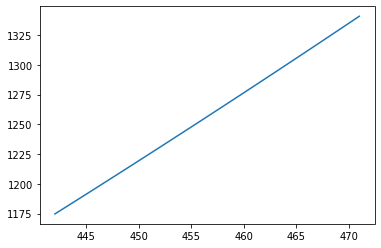

In [5179]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
reg=LinearRegression()
reg.fit(x_poly,y)
pred_bhu_r=reg.predict(poly.fit_transform(predict_data_bhu))

plt.plot(predict_data_bhu,pred_bhu_r)

# Death

In [5180]:
x_train = train[["Date"]].values
 
y_train = train["Deaths"].values

x_test = test[["Date"]].values

y_test = test["Deaths"].values

In [5181]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5182]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

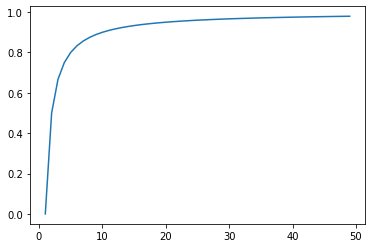

In [5183]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5184]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5185]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5186]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_bhu_d=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_bhu_d)

In [5187]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_bhu_d=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_bhu_d)

In [5188]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_bhu_d = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, p_pred_bhu_d)

In [5189]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_bhu_d=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_bhu_d)

<BarContainer object of 4 artists>

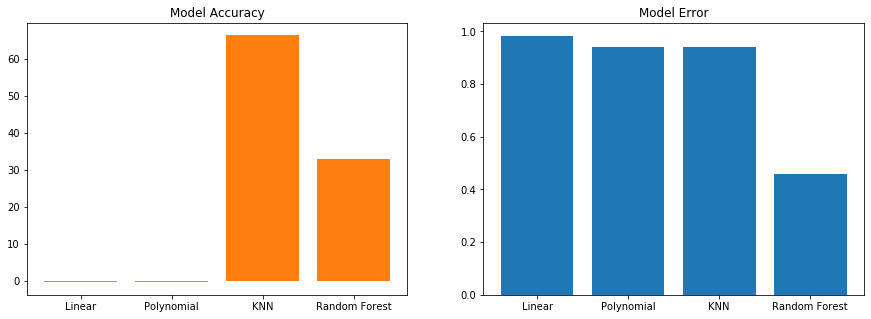

In [5190]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)

In [5191]:
def bhu_accuracy_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def bhu_error_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[2] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_bhu5= html.Div([
  
     dbc.Row([html.H3('Model evaluation of Death Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                 
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_bbb1',figure=bhu_accuracy_d())),
                    dbc.Col(dcc.Graph(id='graph_bbb2',figure=bhu_error_d())),
                                             
                                            
                    
                    

                ],   
            ),
    
])



In [5192]:
x=Bhu_data.loc[:,['Date']].values
y=Bhu_data.loc[:,['Deaths']].values
y=y.flatten()

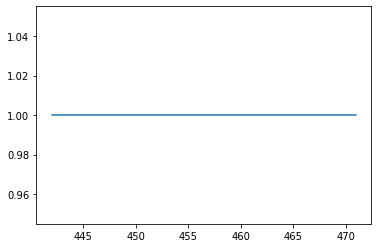

In [5193]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x,y)
pred_bhu_d = knn.predict(predict_data_bhu)

plt.plot(predict_data_bhu,pred_bhu_d)

## Bhutan Webpage

In [5194]:
def graph_bhu_c():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Bhu_data_g['Date'], y=Bhu_data['Daily_Cases'], name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
    
        title={
            'text': "Visualization of covid-19 Confirmed cases",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

def graph_bhu_r():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Bhu_data_g['Date'], y=Bhu_data['Daily_Recovered'], name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 Recovered cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def graph_bhu_d():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Bhu_data_g['Date'], y=Bhu_data['Daily_Deaths'], name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
    title={
            'text': "Visualization of covid-19 death cases",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


In [5195]:
pred_bhu_c=pred_bhu_c.flatten()
def new_graph_bhu_c():

    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_bhu_c, name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 comfirmed cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def new_graph_bhu_r():
    
  
    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_bhu_r, name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
         title={
            'text': "Next 30 days prediction of recovered cases'",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig
def new_graph_bhu_d():
    
   
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_bhu_d, name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
     title={
            'text': "Next 30 days prediction of death cases'",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

### Graph output on the webpage

In [5196]:
child_bhu1= html.Div([
    dbc.Row([html.H2('Bhutan')],
           style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     'margin': '0px 564px'             
                    }),
  
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b1',figure=graph_bhu_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b2',figure=graph_bhu_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
  dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b3',figure=graph_bhu_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
           

])


In [5197]:
#model graph
child_bhu2= html.Div([
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b1',figure=new_graph_bhu_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b2',figure=new_graph_bhu_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
  dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b3',figure=new_graph_bhu_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
           

])


# BANGLADESH

In [5198]:
#importing dataset
Ban_data_g = pd.read_csv("C:/Users/Muhammad Tousique/Final Year Project/Latest Data/Bangladesh.csv")
Ban_data = Ban_data_g

In [5199]:
#Calculating for New Positive Cases per day
confirmed=Ban_data["Confirmed"]
active_day=[0]*len(confirmed)
active_day[0]=confirmed[0]
for i in range(1,len(confirmed)):
    active_day[i]=confirmed[i]-confirmed[i-1]
new_cases= pd.DataFrame(data=active_day, index=None, columns=["Daily_Cases"])


In [5200]:
#Calculating for New Deaths Cases per day
deaths=Ban_data["Deaths"]
deaths_day=[0]*len(deaths)
deaths_day[0]=deaths[0]
for i in range(1,len(deaths)):
    deaths_day[i]=deaths[i]-deaths[i-1]
new_deaths= pd.DataFrame(data=deaths_day, index=None, columns=["Daily_Deaths"])


In [5201]:
#Calculating for New Recovered Cases per day
recovered=Ban_data["Recovered"]
recovered_day=[0]*len(recovered)
recovered_day[0]=recovered[0]
for i in range(1,len(recovered)):
    recovered_day[i]=recovered[i]-recovered[i-1]
new_recovered= pd.DataFrame(data=recovered_day, index=None, columns=["Daily_Recovered"])

In [5202]:
#concat new columns into dataframe
Ban_data = pd.concat([Ban_data,new_cases,new_deaths,new_recovered], axis=1)

In [5203]:
#converting string date column into date
Ban_data['Date'] = pd.to_datetime(Ban_data['Date'])
Ban_data.head()

,Country,Date,Confirmed,Recovered,Deaths,Active,Test_conducted,Lockdown,Daily_Cases,Daily_Deaths,Daily_Recovered
0,Bangladesh,2020-03-08,3,0,0,3,10,0,3,0,0
1,Bangladesh,2020-03-09,3,0,0,3,10,0,0,0,0
2,Bangladesh,2020-03-10,3,0,0,3,16,0,0,0,0
3,Bangladesh,2020-03-11,3,0,0,3,24,0,0,0,0
4,Bangladesh,2020-03-12,3,0,0,3,24,0,0,0,0


In [5204]:
#checking null values in dataframe
variables = Ban_data.columns 
Ban_data.isnull().sum().loc[variables]

Country            0
Date               0
Confirmed          0
Recovered          0
Deaths             0
Active             0
Test_conducted     0
Lockdown           0
Daily_Cases        0
Daily_Deaths       0
Daily_Recovered    0
dtype: int64

In [5205]:
#mar 2020 Ban
mar_ban_20=Ban_data[Ban_data["Date"].between('2020-03-08','2020-03-31')]
ban_deaths=mar_ban_20['Daily_Deaths']
ban_cases=mar_ban_20['Daily_Cases']
ban_test=mar_ban_20['Test_conducted']
ban_recovered=mar_ban_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_ban_20.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_mar_20_positive_rate=((sum_cases/sum_test)*100)
ban_mar_20_recover_rate=((sum_recover/sum_cases)*100)
ban_mar_20_death_rate=((sum_deaths/sum_cases)*100)



#april 2020 Ban
apr_ban_20=Ban_data[Ban_data["Date"].between('2020-04-01','2020-04-30')]
ban_deaths=apr_ban_20['Daily_Deaths']
ban_cases=apr_ban_20['Daily_Cases']
ban_test=apr_ban_20['Test_conducted']
ban_recovered=apr_ban_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_ban_20.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_apr_20_positive_rate=((sum_cases/sum_test)*100)
ban_apr_20_recover_rate=((sum_recover/sum_cases)*100)
ban_apr_20_death_rate=((sum_deaths/sum_cases)*100)



#may 2020 Ban
may_ban_20=Ban_data[Ban_data["Date"].between('2020-05-01','2020-05-31')]
ban_deaths=may_ban_20['Daily_Deaths']
ban_cases=may_ban_20['Daily_Cases']
ban_test=may_ban_20['Test_conducted']
ban_recovered=may_ban_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_ban_20.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_may_20_positive_rate=((sum_cases/sum_test)*100)
ban_may_20_recover_rate=((sum_recover/sum_cases)*100)
ban_may_20_death_rate=((sum_deaths/sum_cases)*100)


#june 2020 Ban
jun_ban_20=Ban_data[Ban_data["Date"].between('2020-06-01','2020-06-30')]
ban_deaths=jun_ban_20['Daily_Deaths']
ban_cases=jun_ban_20['Daily_Cases']
ban_test=jun_ban_20['Test_conducted']
ban_recovered=jun_ban_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jun_ban_20.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_jun_20_positive_rate=((sum_cases/sum_test)*100)
ban_jun_20_recover_rate=((sum_recover/sum_cases)*100)
ban_jun_20_death_rate=((sum_deaths/sum_cases)*100)

#july 2020 Ban
july_ban_20=Ban_data[Ban_data["Date"].between('2020-07-01','2020-07-31')]
ban_deaths=july_ban_20['Daily_Deaths']
ban_cases=july_ban_20['Daily_Cases']
ban_test=july_ban_20['Test_conducted']
ban_recovered=july_ban_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in july_ban_20.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_july_20_positive_rate=((sum_cases/sum_test)*100)
ban_july_20_recover_rate=((sum_recover/sum_cases)*100)
ban_july_20_death_rate=((sum_deaths/sum_cases)*100)

#August 2020 Ban
aug_ban_20=Ban_data[Ban_data["Date"].between('2020-08-01','2020-08-31')]
ban_deaths=aug_ban_20['Daily_Deaths']
ban_cases=aug_ban_20['Daily_Cases']
ban_test=aug_ban_20['Test_conducted']
ban_recovered=aug_ban_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in aug_ban_20.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_aug_20_positive_rate=((sum_cases/sum_test)*100)
ban_aug_20_recover_rate=((sum_recover/sum_cases)*100)
ban_aug_20_death_rate=((sum_deaths/sum_cases)*100)

#September 2020 Ban
sep_ban_20=Ban_data[Ban_data["Date"].between('2020-09-01','2020-09-30')]
ban_deaths=sep_ban_20['Daily_Deaths']
ban_cases=sep_ban_20['Daily_Cases']
ban_test=sep_ban_20['Test_conducted']
ban_recovered=sep_ban_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in sep_ban_20.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_sep_20_positive_rate=((sum_cases/sum_test)*100)
ban_sep_20_recover_rate=((sum_recover/sum_cases)*100)
ban_sep_20_death_rate=((sum_deaths/sum_cases)*100)

#October 2020 Ban
oct_ban_20=Ban_data[Ban_data["Date"].between('2020-10-01','2020-10-31')]
ban_deaths=oct_ban_20['Daily_Deaths']
ban_cases=oct_ban_20['Daily_Cases']
ban_test=oct_ban_20['Test_conducted']
ban_recovered=oct_ban_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in oct_ban_20.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_oct_20_positive_rate=((sum_cases/sum_test)*100)
ban_oct_20_recover_rate=((sum_recover/sum_cases)*100)
ban_oct_20_death_rate=((sum_deaths/sum_cases)*100)


#November 2020 Ban
nov_ban_20=Ban_data[Ban_data["Date"].between('2020-11-01','2020-11-30')]
ban_deaths=nov_ban_20['Daily_Deaths']
ban_cases=nov_ban_20['Daily_Cases']
ban_test=nov_ban_20['Test_conducted']
ban_recovered=nov_ban_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in nov_ban_20.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_nov_20_positive_rate=((sum_cases/sum_test)*100)
ban_nov_20_recover_rate=((sum_recover/sum_cases)*100)
ban_nov_20_death_rate=((sum_deaths/sum_cases)*100)


#December 2020 Ban
dec_ban_20=Ban_data[Ban_data["Date"].between('2020-12-01','2020-12-31')]
ban_deaths=dec_ban_20['Daily_Deaths']
ban_cases=dec_ban_20['Daily_Cases']
ban_test=dec_ban_20['Test_conducted']
ban_recovered=dec_ban_20['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in dec_ban_20.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_dec_20_positive_rate=((sum_cases/sum_test)*100)
ban_dec_20_recover_rate=((sum_recover/sum_cases)*100)
ban_dec_20_death_rate=((sum_deaths/sum_cases)*100)


#January 2021 Ban
jan_ban_21=Ban_data[Ban_data["Date"].between('2021-01-01','2021-01-31')]
ban_deaths=jan_ban_21['Daily_Deaths']
ban_cases=jan_ban_21['Daily_Cases']
ban_test=jan_ban_21['Test_conducted']
ban_recovered=jan_ban_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in jan_ban_21.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_jan_21_positive_rate=((sum_cases/sum_test)*100)
ban_jan_21_recover_rate=((sum_recover/sum_cases)*100)
ban_jan_21_death_rate=((sum_deaths/sum_cases)*100)

#February 2021 Ban
feb_ban_21=Ban_data[Ban_data["Date"].between('2021-02-01','2021-02-28')]
ban_deaths=feb_ban_21['Daily_Deaths']
ban_cases=feb_ban_21['Daily_Cases']
ban_test=feb_ban_21['Test_conducted']
ban_recovered=feb_ban_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in feb_ban_21.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_feb_21_positive_rate=((sum_cases/sum_test)*100)
ban_feb_21_recover_rate=((sum_recover/sum_cases)*100)
ban_feb_21_death_rate=((sum_deaths/sum_cases)*100)

#March 2021 Ban
mar_ban_21=Ban_data[Ban_data["Date"].between('2021-03-01','2021-03-31')]
ban_deaths=mar_ban_21['Daily_Deaths']
ban_cases=mar_ban_21['Daily_Cases']
ban_test=mar_ban_21['Test_conducted']
ban_recovered=mar_ban_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in mar_ban_21.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_mar_21_positive_rate=((sum_cases/sum_test)*100)
ban_mar_21_recover_rate=((sum_recover/sum_cases)*100)
ban_mar_21_death_rate=((sum_deaths/sum_cases)*100)

#April 2021 Ban
apr_ban_21=Ban_data[Ban_data["Date"].between('2021-04-01','2021-04-30')]
ban_deaths=apr_ban_21['Daily_Deaths']
ban_cases=apr_ban_21['Daily_Cases']
ban_test=apr_ban_21['Test_conducted']
ban_recovered=apr_ban_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in apr_ban_21.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_apr_21_positive_rate=((sum_cases/sum_test)*100)
ban_apr_21_recover_rate=((sum_recover/sum_cases)*100)
ban_apr_21_death_rate=((sum_deaths/sum_cases)*100)

#May 2021 Ban
may_ban_21=Ban_data[Ban_data["Date"].between('2021-05-01','2021-05-21')]
ban_deaths=may_ban_21['Daily_Deaths']
ban_cases=may_ban_21['Daily_Cases']
ban_test=may_ban_21['Test_conducted']
ban_recovered=may_ban_21['Daily_Recovered']
sum_deaths=0
sum_cases=0
sum_test=0
sum_recover=0
for ind in may_ban_21.index:
    sum_deaths=sum_deaths+ban_deaths[ind]
    sum_cases=sum_cases+ban_cases[ind]
    sum_test=sum_test+ban_test[ind]
    sum_recover=sum_recover+ban_recovered[ind]
    

ban_may_21_positive_rate=((sum_cases/sum_test)*100)
ban_may_21_recover_rate=((sum_recover/sum_cases)*100)
ban_may_21_death_rate=((sum_deaths/sum_cases)*100)

In [5206]:
months = ['Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
positive = [ban_mar_20_positive_rate,ban_apr_20_positive_rate,ban_may_20_positive_rate,ban_jun_20_positive_rate,ban_july_20_positive_rate,ban_aug_20_positive_rate,ban_sep_20_positive_rate,ban_oct_20_positive_rate,ban_nov_20_positive_rate,ban_dec_20_positive_rate,ban_jan_21_positive_rate,ban_feb_21_positive_rate,ban_mar_21_positive_rate,ban_apr_21_positive_rate,ban_may_21_positive_rate,]

In [5207]:
months = ['Mar 20', 'Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
recover = [ban_mar_20_recover_rate,ban_apr_20_recover_rate,ban_may_20_recover_rate,ban_jun_20_recover_rate,ban_july_20_recover_rate,ban_aug_20_recover_rate,ban_sep_20_recover_rate,ban_oct_20_recover_rate,ban_nov_20_recover_rate,ban_dec_20_recover_rate,ban_jan_21_recover_rate,ban_feb_21_recover_rate,ban_mar_21_recover_rate,ban_apr_21_recover_rate,ban_may_21_recover_rate,]

In [5208]:
months = ['Mar 20','Apr 20', 'May 20','June 20','July 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21',]
death = [ban_mar_20_death_rate,ban_apr_20_death_rate,ban_may_20_death_rate,ban_jun_20_death_rate,ban_july_20_death_rate,ban_aug_20_death_rate,ban_sep_20_death_rate,ban_oct_20_death_rate,ban_nov_20_death_rate,ban_dec_20_death_rate,ban_jan_21_death_rate,ban_feb_21_death_rate,ban_mar_21_death_rate,ban_apr_21_death_rate,ban_may_21_death_rate,]

In [5209]:
def ban_ratio_bar_p():
    x = months
    y = positive


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Positivity Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def ban_ratio_bar_r():
    x = months
    y = recover


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='lightslategray', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Recovery Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def ban_ratio_bar_d():
    x = months
    y = death


    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='crimson', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Death Rate Per Month",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_ban6= html.Div([
   
     
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_pppp1',figure=ban_ratio_bar_p())),
                    dbc.Col(dcc.Graph(id='graph_pppp1',figure=ban_ratio_bar_d())),
                    dbc.Col(dcc.Graph(id='graph_pppp1',figure=ban_ratio_bar_r())),
                ],   
            ),
    
     

])

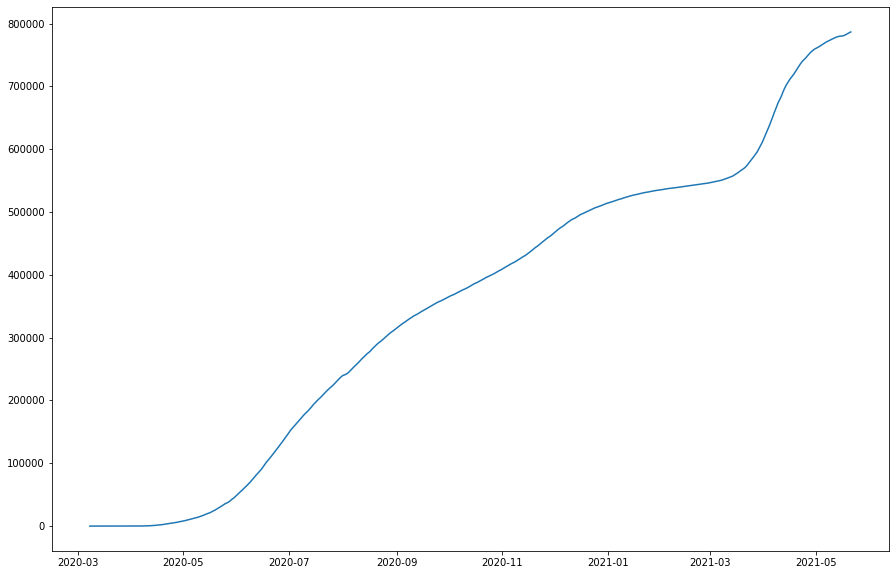

In [5210]:
plt.figure(figsize=(15,10))
plt.plot(Ban_data['Date'],Ban_data['Confirmed'])

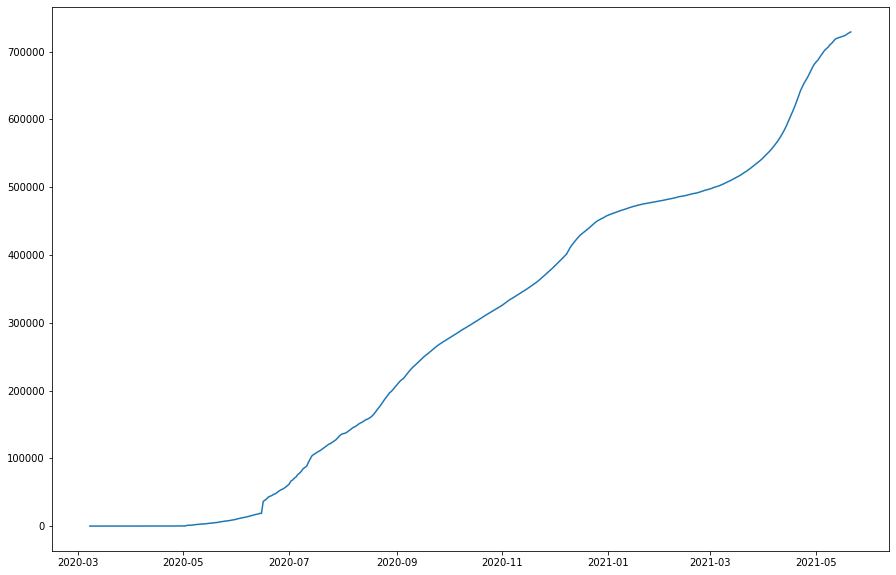

In [5211]:
plt.figure(figsize=(15,10))
plt.plot(Ban_data['Date'],Ban_data['Recovered'])

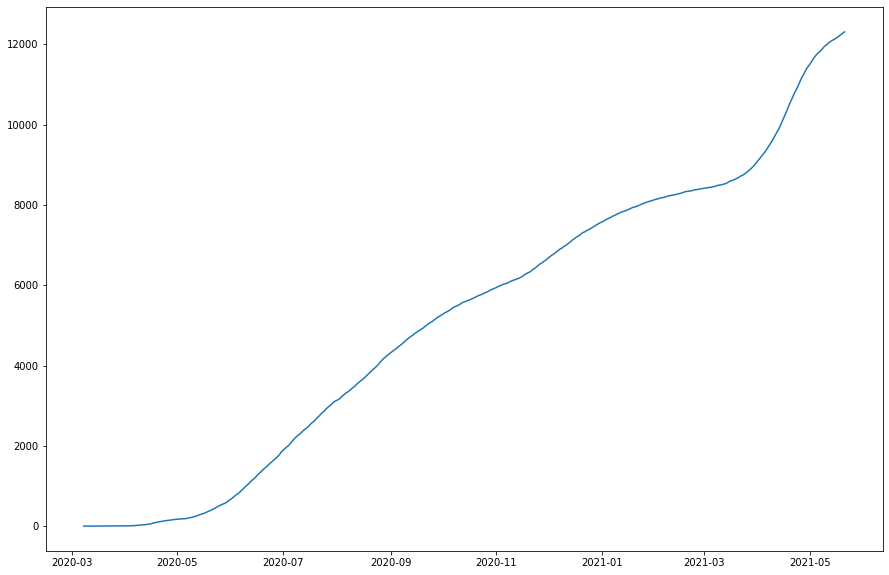

In [5212]:
plt.figure(figsize=(15,10))
plt.plot(Ban_data['Date'],Ban_data['Deaths'])

# Confirmed

In [5213]:
dates= Ban_data.Date.keys()
Ban_data['Date'] = np.array([i for i in range(len(dates))]).reshape(-1,1)

In [5214]:
ban_l=(len(Ban_data))-1
ban_t=(ban_l/100)*70

train = Ban_data[Ban_data.index <= ban_t]

test = Ban_data[Ban_data.index > ban_t]

In [5215]:
x_train = train[["Date"]].values
 
y_train = train["Confirmed"].values

x_test = test[["Date"]].values

y_test = test["Confirmed"].values

In [5216]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5217]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

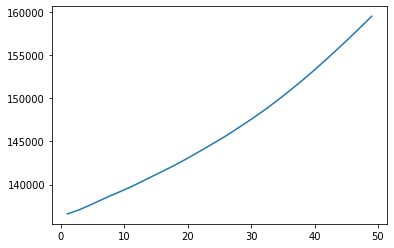

In [5218]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5219]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5220]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5221]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_ban_c=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_ban_c)

In [5222]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_ban_c=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_ban_c)

In [5223]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_ban_c = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_ban_c)

In [5224]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_ban_c=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_ban_c)

<BarContainer object of 4 artists>

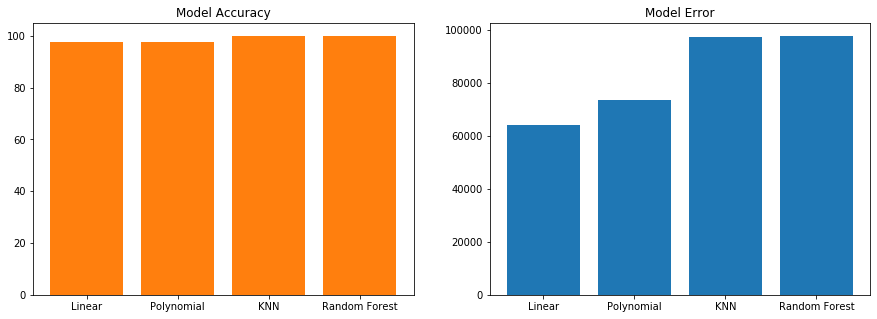

In [5225]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [5226]:
def ban_accuracy_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def ban_error_conf():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[0] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

child_ban3= html.Div([
   dbc.Row([html.H1('Bangladesh')],style={'color':'#55ACEE',
                     "padding": "16px 16px",
                      "margin": "0px 564px"                    
                    }),
     dbc.Row([html.H3('Model evaluation of Confirmed Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                 
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b1',figure=ban_accuracy_conf())),
                    dbc.Col(dcc.Graph(id='graph_b2',figure=ban_error_conf())),
                                             
                                            
                    
                    

                ],   
            ),
   

])


In [5227]:
predict_data_ban=[]
for i in range(1,31):
    ban_l=ban_l+1
    predict_data_ban.append(ban_l)
    

predict_data_ban=np.array(predict_data_ban).reshape(-1,1)

In [5228]:
x=Ban_data.loc[:,['Date']].values
y=Ban_data.loc[:,['Confirmed']].values


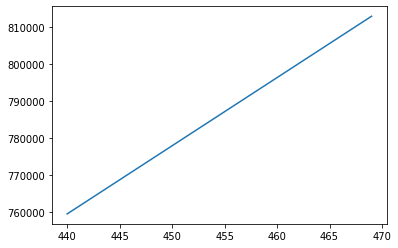

In [5229]:
regressor=LinearRegression()
regressor.fit(x,y)
pred_ban_c = regressor.predict(predict_data_ban)

plt.plot(predict_data_ban,pred_ban_c)

In [5230]:
#Bangladesh Logistic Prediction
x_train = train[["Date","Confirmed"]].values

y_train = train["Lockdown"].values

x_test = test[["Date","Confirmed"]].values

y_test = test["Lockdown"].values

log=LogisticRegression()
log.fit(x_train,y_train)
pred_ban_lo=log.predict(x_test)

log_accu_ban=(accuracy_score(y_test,pred_ban_lo)*100)


x=Ban_data.loc[:,['Date','Confirmed']].values
y=Ban_data.loc[:,['Lockdown']].values
y=y.flatten()

ban_predict_log = np.concatenate((predict_data_ban,pred_ban_c),axis=1)


log=LogisticRegression()
log.fit(x,y)
pred_ban_log=log.predict(ban_predict_log)
pred_ban_log


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [5231]:
log_accu_ban

81.81818181818183

# Recovered

In [5232]:
x_train = train[["Date"]].values
 
y_train = train["Recovered"].values

x_test = test[["Date"]].values

y_test = test["Recovered"].values

In [5233]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5234]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

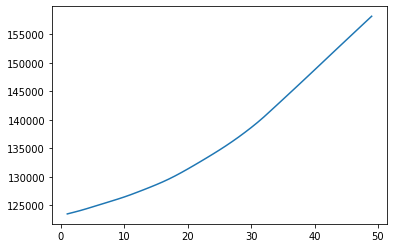

In [5235]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5236]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5237]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5238]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_ban_r=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_ban_r)

In [5239]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_ban_r=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_ban_r)

In [5240]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_ban_r = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_ban_r)

In [5241]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_ban_r=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_ban_r)

<BarContainer object of 4 artists>

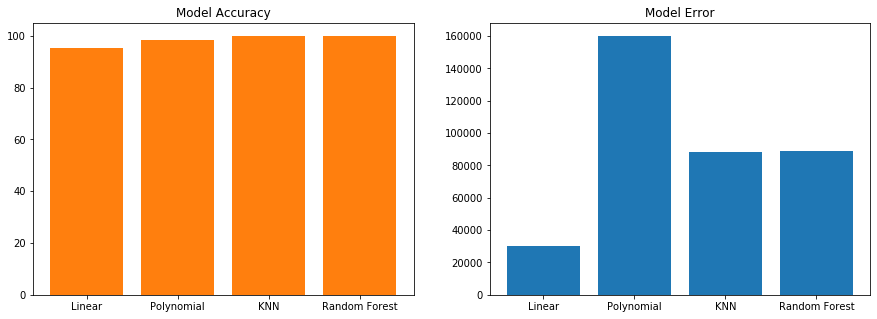

In [5242]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [5243]:
def ban_accuracy_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def ban_error_rec():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[0] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_ban4= html.Div([
   
     dbc.Row([html.H3('Model evaluation of Recovered Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                  
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_bb1',figure=ban_accuracy_rec())),
                    dbc.Col(dcc.Graph(id='graph_bb2',figure=ban_error_rec())),
                                             
                                            
                    
                    

                ],   
            ),
    
])


In [5244]:
x=Ban_data.loc[:,['Date']].values
y=Ban_data.loc[:,['Recovered']].values
y=y.flatten()

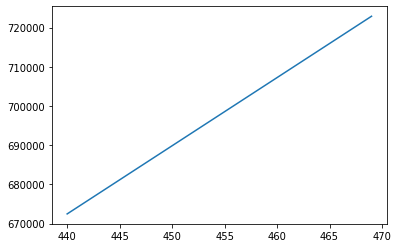

In [5245]:
regressor=LinearRegression()
regressor.fit(x,y)
pred_ban_r=regressor.predict(predict_data_ban)

plt.plot(predict_data_ban,pred_ban_r)

# Deaths

In [5246]:
x_train = train[["Date"]].values
 
y_train = train["Deaths"].values

x_test = test[["Date"]].values

y_test = test["Deaths"].values

In [5247]:
skfold=StratifiedKFold(n_splits=3,random_state=100,shuffle=True)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
linear_a=results_skfold.mean()*100.0

In [5248]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model_skfold=LinearRegression()
results_skfold=cross_val_score(model_skfold,x_poly,y_train,cv=skfold)
poly_a=results_skfold.mean()*100.0

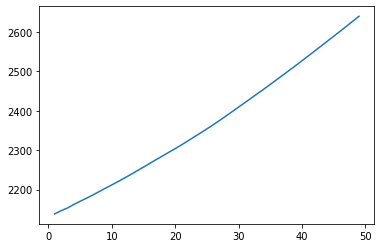

In [5249]:
rmse_val=[]
for k in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

plt.plot(range(1,50),rmse_val)

In [5250]:
model_skfold=KNeighborsRegressor(n_neighbors=1)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
knn_a=results_skfold.mean()*100.0

In [5251]:
model_skfold=RandomForestRegressor(n_estimators=50,random_state=0)
results_skfold=cross_val_score(model_skfold,x_train,y_train,cv=skfold)
random_a=results_skfold.mean()*100.0

In [5252]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
l_pred_ban_d=regressor.predict(x_test)
linear_e=mean_absolute_error(y_test, l_pred_ban_d)

In [5253]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p_pred_ban_d=reg.predict(poly.fit_transform(x_test))
poly_e=mean_absolute_error(y_test, p_pred_ban_d)

In [5254]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred_ban_d = knn.predict(x_test)
knn_e=mean_absolute_error(y_test, knn_pred_ban_d)

In [5255]:
RFReg=RandomForestRegressor(n_estimators=50,random_state=0)
RFReg.fit(x_train,y_train)
r_predict_ban_d=RFReg.predict(x_test)
random_e=mean_absolute_error(y_test, r_predict_ban_d)

<BarContainer object of 4 artists>

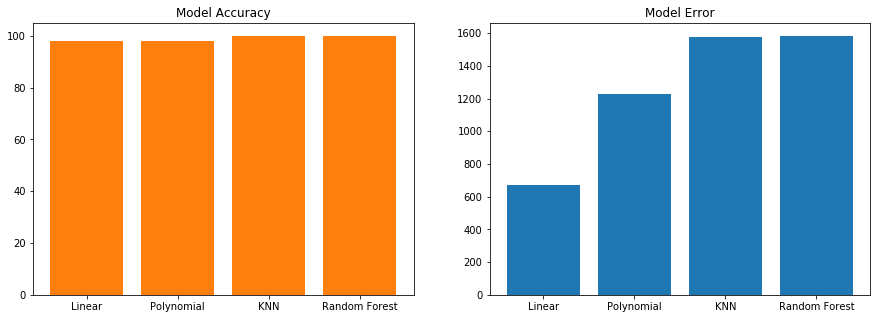

In [5256]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Model Accuracy')
algo = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
accu = [linear_a,poly_a,knn_a,random_a]
err = [linear_e,poly_e,knn_e,random_e]
ax1.bar(algo,accu)
ax1.set_title('Model Accuracy')
ax2.set_title('Model Error')

ax1.bar(algo,accu)
ax2.bar(algo,err)


In [5257]:
def ban_accuracy_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_a,poly_a,knn_a,random_a]



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Accuracy",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig

def ban_error_d():
    x = ['Linear', 'Polynomial', 'KNN', 'Random Forest']
    y = [linear_e,poly_e,knn_e,random_e]

    colors = ['lightslategray',] * 4
    colors[0] = 'crimson'

    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color= colors, marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Model Error",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
child_ban5= html.Div([
  
     dbc.Row([html.H3('Model evaluation of Death Cases')],style={'color':'#493e32',
                     "padding": "16px 16px",
                     "margin": "0px 386px"                
                    }),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_bbb1',figure=ban_accuracy_d())),
                    dbc.Col(dcc.Graph(id='graph_bbb2',figure=ban_error_d())),
                                             
                                            
                    
                    

                ],   
            ),
    
])



In [5258]:
x=Ban_data.loc[:,['Date']].values
y=Ban_data.loc[:,['Deaths']].values
y=y.flatten()

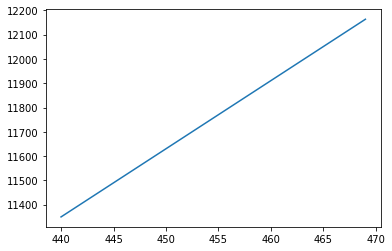

In [5259]:
regressor=LinearRegression()
regressor.fit(x,y)
pred_ban_d=regressor.predict(predict_data_ban)

plt.plot(predict_data_ban,pred_ban_d)

## Bangladesh Webpage

In [5260]:
def graph_ban_c():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Ban_data_g['Date'], y=Ban_data['Daily_Cases'], name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
    title={
            'text': "Visualization of covid-19 confirmed cases",
            'y':0.9,
            'x':0.5,
            },
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

def graph_ban_r():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Ban_data_g['Date'], y=Ban_data['Daily_Recovered'], name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 recovered cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def graph_ban_d():
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=Ban_data_g['Date'], y=Ban_data['Daily_Deaths'], name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
        title={
            'text': "Visualization of covid-19 death cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


In [5261]:
pred_ban_c=pred_ban_c.flatten()
def new_graph_ban_c():

    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_ban_c, name='Confirmed',mode='lines'),
              ])  
    fig.update_layout(
        title={
            'text': "Next 30 days prediction of confirmed cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig


def new_graph_ban_r():
    
  
    
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_ban_r, name='Recovered',mode='lines',line=dict(color='#98FB98', width=2,
                              )),
              ])  
    fig.update_layout(
         title={
            'text': "Next 30 days prediction of recovered cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig
def new_graph_ban_d():
    
   
    fig = go.Figure([
       
    
            go.Scatter(x=pred_d1, y=pred_ban_d, name='Death',mode='lines',line=dict(color='firebrick', width=2,
                              )),
              ])  
    fig.update_layout(
         title={
            'text': "Next 30 days prediction of death cases",
            'y':0.9,
            'x':0.5,
            },
    
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
        
   
    return fig

### Graph output on the webpage

In [5262]:
child_ban1= html.Div([
    dbc.Row([html.H2('Bangladesh')],
           style={'color':'#55ACEE',
                     "padding": "16px 16px",
                     'margin': '0px 564px'             
                    }),
  
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b1',figure=graph_ban_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    
     dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b2',figure=graph_ban_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    
     dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b3',figure=graph_ban_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
   
           

])


In [5263]:
#model graph
child_ban2= html.Div([
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b1',figure=new_graph_ban_c()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    
     dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b2',figure=new_graph_ban_d()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    
     dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graph_b3',figure=new_graph_ban_r()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
   
           

])


<h1><center><font color = purple>WEB STRUCTURE</font></center></h1>

In [5264]:
def generate_card_content_home(card_header,card_value,overall_value):
    card_head_style = {'textAlign':'center','fontSize':'100%'}
    card_body_style = {'textAlign':'center','fontSize':'90%'}
    card_header = dbc.CardHeader(card_header,style=card_head_style)
    card_body = dbc.CardBody(
        [
#             html.H5(f"{int(card_value):,}", className="card-title",style=card_body_style),
            html.P(
                "Sub-Continent: {:,}".format(overall_value),
                className="card-text",style={'textAlign':'center'}
            ),
        ]
    )
    card = [card_header,card_body]
    return card


In [5265]:
def generate_card_content(card_header,card_value,overall_value):
    card_head_style = {'textAlign':'center','fontSize':'100%'}
    card_body_style = {'textAlign':'center','fontSize':'90%'}
    card_header = dbc.CardHeader(card_header,style=card_head_style)
    card_body = dbc.CardBody(
        [
            html.H5(f"{int(card_value):,}", className="card-title",style=card_body_style),
            html.P(
                "Sub-Continent: {:,}".format(overall_value),
                className="card-text",style={'textAlign':'center'}
            ),
        ]
    )
    card = [card_header,card_body]
    return card

In [5266]:
#For Pakistan
pak_confirmed=sum(Pak_data["Daily_Cases"])
pak_deaths=sum(Pak_data["Daily_Deaths"])
pak_recovered=sum(Pak_data["Daily_Recovered"])
pak_active=pak_confirmed-pak_recovered-pak_deaths

#For India
ind_confirmed=sum(Ind_data["Daily_Cases"])
ind_deaths=sum(Ind_data["Daily_Deaths"])
ind_recovered=sum(Ind_data["Daily_Recovered"])
ind_active=ind_confirmed-ind_recovered-ind_deaths

#For Bangladesh
ban_confirmed=sum(Ban_data["Daily_Cases"])
ban_deaths=sum(Ban_data["Daily_Deaths"])
ban_recovered=sum(Ban_data["Daily_Recovered"])
ban_active=ban_confirmed-ban_recovered-ban_deaths

#For Bhutan
bhu_confirmed=sum(Bhu_data["Daily_Cases"])
bhu_deaths=sum(Bhu_data["Daily_Deaths"])
bhu_recovered=sum(Bhu_data["Daily_Recovered"])
bhu_active=bhu_confirmed-bhu_recovered-bhu_deaths

#For Maldives
mal_confirmed=sum(Mal_data["Daily_Cases"])
mal_deaths=sum(Mal_data["Daily_Deaths"])
mal_recovered=sum(Mal_data["Daily_Recovered"])
mal_active=mal_confirmed-mal_recovered-mal_deaths

#For Nepal
nep_confirmed=sum(Nep_data["Daily_Cases"])
nep_deaths=sum(Nep_data["Daily_Deaths"])
nep_recovered=sum(Nep_data["Daily_Recovered"])
nep_active=nep_confirmed-nep_recovered-nep_deaths

#For Sri Lanka
sri_confirmed=sum(Sri_data["Daily_Cases"])
sri_deaths=sum(Sri_data["Daily_Deaths"])
sri_recovered=sum(Sri_data["Daily_Recovered"])
sri_active=sri_confirmed-sri_recovered-sri_deaths

#Overall Sub continent cases
sub_confirmed=pak_confirmed+ind_confirmed+ban_confirmed+bhu_confirmed+mal_confirmed+nep_confirmed+sri_confirmed

sub_deaths=pak_deaths+ind_deaths+ban_deaths+bhu_deaths+mal_deaths+nep_deaths+sri_deaths

sub_recovered=pak_recovered+ind_recovered+ban_recovered+bhu_recovered+mal_recovered+nep_recovered+sri_recovered

sub_active=pak_active+ind_active+ban_active+bhu_active+mal_active+nep_active+sri_active



In [5267]:
#home
def generate_cards_home():
    
    cards = html.Div(
        [
            dbc.Row(
                [
                    dbc.Col(dbc.Card(generate_card_content_home("Confirmed","Sub-Continent:",sub_confirmed), color="warning", inverse=True),md=dict(size=2,offset=2)),
                    dbc.Col(dbc.Card(generate_card_content_home("Recovered","Sub-Continent:",sub_recovered), color="success", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content_home("Dead","Sub-Continent:",sub_deaths),color="maroon", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content_home("Active","Sub-Continent:",sub_active),color="#FFA07A", inverse=True),md=dict(size=2)),
                ],
                className="mb-4",
            ),
        ],id='card1'
        
    )
    return cards


In [5268]:
#Bangladesh
def generate_cards_ban():
    
    cards = html.Div(
        [
            dbc.Row(
                [
                    dbc.Col(dbc.Card(generate_card_content("Confirmed",ban_confirmed,sub_confirmed), color="warning", inverse=True),md=dict(size=2,offset=2)),
                    dbc.Col(dbc.Card(generate_card_content("Recovered",ban_recovered,sub_recovered), color="success", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Dead",ban_deaths,sub_deaths),color="maroon", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Active",ban_active,sub_active),color="#FFA07A", inverse=True),md=dict(size=2)),
                ],
                className="mb-4",
            ),
        ],id='card1'
        
    )
    return cards

In [5269]:
#bhutan
def generate_cards_bhu():
    
    cards = html.Div(
        [
            dbc.Row(
                [
                    dbc.Col(dbc.Card(generate_card_content("Confirmed",bhu_confirmed,sub_confirmed), color="warning", inverse=True),md=dict(size=2,offset=2)),
                    dbc.Col(dbc.Card(generate_card_content("Recovered",bhu_recovered,sub_recovered), color="success", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Dead",bhu_deaths,sub_deaths),color="maroon", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Active",bhu_active,sub_active),color="#FFA07A", inverse=True),md=dict(size=2)),
                ],
                className="mb-4",
            ),
        ],id='card1'
        
    )
    return cards

In [5270]:
#India
def generate_cards_ind():
    
    
    cards = html.Div(
        [
            dbc.Row(
                [
                    dbc.Col(dbc.Card(generate_card_content("Confirmed",ind_confirmed,sub_confirmed), color="warning", inverse=True),md=dict(size=2,offset=2)),
                    dbc.Col(dbc.Card(generate_card_content("Recovered",ind_recovered,sub_recovered), color="success", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Dead",ind_deaths,sub_deaths),color="maroon", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Active",ind_active,sub_active),color="#FFA07A", inverse=True),md=dict(size=2)),
                ],
                className="mb-4",
            ),
        ],id='card1'
        
    )
    return cards

In [5271]:
#Nepal
def generate_cards_nep():
   
    cards = html.Div(
        [
            dbc.Row(
                [
                    
                    dbc.Col(dbc.Card(generate_card_content("Confirmed",nep_confirmed,sub_confirmed), color="warning", inverse=True),md=dict(size=2,offset=2)),
                    dbc.Col(dbc.Card(generate_card_content("Recovered",nep_recovered,sub_recovered), color="success", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Dead",nep_deaths,sub_deaths),color="maroon", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Active",nep_active,sub_active),color="#FFA07A", inverse=True),md=dict(size=2)),
                ],
                className="mb-4",
            ),
        ],id='card1'
        
    )
    return cards

In [5272]:
#Maldives
def generate_cards_mal():
    
    cards = html.Div(
        [
            dbc.Row(
                [
                    dbc.Col(dbc.Card(generate_card_content("Confirmed",mal_confirmed,sub_confirmed), color="warning", inverse=True),md=dict(size=2,offset=2)),
                    dbc.Col(dbc.Card(generate_card_content("Recovered",mal_recovered,sub_recovered), color="success", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Dead",mal_deaths,sub_deaths),color="maroon", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Active",mal_active,sub_active),color="#FFA07A", inverse=True),md=dict(size=2)),
                ],
                className="mb-4",
            ),
        ],id='card1'
        
    )
    return cards

In [5273]:
#Pakistan
def generate_cards_pak():
   
    cards = html.Div(
        [
            dbc.Row(
                [

                    dbc.Col(dbc.Card(generate_card_content("Confirmed",pak_confirmed,sub_confirmed), color="warning", inverse=True),md=dict(size=2,offset=2)),
                    dbc.Col(dbc.Card(generate_card_content("Recovered",pak_recovered,sub_recovered), color="success", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Dead",pak_deaths,sub_deaths),color="maroon", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Active",pak_active,sub_active),color="#FFA07A", inverse=True),md=dict(size=2)),
                ],
                className="mb-4",
            ),
        ],id='card1'
        
    )
    return cards

In [5274]:
#Sri lanka
def generate_cards_sri():
   
    cards = html.Div(
        [
            dbc.Row(
                [
                    dbc.Col(dbc.Card(generate_card_content("Confirmed",sri_confirmed,sub_confirmed), color="warning", inverse=True),md=dict(size=2,offset=2)),
                    dbc.Col(dbc.Card(generate_card_content("Recovered",sri_recovered,sub_recovered), color="success", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Dead",sri_deaths,sub_deaths),color="maroon", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Active",sri_active,sub_active),color="#FFA07A", inverse=True),md=dict(size=2)),
                ],
                className="mb-4",
            ),
        ],id='card1'
        
    )
    return cards

# Homepage

In [5275]:
child_covid1= html.Div([
                              

    dbc.Row(html.H2('Corona Virus SYMPTOMS'),style={'color':'red',
                     "padding": "16px 16px"
                    }),
    dbc.Row([html.Label('It can take up to 14 days for symptoms of coronavirus to appear. The main symptoms to look out for are:')
            
            ],style={'color':'#493e32',
                     "padding": "16px 16px"
                    }),
    #html.H3(children='It can take up to 14 days for symptoms of coronavirus to appear. The main symptoms to look out for are:'),
    dbc.Row(
                [                
                    
                     dbc.Col([html.Img(src='https://covid.gov.pk/v2/img/symptom-a.png'),html.Label(' Fever – this means you feel hot to touch on your chest or back (you do not need to measure your temperature). It is a common sign and also may appear in 2-10 days if you affected.'),
                             ]),
                     dbc.Col([html.Img(src='https://covid.gov.pk/v2/img/symptom-b.png'),html.Label(' Coughing – this means coughing a lot for more than an hour, or 3 or more coughing episodes in 24 hours (if you usually have a cough, it may be worse than usual).')
                             ]),
                     dbc.Col([html.Img(src='https://covid.gov.pk/v2/img/symptom-c.png'),html.Label(' Shortness Of Breath – Around 1 out of every 6 people who get COVID-19 becomes seriously ill and develops difficulty breathing or shortness of breath.')
                             ]),

                ],   
            ),
   
   
   
           

])

In [5276]:
child_covid= html.Div([
   
    #html.H3(children='It can take up to 14 days for symptoms of coronavirus to appear. The main symptoms to look out for are:'),
    dbc.Row(
                [                
                    
                    dbc.Col(
                           [
                               
                            dbc.Row([html.H2('PRECAUTIONS ')],style={'color':'red',"padding": "16px 16px"}),
                            dbc.Row([html.H4('Ways to prevent the disease')],style={'color':'Black',"padding": "16px 16px"}),
                            dbc.Row([html.Label('Protect yourself and others around you by knowing the facts and taking appropriate precautions. Follow advice provided by your local health authority.'),
                                    ],style={'color':'#493e32',
                     "padding": "16px 16px",
                    }),
                            
                            dbc.Row([html.Label('To prevent the spread of COVID-19:'),
                                    html.Li('Clean your hands often. Use soap and water, or an alcohol-based hand rub.'),
                                    html.Li('Maintain a safe distance from anyone who is coughing or sneezing.'),
                                     html.Li('Wear a mask when physical distancing is not possible.'),
                                     html.Li('Don’t touch your eyes, nose or mouth.'),
                                     html.Li('Cover your nose & mouth with your bent elbow or a tissue when you cough/sneeze.'),
                                     html.Li('Stay home if you feel unwell.'),
                                    html.Li('If you have a fever, cough and difficulty breathing, seek medical attention.'),
                                    ],style={'color':'black',
                     "padding": "16px 16px","font-size": "16px"}),  
                               dbc.Row([html.Label('Calling in advance allows your healthcare provider to quickly direct you to the right health facility. This protects you, and prevents the spread of viruses and other infections.'),]
                                   ,style={'color':'black',
                     "padding": "16px 16px"}),
                          
                               

                           ],style={
                     "width": "850px"}
                        
                    ),
                    dbc.Col(
                           
                            
                           html.Img(src='https://raw.githubusercontent.com/danicircle/pic/master/mop.jpg'),md=dict(offset=0),style={'color':'black',
                     "padding": "16px 16px"}

                           
                        
                    ),
                   

                ],   
            ),
   
   
   
           

])

In [5277]:
Ban_data = pd.read_csv('C:/Users/Muhammad Tousique/Final Year Project/Latest Data/Bangladesh.csv')
confirmed=Ban_data["Confirmed"]
active_day=[0]*len(confirmed)
active_day[0]=confirmed[0]
for i in range(1,len(confirmed)):
    active_day[i]=confirmed[i]-confirmed[i-1]
new_cases= pd.DataFrame(data=active_day, index=None, columns=["Daily_Cases"])
deaths=Ban_data["Deaths"]
deaths_day=[0]*len(deaths)
deaths_day[0]=deaths[0]
for i in range(1,len(deaths)):
    deaths_day[i]=deaths[i]-deaths[i-1]
new_deaths= pd.DataFrame(data=deaths_day, index=None, columns=["Daily_Deaths"])
#Calculating for New Recovered Cases per day
recovered=Ban_data["Recovered"]
recovered_day=[0]*len(recovered)
recovered_day[0]=recovered[0]
for i in range(1,len(recovered)):
    recovered_day[i]=recovered[i]-recovered[i-1]
new_recovered= pd.DataFrame(data=recovered_day, index=None, columns=["Daily_Recovered"])
Ban_data = pd.concat([Ban_data,new_cases,new_deaths,new_recovered], axis=1)
def home_graph_conf():
   
    x1 = pd.to_datetime(Ban_data ['Date'])
    
    
    
    fig = go.Figure([
       
    
            go.Scatter(x=x1, y=Ban_data['Daily_Cases'], name='Bangladesh',mode='lines'),
            go.Scatter(x=x1, y=Bhu_data['Daily_Cases'], name='Bhutan',mode='lines'),
            go.Scatter(x=x1, y=Ind_data['Daily_Cases'], name='India',mode='lines'),
            go.Scatter(x=x1, y=Mal_data['Daily_Cases'], name='Maldives',mode='lines'),
            go.Scatter(x=x1, y=Nep_data['Daily_Cases'], name='Nepal',mode='lines'),
            go.Scatter(x=x1, y=Pak_data['Daily_Cases'], name='Pakistan',mode='lines'),
            go.Scatter(x=x1, y=Sri_data['Daily_Cases'], name='Sri lanka',mode='lines'),
        
           
    ]) 
    fig.update_layout(
    title={
        'text': "Subcontinent Confirmed Cases",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    plot_bgcolor='rgba(0,0,0,0)',
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
     
   
   
    return  fig
def home_graph_rec():
    
    x1 = pd.to_datetime(Ban_data ['Date'])
    
    fig = go.Figure([
       
    
            go.Scatter(x=x1, y=Ban_data['Daily_Recovered'], name='Bangladesh',mode='lines'),
            go.Scatter(x=x1, y=Bhu_data['Daily_Recovered'], name='Bhutan',mode='lines'),
            go.Scatter(x=x1, y=Ind_data['Daily_Recovered'], name='India',mode='lines'),
            go.Scatter(x=x1, y=Mal_data['Daily_Recovered'], name='Maldives',mode='lines'),
            go.Scatter(x=x1, y=Nep_data['Daily_Recovered'], name='Nepal',mode='lines'),
            go.Scatter(x=x1, y=Pak_data['Daily_Recovered'], name='Pakistan',mode='lines'),
            go.Scatter(x=x1, y=Sri_data['Daily_Recovered'], name='Sri lanka',mode='lines'),
        
           
    ]) 
    fig.update_layout(
    title={
        'text': "Subcontinent Recovered Cases",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    plot_bgcolor='rgba(0,0,0,0)',    
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
     
   
   
    return fig

def home_graph_death():
    
    x1 = pd.to_datetime(Ban_data ['Date'])
    
    fig = go.Figure([
       
    
            go.Scatter(x=x1, y=Ban_data['Daily_Deaths'], name='Bangladesh',mode='lines'),
            go.Scatter(x=x1, y=Bhu_data['Daily_Deaths'], name='Bhutan',mode='lines'),
            go.Scatter(x=x1, y=Ind_data['Daily_Deaths'], name='India',mode='lines'),
            go.Scatter(x=x1, y=Mal_data['Daily_Deaths'], name='Maldives',mode='lines'),
            go.Scatter(x=x1, y=Nep_data['Daily_Deaths'], name='Nepal',mode='lines'),
            go.Scatter(x=x1, y=Pak_data['Daily_Deaths'], name='Pakistan',mode='lines'),
            go.Scatter(x=x1, y=Sri_data['Daily_Deaths'], name='Sri lanka',mode='lines'),
        
           
    ]) 
    fig.update_layout(
    title={
        'text': "Subcontinent Death Cases",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Date",
    yaxis_title="Cases Per Day",
        
    paper_bgcolor='#f2f9ff',
    plot_bgcolor='rgba(0,0,0,0)',    
    legend_title="Legend Title",
    font=dict(
        family="Century",
        size=13,
        color = 'brown'
        
    ))
   
   
    return fig



In [5278]:
child_home_cases= html.Div([
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw1',figure=home_graph_conf()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw1',figure=home_graph_rec()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
    
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw1',figure=home_graph_death()),style={
                                             
                                            'padding':'15px',
                                             
                                            
                    }), 
                       

                ],   
            ),
   
           

])

In [5279]:
date=Ban_data['Date']
y=Ban_data['Lockdown']
def ban_lockdown():
    x=pd.to_datetime(date)
    y=Ban_data['Lockdown']
    x = x
    y = y



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Bangladesh Lockdown",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def bhu_lockdown():
    x=pd.to_datetime(date)
    y=Bhu_data['Lockdown']
    x = x
    y = y



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Bhutan Lockdown",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def ind_lockdown():
    x=pd.to_datetime(date)
    y=Bhu_data['Lockdown']
    x = x
    y = y



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "India Lockdown",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def mal_lockdown():
    x=pd.to_datetime(date)
    y=Mal_data['Lockdown']
    x = x
    y = y



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Maldives Lockdown",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def nep_lockdown():
    x=pd.to_datetime(date)
    y=Nep_data['Lockdown']
    x = x
    y = y



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Nepal Lockdown",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def pak_lockdown():
    x=pd.to_datetime(date)
    y=Pak_data['Lockdown']
    x = x
    y = y



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Pakistan Lockdown",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig
def sri_lockdown():
    x=pd.to_datetime(date)
    y=Bhu_data['Lockdown']
    x = x
    y = y



    # Use the hovertext kw argument for hover text
    fig = go.Figure([go.Bar(x=x, y=y,) ])
    # Customize aspect
    fig.update_traces(marker_color='#ff8000', marker_line_color='rgb(8,48,107)',
                     )


    fig.update_layout(

        title={
            'text': "Sri Lanka Lockdown",
            'y':0.9,
            'x':0.5,
            },

        paper_bgcolor='#f2f9ff',
        #plot_bgcolor='rgba(0,0,0,0)',
        legend_title="Legend Title",
        font=dict(
            family="Century",
            size=13,
            color = 'brown'

        ))
    return fig


In [5280]:
child_ban7= html.Div([
    
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw1',figure=ban_lockdown())
                            ,style={
                                             
                                            'padding':'15px',
                         }), 
                ],   
            ),
])
child_bhu7= html.Div([
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw2',figure=bhu_lockdown())
                            ,style={
                                             
                                            'padding':'15px',
                         }), 
                ],   
            ),
    ])
child_ind7= html.Div([
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw3',figure=ind_lockdown())
                            ,style={
                                             
                                            'padding':'15px',
                         }), 
                ],   
            ), 
    ])
child_mal7= html.Div([
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw4',figure=mal_lockdown())
                            ,style={
                                             
                                            'padding':'15px',
                         }), 
                ],   
            ),  
    ])
child_nep7= html.Div([
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw5',figure=nep_lockdown())
                            ,style={
                                             
                                            'padding':'15px',
                         }), 
                ],   
            ),
    ])
child_pak7= html.Div([
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw6',figure=pak_lockdown())
                            ,style={
                                             
                                            'padding':'15px',
                         }), 
                ],   
            ),  
    ])
child_sri7= html.Div([
   
    dbc.Row(
                [                
                    
                    dbc.Col(dcc.Graph(id='graphw7',figure=sri_lockdown())
                            ,style={
                                             
                                            'padding':'15px',
                         }), 
                ],   
            ),  
    ])

In [5281]:
confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'


dfc = pd.read_csv(confirmed)
dfd = pd.read_csv(death)
dfr = pd.read_csv(recovered)

confirmed_case=dfc[dfc['Country/Region'].isin(['Bangladesh','Bhutan','India','Maldives','Nepal','Pakistan','Sri Lanka'])]
death_case=dfd[dfd['Country/Region'].isin(['Bangladesh','Bhutan','India','Maldives','Nepal','Pakistan','Sri Lanka'])]
recovered_case=dfr[dfr['Country/Region'].isin(['Bangladesh','Bhutan','India','Maldives','Nepal','Pakistan','Sri Lanka'])]

In [5282]:
from folium.plugins import MarkerCluster
def mouse():
    world_map = folium.Map(location=[20,80], tiles="cartodbpositron", zoom_start=4, max_zoom = 6, min_zoom = 2)
    m = folium.Map(location=[20,80], tiles="cartodbpositron", zoom_start=4, max_zoom = 6, min_zoom = 2)
    folium.Marker(location=[30.375300,69.345100],popup='heelo').add_to(m)
    folium.Marker(location=[20.593684,78.962880	],popup='heelo').add_to(m)
    for i in range(0,len(confirmed_case)):
        folium.Circle(
            location=[confirmed_case.iloc[i]['Lat'], confirmed_case.iloc[i]['Long']],
            fill=True,
            radius=(int((np.log2(confirmed_case.iloc[i,-1]+1.00001)))+0.01)*20000,
            color='#DC143C',
            fill_color='#F08080',
       
            
            
            tooltip = "<div style='padding : 4px; background-color: #d5d2be; color: white;'>"+
             
                   
                    "<h3 style='text-align:center;font-weight: bold'>"+confirmed_case.iloc[i]['Country/Region']+  "</h3>"+
                    "<hr style='margin:10px;color: white;'>"+
          
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:25px;padding-right:25px'>"+
                        "<li style='color: yellow;font-size: 1.3em;'>Confirmed: "+str(confirmed_case.iloc[i,-1])+"</li>"+
                        "<li style='color: green;font-size: 1.3em;'>Recoverd:   "+str(recovered_case.iloc[i,-1])+"</li>"+
                        "<li style='color: red;font-size: 1.3em;'>Death:   "+str(death_case.iloc[i,-1])+"</li>"+
                        "<li style='color: #763759;font-size: 1.3em;'>Active:   "+str(np.abs((confirmed_case.iloc[i,-1])-((death_case.iloc[3-i,-1])+(recovered_case.iloc[i,-1]))))+"</li>"+
                        #str( "<br><b>mylink</b> <a href="+"/page-1"+">click</a>")+ 
                    "</ul> </div>",
            ).add_to(world_map)
    return world_map


In [5283]:
loc_map =mouse()

loc_map.save("heet.html")
map_view = html.Div([
    html.Iframe(id='map',srcDoc=open('heet.html','r').read(),width='100%',height='600')
])

In [5284]:
def generate_layout():

    layout = dbc.Container(
        [

           html.Hr(),
#             hompage(),
            generate_cards_home(),
            html.Hr(),    
            child_covid1, 
            html.Hr(),
            child_covid, 
            html.Hr(),
            child_home_cases,
            html.Hr(),
            map_view,
            html.Hr(),
            
        ],fluid=True,style={'backgroundColor': colors['bodyColor']}
    )
    return layout

# Aboutpage

In [5285]:
def about():
   
    layout = dbc.Container(
        [
            html.Hr(),
       
    
            child_ban3,
            child_ban4,
            child_ban5,
            html.Hr(),
            
            child_bhu3,
            child_bhu4,
            child_bhu5,
            html.Hr(),
            
            child_ind3,
            child_ind4,
            child_ind5,
            html.Hr(),
            
            child_mal3,
            child_mal4,
            child_mal5,
            html.Hr(),
            
            child_nep3,
            child_nep4,
            child_nep5,
            html.Hr(),
            
            child_pak3,
            child_pak4,
            child_pak5,
            html.Hr(),
            
            child_sri3,
            child_sri4,
            child_sri5,
            html.Hr(),
            
            
             
        
                      
           
        ],fluid=True,style={'backgroundColor': colors['bodyColor']}
    )
    return layout


# Bangaladeshpage

In [5286]:
def banCases():
   
    layout = dbc.Container(
        [
            html.Hr(),
       
            generate_cards_ban(),
            html.Hr(),
           child_ban1,
            html.Hr(),
            child_ban7,
            html.Hr(),
            child_ban6,
            html.Hr(),
            child_ban2,
             html.Hr(),
             
        
                      
           
        ],fluid=True,style={'backgroundColor': colors['bodyColor']}
    )
    return layout

# Bhutanpage

In [5287]:
def bhuCases():
   
    layout = dbc.Container(
        [
            html.Hr(),
            generate_cards_bhu(),
            html.Hr(),
           child_bhu1,
            html.Hr(),
            child_bhu7,
            html.Hr(),
            child_bhu6,
            html.Hr(),
            child_bhu2,
             html.Hr(),
         
        
                      
           
        ],fluid=True,style={'backgroundColor': colors['bodyColor']}
    )
    return layout

# Indiapage

In [5288]:
def indCases():
   
    layout = dbc.Container(
        [
            html.Hr(),
      generate_cards_ind(),
            html.Hr(),
           child_ind1,
            html.Hr(),
            child_ind7,
            html.Hr(),
            child_ind6,
            html.Hr(),
            child_ind2,
            html.Hr(),
        
                      
           
        ],fluid=True,style={'backgroundColor': colors['bodyColor']}
    )
    return layout

# Maldivespages

In [5289]:
def malCases():
   
    layout = dbc.Container(
        [
            html.Hr(),
      generate_cards_mal(),
            html.Hr(),
           child_mal1,
            html.Hr(),
            child_mal7,
            html.Hr(),
            child_mal6,
            html.Hr(),
             child_mal2,
             html.Hr(),
             
        
                      
           
        ],fluid=True,style={'backgroundColor': colors['bodyColor']}
    )
    return layout

# Nepalpage

In [5290]:
def nepCases():
   
    layout = dbc.Container(
        [
            html.Hr(),
      generate_cards_nep(),
            html.Hr(),
           child_nep1,
            html.Hr(),
            child_nep7,
            html.Hr(),
            child_nep6,
            html.Hr(),
             child_nep2,
             html.Hr(),
             
        
                      
           
        ],fluid=True,style={'backgroundColor': colors['bodyColor']}
    )
    return layout

# Pakistanpage

In [5291]:
def pakCases():
   
    layout = dbc.Container(
        [
            html.Hr(),
      generate_cards_pak(),
            html.Hr(),
           child_pak1,
            html.Hr(),
            child_pak7,
            html.Hr(),
            child_pak6,
             html.Hr(),
             child_pak2,
             html.Hr(),
            
            
        
                      
           
        ],fluid=True,style={'backgroundColor': colors['bodyColor']}
    )
    return layout

# Sri lankapage

In [5292]:
def sriCases():
   
    layout = dbc.Container(
        [
            html.Hr(),
      generate_cards_sri(),
            html.Hr(),
           child_sri1,
            html.Hr(),
            child_sri7,
            html.Hr(),
            child_sri6,
             html.Hr(),
             child_sri2,
             html.Hr(),
             
        
                      
           
        ],fluid=True,style={'backgroundColor': colors['bodyColor']}
    )
    return layout

## Generate_pagelayout

In [5293]:
colors = {
    'background': '#111111',
    'bodyColor':'#F0F8FF',
    'text': '#D3D3D3'
}

external_stylesheets = [dbc.themes.BOOTSTRAP]
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = 'Covid-19 Dashboard'


# the style arguments for the sidebar. We use position:fixed and a fixed width
SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "256px",
    "padding": "16px 16px",
    "background-color": "#f5faff",
}

# the styles for the main content position it to the right of the sidebar and
# add some padding.
CONTENT_STYLE = {
    "margin-left": "10px",
    "margin-right": "10px",
    "padding": "2px",
    "float": "center"
   
}
MENU_STYLE = {
    "margin-left": "10px",
    "margin-right": "10px",
    "padding": "10px",
    "background-color": "#f5faff"
}
MENU_STYLE2 = {
    "margin-left": "10px",
    "margin-right": "10px",
    "padding": "10px 240px",
    "background-color": "#f5faff"
     
    
   
   
}
#  page_header= generate_page_header()
PAGE_HEADER_STYLE={'backgroundColor': colors['background'],
            'textAlign': 'center',
            'padding':'10px',
            'color': colors['text']
           }

menubar1 = html.Div(
    [ 
        html.Img(src='https://shcc.ufl.edu/files/2020/03/ShowImage.jpeg'
                                                ,style={
                                                    'height': '250px',
                                                    'width': '100%',
                                                    
  
                                                }),
         html.Div([
             html.H1(children='COVID-19 Dashboard'),
             html.H3(children='Predictive Analysis of covid-19 for the Subcontinent Countries'),
             html.H6(children='Visualize Covid-19 data generated from sources all over the Sub-Continent')
         ],style=PAGE_HEADER_STYLE),
       
        
        
        
 
    ],
    style=MENU_STYLE,
)




menubar = html.Div(
    [ 
        
        
        
        
        
       
        
        
        dbc.Nav(
            [
                dbc.NavLink("Home", href="/", active="exact"),
                dbc.NavLink("About", href="/about", active="exact"),
                dbc.NavLink("Bangladesh", href="/bangladesh", active="exact"),
                dbc.NavLink("Bhutan", href="/bhutan", active="exact"),
                dbc.NavLink("India", href="/india", active="exact"),
                dbc.NavLink("Maldives", href="/maldives", active="exact"),
                dbc.NavLink("Nepal", href="/nepal", active="exact"),
                dbc.NavLink("Pakistan", href="/pakistan", active="exact"),
                dbc.NavLink("Sri lanka", href="/sri-lanka", active="exact"),
            ],
            vertical=False,
            pills=True,
        ),
    ],
    style=MENU_STYLE2,
)

content = html.Div(id="page-content", style=CONTENT_STYLE)

app.layout = html.Div([dcc.Location(id="url"),menubar1 ,menubar,content])


@app.callback(Output("page-content", "children"), [Input("url", "pathname")])
def render_page_content(pathname):
    if pathname == "/":
        return generate_layout()
    elif pathname == "/about":
        return about()
    elif pathname == "/bangladesh":
        return banCases()
    elif pathname == "/bhutan":
        return bhuCases()
    elif pathname == "/india":
        return indCases()
    elif pathname == "/maldives":
        return malCases()
    elif pathname == "/nepal":
        return nepCases()
    elif pathname == "/pakistan":
        return pakCases()
    elif pathname == "/sri-lanka":
        return sriCases()
       
       

    # If the user tries to reach a different page, return a 404 message
    return dbc.Jumbotron(
        [
            html.H1("404: Not found", className="text-danger"),
            html.Hr(),
            html.P(f"The pathname {pathname} was not recognised..."),
        ]
    )


In [ ]:
app.run_server(host= '192.168.43.222',debug=False)

Dash is running on http://192.168.43.222:8050/

Dash is running on http://192.168.43.222:8050/

Dash is running on http://192.168.43.222:8050/

Dash is running on http://192.168.43.222:8050/

Dash is running on http://192.168.43.222:8050/

Dash is running on http://192.168.43.222:8050/

Dash is running on http://192.168.43.222:8050/

Dash is running on http://192.168.43.222:8050/

Dash is running on http://192.168.43.222:8050/



INFO:__main__:Dash is running on http://192.168.43.222:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://192.168.43.222:8050/ (Press CTRL+C to quit)
INFO:werkzeug: * Running on http://192.168.43.222:8050/ (Press CTRL+C to quit)
192.168.43.222 - - [25/May/2021 09:45:16] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.43.222 - - [25/May/2021 09:45:16] "GET / HTTP/1.1" 200 -
192.168.43.222 - - [25/May/2021 09:45:16] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:192.168.43.222 - - [25/May/2021 09:45:16] "GET /_dash-layout HTTP/1.1" 200 -
192.168.43.222 - - [25/May/2021 09:45:16] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:192.168.43.222 - - [25/May/2021 09:45:16] "GET /_dash-dependencies HTTP/1.1" 200 -
192.168.43.222 - - [25/May/2021 09:45:17] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.43.222 - - [25/May/2021 09:45:17] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.43.222 - - [25/May/2021 09:45:24] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.43.222 - - [25/May/2021 09:45:24] "POST /_dash-update-component 